In [1]:
import os
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../../../AutexysHost/source/')

from utilities import DataLoggerUtility as dlu
from utilities import DataPlotterUtility as dpu
from procedures import Device_History as DH
import launcher
import defaults

from matplotlib import pyplot as plt
import numpy as np

saveFolder = '../../../Publications/2018-04-30 Bias Stress ACS/Plots'

# %config InlineBackend.figure_format = 'svg'

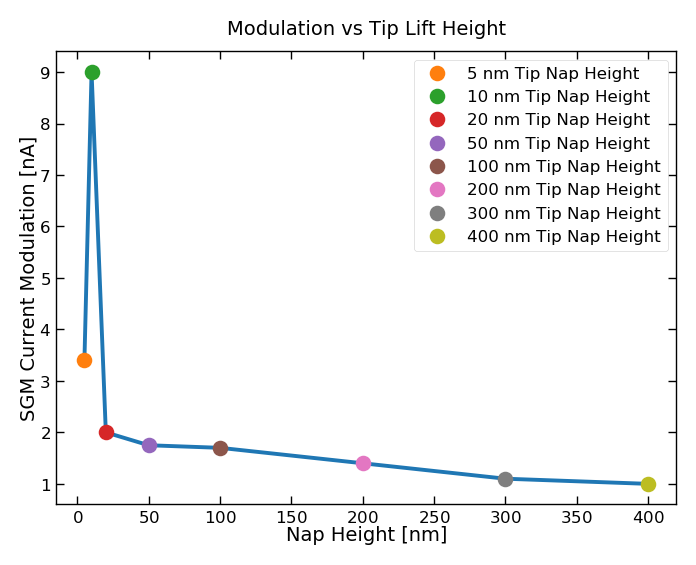

In [6]:
heights = [5,10,20,50,100,200,300,400]
modulations = [3.4,9,2,1.75,1.7,1.4,1.1,1]
plt.figure(figsize=(4,3), dpi=200)
plt.plot(heights, modulations)
for i in range(len(heights)):
    plt.plot(heights[i], modulations[i], 'o', label='{} nm Tip Nap Height'.format(heights[i]))

plt.title('Modulation vs Tip Lift Height')
plt.legend()
plt.xlabel('Nap Height [nm]')
plt.ylabel('SGM Current Modulation [nA]')
plt.show()

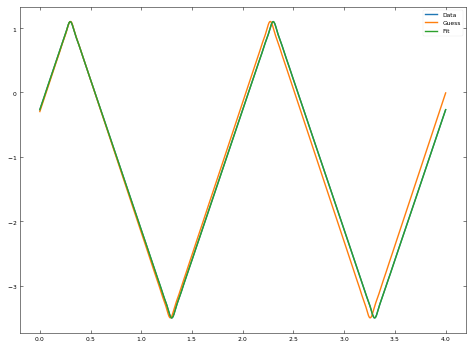

In [2]:
times = np.linspace(0,20,500)
period = 6
offset = 0
amplitude = 2

def triangleSine(x):
    coefficients = [(-1)**i*(2*i+1)**(-2)*np.sin((2*i+1)*x) for i in range(15)]
    wave = np.sum(coefficients, axis=0)
    return wave/np.max(wave)

def triangleSinWave(times, amplitude, period, phase, offset):
    return offset + amplitude*triangleSine(2*np.pi*(times - phase)/period)

def triangleCosWave(times, amplitude, period, phase, offset):
    return triangleSinWave(times, amplitude, period, phase - period/4, offset)

import scipy.optimize
import scipy.stats

results = {"vds_data": [0.1000002, 0.1, 0.0999999, 0.1, 0.1, 0.0999998, 0.1000001, 0.0999999, 0.1, 0.1000002, 0.1000001, 0.0999999, 0.1000001, 0.1, 0.1, 0.1, 0.0999999, 0.1000001, 0.0999997, 0.1, 0.0999998, 0.0999999, 0.1000002, 0.0999999, 0.1, 0.1, 0.1, 0.0999999, 0.1000001, 0.1, 0.0999999, 0.0999999, 0.0999999, 0.1000001, 0.1, 0.0999999, 0.1, 0.1, 0.0999998, 0.0999999, 0.0999999, 0.1000001, 0.0999999, 0.1, 0.1000002, 0.1, 0.1, 0.1, 0.1000001, 0.1, 0.1, 0.0999998, 0.1000002, 0.0999999, 0.0999999, 0.0999999, 0.0999999, 0.1000001, 0.0999998, 0.1, 0.1, 0.0999999, 0.1, 0.1, 0.0999999, 0.1, 0.1, 0.0999999, 0.1, 0.1, 0.1000001, 0.1, 0.0999998, 0.0999999, 0.1, 0.1000002, 0.1000002, 0.0999999, 0.1000001, 0.0999998, 0.0999998, 0.1, 0.1, 0.1, 0.1000001, 0.1, 0.1000001, 0.0999998, 0.1, 0.1, 0.0999997, 0.0999999, 0.0999999, 0.1000001, 0.0999999, 0.0999997, 0.1000001, 0.0999998, 0.1000001, 0.0999999, 0.0999998, 0.1000001, 0.1000001, 0.0999998, 0.1, 0.1, 0.0999999, 0.0999999, 0.1, 0.1000001, 0.0999999, 0.1, 0.1, 0.1, 0.1, 0.1000001, 0.0999998, 0.1000003, 0.1, 0.0999999, 0.0999997, 0.1000001, 0.1, 0.1, 0.0999999, 0.0999999, 0.1000001, 0.0999999, 0.0999999, 0.1, 0.0999999, 0.1000001, 0.0999998, 0.0999999, 0.1000001, 0.1, 0.1, 0.1, 0.1000001, 0.0999997, 0.1000002, 0.1, 0.0999998, 0.1000001, 0.1000001, 0.0999997, 0.1, 0.1, 0.0999999, 0.1, 0.1, 0.0999999, 0.1, 0.1000001, 0.0999999, 0.1000001, 0.1000002, 0.1, 0.1000002, 0.0999998, 0.1000001, 0.0999998, 0.0999998, 0.0999999, 0.0999999, 0.1000001, 0.0999998, 0.0999998, 0.1000002, 0.0999997, 0.1000002, 0.0999999, 0.0999999, 0.0999998, 0.1000002, 0.1000001, 0.1, 0.0999998, 0.0999998, 0.0999999, 0.1000002, 0.0999998, 0.0999997, 0.1, 0.1000001, 0.1, 0.0999999, 0.0999997, 0.1000001, 0.1, 0.1, 0.1, 0.1, 0.0999999, 0.1000001, 0.0999999, 0.1, 0.1, 0.0999997, 0.0999999, 0.1000001, 0.1, 0.1000001, 0.1000001, 0.0999999, 0.1000001, 0.0999999, 0.0999999, 0.0999999, 0.0999998, 0.1000001, 0.0999999, 0.0999999, 0.1000001, 0.1, 0.0999998, 0.1, 0.1, 0.0999998, 0.1000001, 0.1000001, 0.0999997, 0.0999999, 0.1000001, 0.1, 0.0999999, 0.1, 0.1000001, 0.0999999, 0.1, 0.1, 0.1000001, 0.1000001, 0.1000001, 0.0999999, 0.1, 0.0999998, 0.0999999, 0.1000001, 0.0999999], "id_data": [-2.11e-10, -2.09e-10, -2.06e-10, -2.08e-10, -2.06e-10, -2.08e-10, -2.05e-10, -2.09e-10, -2.12e-10, -2.13e-10, -2e-10, -2.12e-10, -2.14e-10, -2.13e-10, -2.11e-10, -2.1e-10, -2.17e-10, -2.14e-10, -2.14e-10, -2.12e-10, -2.16e-10, -2.17e-10, -2.18e-10, -2.2e-10, -2.15e-10, -2.14e-10, -2.18e-10, -2.14e-10, -2.16e-10, -2.15e-10, -2.17e-10, -2.16e-10, -2.18e-10, -2.17e-10, -2.18e-10, -2.14e-10, -2.15e-10, -2.15e-10, -2.24e-10, -2.19e-10, -2.16e-10, -2.17e-10, -2.18e-10, -2.16e-10, -2.22e-10, -2.19e-10, -2.21e-10, -2.18e-10, -2.18e-10, -2.2e-10, -2.22e-10, -2.16e-10, -2.19e-10, -2.16e-10, -2.16e-10, -2.23e-10, -2.21e-10, -2.21e-10, -2.16e-10, -2.19e-10, -2.17e-10, -2.22e-10, -2.2e-10, -2.19e-10, -2.2e-10, -2.22e-10, -2.18e-10, -2.21e-10, -2.18e-10, -2.22e-10, -2.15e-10, -2.2e-10, -2.22e-10, -2.24e-10, -2.25e-10, -2.22e-10, -2.19e-10, -2.16e-10, -2.16e-10, -2.2e-10, -2.22e-10, -2.15e-10, -2.19e-10, -2.23e-10, -2.21e-10, -2.21e-10, -2.17e-10, -2.19e-10, -2.18e-10, -2.17e-10, -2.16e-10, -2.22e-10, -2.23e-10, -2.2e-10, -2.22e-10, -2.22e-10, -2.2e-10, -2.23e-10, -2.23e-10, -2.21e-10, -2.25e-10, -2.2e-10, -2.2e-10, -2.19e-10, -2.25e-10, -2.22e-10, -2.2e-10, -2.2e-10, -2.22e-10, -2.18e-10, -2.2e-10, -2.2e-10, -2.21e-10, -2.18e-10, -2.23e-10, -2.19e-10, -2.23e-10, -2.25e-10, -2.29e-10, -2.26e-10, -2.27e-10, -2.22e-10, -2.25e-10, -2.23e-10, -2.24e-10, -2.21e-10, -2.2e-10, -2.28e-10, -2.28e-10, -2.22e-10, -2.3e-10, -2.21e-10, -2.22e-10, -2.27e-10, -2.25e-10, -2.24e-10, -2.27e-10, -2.24e-10, -2.18e-10, -2.22e-10, -2.2e-10, -2.19e-10, -2.26e-10, -2.22e-10, -2.22e-10, -2.22e-10, -2.21e-10, -2.22e-10, -2.2e-10, -2.26e-10, -2.2e-10, -2.22e-10, -2.22e-10, -2.19e-10, -2.26e-10, -2.21e-10, -2.2e-10, -2.23e-10, -2.25e-10, -2.19e-10, -2.19e-10, -2.17e-10, -2.24e-10, -2.26e-10, -2.21e-10, -2.21e-10, -2.17e-10, -2.18e-10, -2.22e-10, -2.25e-10, -2.24e-10, -2.24e-10, -2.24e-10, -2.22e-10, -2.26e-10, -2.19e-10, -2.2e-10, -2.2e-10, -2.25e-10, -2.23e-10, -2.24e-10, -2.23e-10, -2.25e-10, -2.21e-10, -2.22e-10, -2.21e-10, -2.22e-10, -2.19e-10, -2.24e-10, -2.2e-10, -2.22e-10, -2.18e-10, -2.25e-10, -2.21e-10, -2.21e-10, -2.26e-10, -2.19e-10, -2.27e-10, -2.26e-10, -2.23e-10, -2.23e-10, -2.21e-10, -2.27e-10, -2.24e-10, -2.25e-10, -2.21e-10, -2.23e-10, -2.25e-10, -2.22e-10, -2.21e-10, -2.19e-10, -2.23e-10, -2.23e-10, -2.27e-10, -2.25e-10, -2.23e-10, -2.22e-10, -2.23e-10, -2.28e-10, -2.26e-10, -2.24e-10, -2.25e-10, -2.23e-10, -2.22e-10, -2.22e-10, -2.21e-10, -2.23e-10, -2.19e-10, -2.25e-10, -2.22e-10, -2.25e-10, -2.25e-10, -2.24e-10, -2.24e-10, -2.23e-10, -2.25e-10, -2.21e-10, -2.2e-10, -2.22e-10, -2.25e-10], "vgs_data": [-15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0], "ig_data": [-1.092e-09, -1.086e-09, -1.08e-09, -1.067e-09, -1.059e-09, -1.056e-09, -1.048e-09, -1.046e-09, -1.038e-09, -1.029e-09, -2.9e-10, -9.76e-10, -9.84e-10, -9.86e-10, -9.81e-10, -9.84e-10, -9.8e-10, -9.78e-10, -9.8e-10, -9.7e-10, -9.66e-10, -9.66e-10, -9.58e-10, -9.54e-10, -9.5e-10, -9.54e-10, -9.52e-10, -9.43e-10, -9.4e-10, -9.41e-10, -9.35e-10, -9.33e-10, -9.33e-10, -9.34e-10, -9.29e-10, -9.29e-10, -9.24e-10, -9.25e-10, -9.22e-10, -9.12e-10, -9.14e-10, -9.1e-10, -9.13e-10, -9.07e-10, -9.1e-10, -9.03e-10, -9.04e-10, -9.07e-10, -8.99e-10, -9.04e-10, -8.96e-10, -8.95e-10, -9.01e-10, -8.88e-10, -8.91e-10, -8.92e-10, -8.93e-10, -8.9e-10, -8.94e-10, -8.89e-10, -8.85e-10, -8.92e-10, -8.87e-10, -8.87e-10, -8.76e-10, -8.82e-10, -8.85e-10, -8.79e-10, -8.78e-10, -8.77e-10, -8.78e-10, -8.75e-10, -8.78e-10, -8.75e-10, -8.76e-10, -8.74e-10, -8.72e-10, -8.68e-10, -8.73e-10, -8.66e-10, -8.71e-10, -8.7e-10, -8.67e-10, -8.7e-10, -8.71e-10, -8.64e-10, -8.65e-10, -8.61e-10, -8.63e-10, -8.65e-10, -8.58e-10, -8.63e-10, -8.52e-10, -8.62e-10, -8.59e-10, -8.58e-10, -8.57e-10, -8.52e-10, -8.54e-10, -8.57e-10, -8.52e-10, -8.54e-10, -8.53e-10, -8.52e-10, -8.47e-10, -8.51e-10, -8.49e-10, -8.49e-10, -8.49e-10, -8.51e-10, -8.46e-10, -8.4e-10, -8.47e-10, -8.47e-10, -8.47e-10, -8.45e-10, -8.45e-10, -8.41e-10, -8.43e-10, -8.42e-10, -8.44e-10, -8.43e-10, -8.4e-10, -8.37e-10, -8.3e-10, -8.35e-10, -8.34e-10, -8.36e-10, -8.29e-10, -8.35e-10, -1.558e-09, -8.7e-10, -8.6e-10, -8.49e-10, -8.51e-10, -8.45e-10, -8.46e-10, -8.5e-10, -8.42e-10, -8.42e-10, -8.45e-10, -8.45e-10, -8.41e-10, -8.44e-10, -8.37e-10, -8.39e-10, -8.35e-10, -8.29e-10, -8.4e-10, -8.32e-10, -8.34e-10, -8.27e-10, -8.3e-10, -8.3e-10, -8.27e-10, -8.32e-10, -8.34e-10, -8.31e-10, -8.29e-10, -8.27e-10, -8.22e-10, -8.21e-10, -8.19e-10, -8.25e-10, -8.24e-10, -8.25e-10, -8.16e-10, -8.22e-10, -8.21e-10, -8.25e-10, -8.25e-10, -8.21e-10, -8.18e-10, -8.19e-10, -8.18e-10, -8.19e-10, -8.15e-10, -8.15e-10, -8.07e-10, -8.15e-10, -8.18e-10, -8.15e-10, -8.09e-10, -8.15e-10, -8.14e-10, -8.15e-10, -8.14e-10, -8.17e-10, -8.15e-10, -8.15e-10, -8.08e-10, -8.11e-10, -8.11e-10, -8.12e-10, -8.12e-10, -8.06e-10, -8.11e-10, -8.15e-10, -8.08e-10, -8.13e-10, -8.09e-10, -8.06e-10, -8.06e-10, -8.06e-10, -8.07e-10, -8.09e-10, -8.07e-10, -8.11e-10, -8.04e-10, -8.06e-10, -8.07e-10, -8.03e-10, -8.08e-10, -8.01e-10, -8.04e-10, -8.02e-10, -8e-10, -8.06e-10, -8.04e-10, -8.05e-10, -8.04e-10, -8e-10, -8.04e-10, -7.97e-10, -7.98e-10, -7.99e-10, -8e-10, -8.01e-10, -8.02e-10, -8.07e-10, -8.04e-10, -8.02e-10, -8.01e-10, -7.99e-10, -8.01e-10, -8.03e-10, -7.96e-10, -7.99e-10, -8.01e-10, -7.98e-10], "timestamps_device": [1536070943.9300547, 1536070943.9467216, 1536070943.9633887, 1536070943.9800556, 1536070943.9967227, 1536070944.0133896, 1536070944.0300567, 1536070944.0467236, 1536070944.0633907, 1536070944.0800576, 1536070944.0967247, 1536070944.1133916, 1536070944.1300588, 1536070944.1467257, 1536070944.1633928, 1536070944.1800597, 1536070944.1967266, 1536070944.2133937, 1536070944.2300606, 1536070944.2467277, 1536070944.2633946, 1536070944.2800617, 1536070944.2967286, 1536070944.3133957, 1536070944.3300626, 1536070944.3467298, 1536070944.3633966, 1536070944.3800638, 1536070944.3967307, 1536070944.4133976, 1536070944.4300647, 1536070944.4467316, 1536070944.4633987, 1536070944.4800656, 1536070944.4967327, 1536070944.5133996, 1536070944.5300667, 1536070944.5467336, 1536070944.5634007, 1536070944.5800676, 1536070944.5967348, 1536070944.6134017, 1536070944.6300688, 1536070944.6467357, 1536070944.6634026, 1536070944.6800697, 1536070944.6967366, 1536070944.7134037, 1536070944.7300706, 1536070944.7467377, 1536070944.7634046, 1536070944.7800717, 1536070944.7967386, 1536070944.8134058, 1536070944.8300726, 1536070944.8467398, 1536070944.8634067, 1536070944.8800735, 1536070944.8967407, 1536070944.9134076, 1536070944.9300747, 1536070944.9467416, 1536070944.9634087, 1536070944.9800756, 1536070944.9967427, 1536070945.0134096, 1536070945.0300767, 1536070945.0467436, 1536070945.0634108, 1536070945.0800776, 1536070945.0967448, 1536070945.1134117, 1536070945.1300786, 1536070945.1467457, 1536070945.1634126, 1536070945.1800797, 1536070945.1967466, 1536070945.2134137, 1536070945.2300806, 1536070945.2467477, 1536070945.2634146, 1536070945.2800817, 1536070945.2967486, 1536070945.3134158, 1536070945.3300827, 1536070945.3467498, 1536070945.3634167, 1536070945.3800836, 1536070945.3967507, 1536070945.4134176, 1536070945.4300847, 1536070945.4467516, 1536070945.4634187, 1536070945.4800856, 1536070945.4967527, 1536070945.5134196, 1536070945.5300868, 1536070945.5467536, 1536070945.5634208, 1536070945.5800877, 1536070945.5967546, 1536070945.6134217, 1536070945.6300886, 1536070945.6467557, 1536070945.6634226, 1536070945.6800897, 1536070945.6967566, 1536070945.7134237, 1536070945.7300906, 1536070945.7467577, 1536070945.7634246, 1536070945.7800918, 1536070945.7967587, 1536070945.8134258, 1536070945.8300927, 1536070945.8467596, 1536070945.8634267, 1536070945.8800936, 1536070945.8967607, 1536070945.9134276, 1536070945.9300947, 1536070945.9467616, 1536070945.9634287, 1536070945.9800956, 1536070945.9967628, 1536070946.0134296, 1536070946.0300968, 1536070946.0467637, 1536070946.0634305, 1536070946.0800977, 1536070946.0967646, 1536070946.1134317, 1536070946.1300986, 1536070946.1467657, 1536070946.1634326, 1536070946.1800997, 1536070946.1967666, 1536070946.2134337, 1536070946.2301006, 1536070946.2467678, 1536070946.2634346, 1536070946.2801018, 1536070946.2967687, 1536070946.3134356, 1536070946.3301027, 1536070946.3467696, 1536070946.3634367, 1536070946.3801036, 1536070946.3967707, 1536070946.4134376, 1536070946.4301047, 1536070946.4467716, 1536070946.4634387, 1536070946.4801056, 1536070946.4967728, 1536070946.5134397, 1536070946.5301068, 1536070946.5467737, 1536070946.5634406, 1536070946.5801077, 1536070946.5967746, 1536070946.6134417, 1536070946.6301086, 1536070946.6467757, 1536070946.6634426, 1536070946.6801097, 1536070946.6967766, 1536070946.7134438, 1536070946.7301106, 1536070946.7467778, 1536070946.7634447, 1536070946.7801116, 1536070946.7967787, 1536070946.8134456, 1536070946.8301127, 1536070946.8467796, 1536070946.8634467, 1536070946.8801136, 1536070946.8967807, 1536070946.9134476, 1536070946.9301147, 1536070946.9467816, 1536070946.9634488, 1536070946.9801157, 1536070946.9967828, 1536070947.0134497, 1536070947.0301166, 1536070947.0467837, 1536070947.0634506, 1536070947.0801177, 1536070947.0967846, 1536070947.1134517, 1536070947.1301186, 1536070947.1467857, 1536070947.1634526, 1536070947.1801198, 1536070947.1967866, 1536070947.2134538, 1536070947.2301207, 1536070947.2467875, 1536070947.2634547, 1536070947.2801216, 1536070947.2967887, 1536070947.3134556, 1536070947.3301227, 1536070947.3467896, 1536070947.3634567, 1536070947.3801236, 1536070947.3967907, 1536070947.4134576, 1536070947.4301248, 1536070947.4467916, 1536070947.4634588, 1536070947.4801257, 1536070947.4967926, 1536070947.5134597, 1536070947.5301266, 1536070947.5467937, 1536070947.5634606, 1536070947.5801277, 1536070947.5967946, 1536070947.6134617, 1536070947.6301286, 1536070947.6467957, 1536070947.6634626, 1536070947.6801298, 1536070947.6967967, 1536070947.7134638, 1536070947.7301307, 1536070947.7467976, 1536070947.7634647, 1536070947.7801316, 1536070947.7967987, 1536070947.8134656, 1536070947.8301327, 1536070947.8467996, 1536070947.8634667, 1536070947.8801336, 1536070947.8968008, 1536070947.9134676], "smu2_v1_data": [-0.90638, -0.90634, -0.90644, -0.90637, -0.90659, -0.90611, -0.90661, -0.90642, -0.90079, -0.87807, -0.88257, -0.88268, -0.88261, -0.88279, -0.88273, -0.88284, -0.8828, -0.88278, -0.88287, -0.88279, -0.88284, -0.88282, -0.88312, -0.8824, -0.88279, -0.88275, -0.88272, -0.88282, -0.88281, -0.88286, -0.88281, -0.88293, -0.88286, -0.88295, -0.88279, -0.88288, -0.88287, -0.88292, -0.88288, -0.88293, -0.88295, -0.88289, -0.88276, -0.88301, -0.88291, -0.88291, -0.883, -0.88287, -0.88297, -0.88292, -0.88295, -0.88286, -0.88287, -0.88279, -0.88284, -0.88289, -0.8829, -0.88294, -0.88286, -0.88317, -0.88257, -0.88306, -0.88289, -0.8829, -0.883, -0.88289, -0.88304, -0.88287, -0.88295, -0.8829, -0.88296, -0.88281, -0.88293, -0.88292, -0.88286, -0.8828, -0.8829, -0.88303, -0.88275, -0.88294, -0.88304, -0.88291, -0.88289, -0.88292, -0.88292, -0.88287, -0.88295, -0.88299, -0.88299, -0.88295, -0.88298, -0.88296, -0.88297, -0.88291, -0.883, -0.88284, -0.88315, -0.88265, -0.88311, -0.88292, -0.88288, -0.88294, -0.88295, -0.88303, -0.8829, -0.88304, -0.88294, -0.88298, -0.88293, -0.88294, -0.88288, -0.88289, -0.8829, -0.88296, -0.88315, -0.88265, -0.88304, -0.88303, -0.88301, -0.88299, -0.88302, -0.88312, -0.88294, -0.88304, -0.88296, -0.88298, -0.88298, -0.88303, -0.88381, -0.88485, -0.88477, -0.88492, -0.8849, -0.88485, -0.88466, -0.88497, -0.88482, -0.88474, -0.88484, -0.8848, -0.88491, -0.88492, -0.88486, -0.88476, -0.88484, -0.88489, -0.88485, -0.88487, -0.8848, -0.88485, -0.88483, -0.88512, -0.8844, -0.88496, -0.88482, -0.88478, -0.88487, -0.88479, -0.88492, -0.88479, -0.88494, -0.88482, -0.88491, -0.88484, -0.88489, -0.88488, -0.88485, -0.88472, -0.88485, -0.88495, -0.88458, -0.88473, -0.8849, -0.88469, -0.88478, -0.88479, -0.8848, -0.88477, -0.88484, -0.88481, -0.88478, -0.88477, -0.88483, -0.88481, -0.88479, -0.88468, -0.88483, -0.88474, -0.88494, -0.88452, -0.88487, -0.88473, -0.88478, -0.88485, -0.88476, -0.88486, -0.88471, -0.8848, -0.88478, -0.88479, -0.88469, -0.88477, -0.8848, -0.88468, -0.88475, -0.88478, -0.88497, -0.88451, -0.88481, -0.88477, -0.88472, -0.88476, -0.88471, -0.88478, -0.88467, -0.88469, -0.88472, -0.88478, -0.88464, -0.88476, -0.88467, -0.88476, -0.88474, -0.88477, -0.88479, -0.88475, -0.88459, -0.88489, -0.88477, -0.88471, -0.88477, -0.88475, -0.88482, -0.88478, -0.88485, -0.88476, -0.88477, -0.8848, -0.88473, -0.8847], "smu2_i1_data": [1e-14, -1e-14, -1e-14, 0.0, -3e-14, 1e-14, 1e-14, -1e-14, -4.6e-13, -1e-14, 2e-14, -1e-14, -1e-14, -1e-14, 1e-14, 0.0, 1e-14, 2e-14, 1e-14, 0.0, 0.0, 0.0, 1e-14, -2e-14, 1e-14, -1e-14, 0.0, 0.0, 1e-14, 1e-14, 1e-14, 0.0, -1e-14, -1e-14, -2e-14, -1e-14, 0.0, -1e-14, -2e-14, -1e-14, -1e-14, -2e-14, 1e-14, 0.0, 0.0, 0.0, 0.0, 0.0, -1e-14, 1e-14, -2e-14, 1e-14, -1e-14, -1e-14, -1e-14, -1e-14, -1e-14, 0.0, 0.0, 0.0, 1e-14, 1e-14, 0.0, 1e-14, 1e-14, -1e-14, -1e-14, 1e-14, -2e-14, -1e-14, 0.0, 1e-14, 0.0, 1e-14, -1e-14, -1e-14, -1e-14, 2e-14, -1e-14, 1e-14, 0.0, -1e-14, 1e-14, -1e-14, 0.0, 1e-14, -1e-14, -1e-14, 0.0, -1e-14, 0.0, -3e-14, -1e-14, 0.0, 1e-14, 0.0, -3e-14, 0.0, -1e-14, 0.0, 1e-14, -1e-14, 1e-14, 0.0, 0.0, -1e-14, 1e-14, 1e-14, 2e-14, -1e-14, 2e-14, 0.0, -1e-14, 0.0, -1e-14, -1e-14, 0.0, 0.0, -1e-14, 0.0, -2e-14, 0.0, 0.0, 1e-14, 1e-14, 0.0, 1e-14, 1e-14, 4e-14, 0.0, 1e-14, 1e-14, 1e-14, -3e-14, 2e-14, -3e-14, 1e-14, 0.0, 0.0, 0.0, 1e-14, 1e-14, -1e-14, 0.0, -1e-14, 0.0, 0.0, 0.0, -1e-14, 1e-14, 1e-14, 0.0, 1e-14, -1e-14, -1e-14, -2e-14, 0.0, 1e-14, 0.0, 0.0, 2e-14, -2e-14, 1e-14, 1e-14, -1e-14, 0.0, -1e-14, -2e-14, -1e-14, -1e-14, -3e-14, 0.0, -1e-14, 0.0, 1e-14, -1e-14, 0.0, -2e-14, 0.0, -1e-14, -1e-14, 1e-14, 2e-14, -1e-14, -1e-14, 0.0, 0.0, 0.0, -3e-14, 0.0, 0.0, -1e-14, 2e-14, 1e-14, 1e-14, 2e-14, 1e-14, 0.0, 0.0, 1e-14, -3e-14, 0.0, -1e-14, -1e-14, 2e-14, -3e-14, 2e-14, -2e-14, 0.0, -1e-14, 0.0, 0.0, 0.0, 0.0, -1e-14, 0.0, 0.0, 0.0, 1e-14, -2e-14, 0.0, 0.0, -2e-14, 0.0, 0.0, -2e-14, 0.0, 2e-14, -1e-14, -1e-14, -1e-14, 0.0, 0.0, -1e-14, 0.0, 2e-14, 0.0, 1e-14, -1e-14, -1e-14], "smu2_v2_data": [2.24135, 2.26944, 2.29766, 2.32491, 2.3498, 2.37089, 2.386, 2.39462, 2.39753, 2.39167, 2.37982, 2.36077, 2.33688, 2.31024, 2.28181, 2.25343, 2.22529, 2.19718, 2.16886, 2.14085, 2.1127, 2.08425, 2.0566, 2.02821, 2.00017, 1.97218, 1.94381, 1.91577, 1.88772, 1.85969, 1.83166, 1.80349, 1.77536, 1.74732, 1.71925, 1.69115, 1.6631, 1.63485, 1.60674, 1.57888, 1.55029, 1.52242, 1.49426, 1.46609, 1.43822, 1.40975, 1.38203, 1.35381, 1.3256, 1.29754, 1.26957, 1.24143, 1.21349, 1.18547, 1.15715, 1.12918, 1.10101, 1.07283, 1.04495, 1.01664, 0.98856, 0.96061, 0.93223, 0.90512, 0.88015, 0.85927, 0.84395, 0.8353, 0.83382, 0.83947, 0.85252, 0.87116, 0.8951, 0.92172, 0.95022, 0.97866, 1.00672, 1.03485, 1.06294, 1.09096, 1.11923, 1.14727, 1.17542, 1.20366, 1.23167, 1.25977, 1.28775, 1.31584, 1.34385, 1.37216, 1.40007, 1.42838, 1.45634, 1.48421, 1.51277, 1.54049, 1.56877, 1.59708, 1.62502, 1.65311, 1.6814, 1.70936, 1.73746, 1.76559, 1.79357, 1.82187, 1.84994, 1.87786, 1.90604, 1.93403, 1.96214, 1.99042, 2.01833, 2.04652, 2.07453, 2.1026, 2.13064, 2.15875, 2.18694, 2.21505, 2.24329, 2.27117, 2.29957, 2.32662, 2.35167, 2.37263, 2.38772, 2.39647, 2.39704, 2.39029, 2.37755, 2.35868, 2.33484, 2.30816, 2.27992, 2.25145, 2.22332, 2.19529, 2.16691, 2.13897, 2.11046, 2.08247, 2.05459, 2.0261, 1.99821, 1.97009, 1.94186, 1.91382, 1.88585, 1.85772, 1.82972, 1.8016, 1.77349, 1.74555, 1.71732, 1.68927, 1.6613, 1.63293, 1.60494, 1.57689, 1.54845, 1.52061, 1.49237, 1.46427, 1.4361, 1.40823, 1.3801, 1.35197, 1.32381, 1.29563, 1.26776, 1.23958, 1.21168, 1.18361, 1.15526, 1.12736, 1.09919, 1.07117, 1.04306, 1.01485, 0.98683, 0.95879, 0.9305, 0.90325, 0.8784, 0.85749, 0.84215, 0.83359, 0.83185, 0.83795, 0.85056, 0.86943, 0.89333, 0.91981, 0.94839, 0.97678, 1.00487, 1.03309, 1.06115, 1.08923, 1.11745, 1.14562, 1.17353, 1.20195, 1.22988, 1.2579, 1.28609, 1.314, 1.34219, 1.37037, 1.39833, 1.42666, 1.45433, 1.48272, 1.51087, 1.53891, 1.56701, 1.59529, 1.62338, 1.65139, 1.67968, 1.7076, 1.73576, 1.76393, 1.79182, 1.82026, 1.84816, 1.87621, 1.90435, 1.93231, 1.96044, 1.98858, 2.01662, 2.04471, 2.07282, 2.10085, 2.12878, 2.15723, 2.18503, 2.21351], "smu2_i2_data": [-5.5e-13, -5.5e-13, -6e-13, -5.6e-13, -4.8e-13, -3.7e-13, -2.3e-13, -1.1e-13, 1e-14, 2e-13, 2.9e-13, 4.2e-13, 5.1e-13, 5.7e-13, 5.8e-13, 5.6e-13, 5.4e-13, 5.8e-13, 6e-13, 5.7e-13, 5.9e-13, 5.8e-13, 5.8e-13, 5.9e-13, 5.3e-13, 5.4e-13, 5.9e-13, 5.9e-13, 5.8e-13, 5.6e-13, 5.8e-13, 5.8e-13, 5.9e-13, 5.4e-13, 5.3e-13, 5.6e-13, 5.8e-13, 5.6e-13, 5.2e-13, 5.5e-13, 5.7e-13, 5.8e-13, 5.7e-13, 5.4e-13, 5.8e-13, 5.8e-13, 6e-13, 5.5e-13, 5.6e-13, 5.8e-13, 5.9e-13, 5.8e-13, 5.2e-13, 5.4e-13, 5.6e-13, 5.8e-13, 5.8e-13, 5.6e-13, 5.9e-13, 6.1e-13, 5.7e-13, 5.5e-13, 5.4e-13, 5.5e-13, 5e-13, 3.8e-13, 2.3e-13, 1e-13, -6e-14, -2.1e-13, -3.1e-13, -4.8e-13, -5.5e-13, -5.3e-13, -5.7e-13, -5.8e-13, -6.1e-13, -6e-13, -5.9e-13, -6e-13, -5.9e-13, -6e-13, -5.5e-13, -5.4e-13, -5.5e-13, -5.8e-13, -5.8e-13, -5.7e-13, -5.7e-13, -5.8e-13, -6.2e-13, -5.9e-13, -5.5e-13, -5.8e-13, -6.1e-13, -6e-13, -6.1e-13, -5.4e-13, -5.5e-13, -5.8e-13, -5.6e-13, -5.4e-13, -5.3e-13, -5.7e-13, -5.8e-13, -5.9e-13, -5.6e-13, -5.5e-13, -5.7e-13, -5.8e-13, -5.6e-13, -5.2e-13, -5.6e-13, -5.8e-13, -5.8e-13, -6e-13, -5.9e-13, -6e-13, -5.8e-13, -5.6e-13, -5.6e-13, -5.5e-13, -5.9e-13, -5.5e-13, -4.7e-13, -3.7e-13, -2.4e-13, -1e-13, 1e-13, 1.8e-13, 3.3e-13, 4.3e-13, 5.3e-13, 5.9e-13, 5.6e-13, 5.3e-13, 5.4e-13, 5.9e-13, 5.8e-13, 5.7e-13, 5.9e-13, 5.8e-13, 6e-13, 5.8e-13, 5.3e-13, 5.5e-13, 5.7e-13, 5.6e-13, 5.4e-13, 5.4e-13, 5.7e-13, 6e-13, 5.7e-13, 5.4e-13, 5.5e-13, 5.6e-13, 5.9e-13, 5.7e-13, 5.6e-13, 5.8e-13, 6e-13, 5.8e-13, 5.6e-13, 5.3e-13, 5.5e-13, 5.8e-13, 5.8e-13, 5.4e-13, 5.6e-13, 5.6e-13, 5.8e-13, 5.6e-13, 5.3e-13, 5.6e-13, 5.8e-13, 5.8e-13, 5.8e-13, 5.7e-13, 5.9e-13, 5.8e-13, 5.6e-13, 5.4e-13, 5.4e-13, 5.5e-13, 4.7e-13, 3.7e-13, 2.4e-13, 9e-14, -5e-14, -2.2e-13, -3.1e-13, -4.7e-13, -5.2e-13, -5.2e-13, -5.5e-13, -5.4e-13, -5.7e-13, -6e-13, -5.9e-13, -5.8e-13, -6.1e-13, -5.9e-13, -5.7e-13, -5.5e-13, -5.4e-13, -5.8e-13, -5.9e-13, -5.7e-13, -5.6e-13, -5.7e-13, -6e-13, -5.8e-13, -5.5e-13, -5.5e-13, -5.9e-13, -5.9e-13, -5.7e-13, -5.4e-13, -5.5e-13, -5.8e-13, -6e-13, -5.6e-13, -5.6e-13, -5.7e-13, -5.9e-13, -5.9e-13, -5.6e-13, -5.6e-13, -5.9e-13, -5.9e-13, -5.7e-13, -5.3e-13, -5.6e-13, -5.9e-13, -6e-13, -5.8e-13, -5.8e-13, -5.9e-13, -6.1e-13, -5.9e-13], "timestamps_smu2": [1536070943.9340518, 1536070943.9507186, 1536070943.9673858, 1536070943.9840527, 1536070944.0007198, 1536070944.0173867, 1536070944.0340538, 1536070944.0507207, 1536070944.0673878, 1536070944.0840547, 1536070944.1007218, 1536070944.1173887, 1536070944.1340559, 1536070944.1507227, 1536070944.1673899, 1536070944.1840568, 1536070944.2007236, 1536070944.2173908, 1536070944.2340577, 1536070944.2507248, 1536070944.2673917, 1536070944.2840588, 1536070944.3007257, 1536070944.3173928, 1536070944.3340597, 1536070944.3507268, 1536070944.3673937, 1536070944.3840609, 1536070944.4007277, 1536070944.4173946, 1536070944.4340618, 1536070944.4507287, 1536070944.4673958, 1536070944.4840627, 1536070944.5007298, 1536070944.5173967, 1536070944.5340638, 1536070944.5507307, 1536070944.5673978, 1536070944.5840647, 1536070944.6007318, 1536070944.6173987, 1536070944.6340659, 1536070944.6507328, 1536070944.6673996, 1536070944.6840668, 1536070944.7007337, 1536070944.7174008, 1536070944.7340677, 1536070944.7507348, 1536070944.7674017, 1536070944.7840688, 1536070944.8007357, 1536070944.8174028, 1536070944.8340697, 1536070944.8507369, 1536070944.8674037, 1536070944.8840706, 1536070944.9007378, 1536070944.9174047, 1536070944.9340718, 1536070944.9507387, 1536070944.9674058, 1536070944.9840727, 1536070945.0007398, 1536070945.0174067, 1536070945.0340738, 1536070945.0507407, 1536070945.0674078, 1536070945.0840747, 1536070945.1007419, 1536070945.1174088, 1536070945.1340756, 1536070945.1507428, 1536070945.1674097, 1536070945.1840768, 1536070945.2007437, 1536070945.2174108, 1536070945.2340777, 1536070945.2507448, 1536070945.2674117, 1536070945.2840788, 1536070945.3007457, 1536070945.3174129, 1536070945.3340797, 1536070945.3507469, 1536070945.3674138, 1536070945.3840806, 1536070945.4007478, 1536070945.4174147, 1536070945.4340818, 1536070945.4507487, 1536070945.4674158, 1536070945.4840827, 1536070945.5007498, 1536070945.5174167, 1536070945.5340838, 1536070945.5507507, 1536070945.5674179, 1536070945.5840847, 1536070945.6007516, 1536070945.6174188, 1536070945.6340857, 1536070945.6507528, 1536070945.6674197, 1536070945.6840868, 1536070945.7007537, 1536070945.7174208, 1536070945.7340877, 1536070945.7507548, 1536070945.7674217, 1536070945.7840889, 1536070945.8007557, 1536070945.8174229, 1536070945.8340898, 1536070945.8507566, 1536070945.8674238, 1536070945.8840907, 1536070945.9007578, 1536070945.9174247, 1536070945.9340918, 1536070945.9507587, 1536070945.9674258, 1536070945.9840927, 1536070946.0007598, 1536070946.0174267, 1536070946.0340939, 1536070946.0507607, 1536070946.0674276, 1536070946.0840948, 1536070946.1007617, 1536070946.1174288, 1536070946.1340957, 1536070946.1507628, 1536070946.1674297, 1536070946.1840968, 1536070946.2007637, 1536070946.2174308, 1536070946.2340977, 1536070946.2507648, 1536070946.2674317, 1536070946.2840989, 1536070946.3007658, 1536070946.3174326, 1536070946.3340998, 1536070946.3507667, 1536070946.3674338, 1536070946.3841007, 1536070946.4007678, 1536070946.4174347, 1536070946.4341018, 1536070946.4507687, 1536070946.4674358, 1536070946.4841027, 1536070946.5007699, 1536070946.5174367, 1536070946.5341039, 1536070946.5507708, 1536070946.5674376, 1536070946.5841048, 1536070946.6007717, 1536070946.6174388, 1536070946.6341057, 1536070946.6507728, 1536070946.6674397, 1536070946.6841068, 1536070946.7007737, 1536070946.7174408, 1536070946.7341077, 1536070946.7507749, 1536070946.7674417, 1536070946.7841086, 1536070946.8007758, 1536070946.8174427, 1536070946.8341098, 1536070946.8507767, 1536070946.8674438, 1536070946.8841107, 1536070946.9007778, 1536070946.9174447, 1536070946.9341118, 1536070946.9507787, 1536070946.9674459, 1536070946.9841127, 1536070947.0007799, 1536070947.0174468, 1536070947.0341136, 1536070947.0507808, 1536070947.0674477, 1536070947.0841148, 1536070947.1007817, 1536070947.1174488, 1536070947.1341157, 1536070947.1507828, 1536070947.1674497, 1536070947.1841168, 1536070947.2007837, 1536070947.2174509, 1536070947.2341177, 1536070947.2507846, 1536070947.2674518, 1536070947.2841187, 1536070947.3007858, 1536070947.3174527, 1536070947.3341198, 1536070947.3507867, 1536070947.3674538, 1536070947.3841207, 1536070947.4007878, 1536070947.4174547, 1536070947.4341218, 1536070947.4507887, 1536070947.4674559, 1536070947.4841228, 1536070947.5007896, 1536070947.5174568, 1536070947.5341237, 1536070947.5507908, 1536070947.5674577, 1536070947.5841248, 1536070947.6007917, 1536070947.6174588, 1536070947.6341257, 1536070947.6507928, 1536070947.6674597, 1536070947.6841269, 1536070947.7007937, 1536070947.7174609, 1536070947.7341278, 1536070947.7507946, 1536070947.7674618, 1536070947.7841287, 1536070947.8007958, 1536070947.8174627, 1536070947.8341298, 1536070947.8507967, 1536070947.8674638, 1536070947.8841307, 1536070947.9007978, 1536070947.9174647]}

parameterNames = ['amplitude', 'period', 'phase', 'offset']

Vxs = np.array(results['smu2_v2_data'])
timestamps = results['timestamps_smu2']
timestamps = timestamps - np.min(timestamps)

timestamps = np.linspace(0,4,500)
Vxs = triangleCosWave(timestamps, 2.3, 2, 0.3, -1.2)

slopes = np.abs(Vxs[1:]-Vxs[0:-1])/((max(timestamps)-min(timestamps))/len(timestamps))
slope = np.median(slopes)

guesses = {}
optParams = {}

guesses['amplitude'] = (np.max(Vxs) - np.min(Vxs))/2
guesses['period'] = np.max(timestamps)/2
guesses['period'] = 4*guesses['amplitude']/slope
guesses['offset'] = np.mean(Vxs)
guesses['phase'] = (1-(Vxs[0] - np.min(Vxs))/(guesses['amplitude']*2))/(guesses['period']/2)

if Vxs[1] < Vxs[0]:
    guesses['phase'] = guesses['period'] - guesses['phase']

optParamVals, optParamCov = scipy.optimize.curve_fit(triangleCosWave, timestamps, Vxs,
    p0 = [guesses[parameterName] for parameterName in parameterNames])

for parameterName, value in zip(parameterNames, optParamVals):
    optParams[parameterName] = value

plt.plot(timestamps, Vxs, label='Data')
plt.plot(timestamps, triangleCosWave(timestamps, **guesses), label='Guess')
plt.plot(timestamps, triangleCosWave(timestamps, **optParams), label='Fit')
plt.legend()
plt.show()

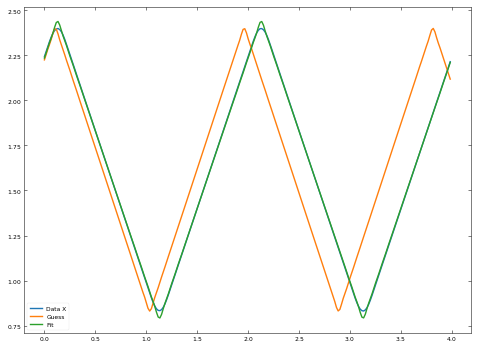

In [3]:
times = np.linspace(0,20,500)
period = 6
offset = 0
amplitude = 2

def triangleSine(x):
    coefficients = [(-1)**i*(2*i+1)**(-2)*np.sin((2*i+1)*x) for i in range(15)]
    wave = np.sum(coefficients, axis=0)
    return wave/np.max(wave)

def triangleSinWave(times, amplitude, period, phase, offset):
    return offset + amplitude*triangleSine(2*np.pi*(times - phase)/period)

def triangleCosWave(times, amplitude, period, phase, offset):
    return triangleSinWave(times, amplitude, period, phase - period/4, offset)

import scipy.optimize
import scipy.stats

results = {"vds_data": [0.1000002, 0.1, 0.0999999, 0.1, 0.1, 0.0999998, 0.1000001, 0.0999999, 0.1, 0.1000002, 0.1000001, 0.0999999, 0.1000001, 0.1, 0.1, 0.1, 0.0999999, 0.1000001, 0.0999997, 0.1, 0.0999998, 0.0999999, 0.1000002, 0.0999999, 0.1, 0.1, 0.1, 0.0999999, 0.1000001, 0.1, 0.0999999, 0.0999999, 0.0999999, 0.1000001, 0.1, 0.0999999, 0.1, 0.1, 0.0999998, 0.0999999, 0.0999999, 0.1000001, 0.0999999, 0.1, 0.1000002, 0.1, 0.1, 0.1, 0.1000001, 0.1, 0.1, 0.0999998, 0.1000002, 0.0999999, 0.0999999, 0.0999999, 0.0999999, 0.1000001, 0.0999998, 0.1, 0.1, 0.0999999, 0.1, 0.1, 0.0999999, 0.1, 0.1, 0.0999999, 0.1, 0.1, 0.1000001, 0.1, 0.0999998, 0.0999999, 0.1, 0.1000002, 0.1000002, 0.0999999, 0.1000001, 0.0999998, 0.0999998, 0.1, 0.1, 0.1, 0.1000001, 0.1, 0.1000001, 0.0999998, 0.1, 0.1, 0.0999997, 0.0999999, 0.0999999, 0.1000001, 0.0999999, 0.0999997, 0.1000001, 0.0999998, 0.1000001, 0.0999999, 0.0999998, 0.1000001, 0.1000001, 0.0999998, 0.1, 0.1, 0.0999999, 0.0999999, 0.1, 0.1000001, 0.0999999, 0.1, 0.1, 0.1, 0.1, 0.1000001, 0.0999998, 0.1000003, 0.1, 0.0999999, 0.0999997, 0.1000001, 0.1, 0.1, 0.0999999, 0.0999999, 0.1000001, 0.0999999, 0.0999999, 0.1, 0.0999999, 0.1000001, 0.0999998, 0.0999999, 0.1000001, 0.1, 0.1, 0.1, 0.1000001, 0.0999997, 0.1000002, 0.1, 0.0999998, 0.1000001, 0.1000001, 0.0999997, 0.1, 0.1, 0.0999999, 0.1, 0.1, 0.0999999, 0.1, 0.1000001, 0.0999999, 0.1000001, 0.1000002, 0.1, 0.1000002, 0.0999998, 0.1000001, 0.0999998, 0.0999998, 0.0999999, 0.0999999, 0.1000001, 0.0999998, 0.0999998, 0.1000002, 0.0999997, 0.1000002, 0.0999999, 0.0999999, 0.0999998, 0.1000002, 0.1000001, 0.1, 0.0999998, 0.0999998, 0.0999999, 0.1000002, 0.0999998, 0.0999997, 0.1, 0.1000001, 0.1, 0.0999999, 0.0999997, 0.1000001, 0.1, 0.1, 0.1, 0.1, 0.0999999, 0.1000001, 0.0999999, 0.1, 0.1, 0.0999997, 0.0999999, 0.1000001, 0.1, 0.1000001, 0.1000001, 0.0999999, 0.1000001, 0.0999999, 0.0999999, 0.0999999, 0.0999998, 0.1000001, 0.0999999, 0.0999999, 0.1000001, 0.1, 0.0999998, 0.1, 0.1, 0.0999998, 0.1000001, 0.1000001, 0.0999997, 0.0999999, 0.1000001, 0.1, 0.0999999, 0.1, 0.1000001, 0.0999999, 0.1, 0.1, 0.1000001, 0.1000001, 0.1000001, 0.0999999, 0.1, 0.0999998, 0.0999999, 0.1000001, 0.0999999], "id_data": [-2.11e-10, -2.09e-10, -2.06e-10, -2.08e-10, -2.06e-10, -2.08e-10, -2.05e-10, -2.09e-10, -2.12e-10, -2.13e-10, -2e-10, -2.12e-10, -2.14e-10, -2.13e-10, -2.11e-10, -2.1e-10, -2.17e-10, -2.14e-10, -2.14e-10, -2.12e-10, -2.16e-10, -2.17e-10, -2.18e-10, -2.2e-10, -2.15e-10, -2.14e-10, -2.18e-10, -2.14e-10, -2.16e-10, -2.15e-10, -2.17e-10, -2.16e-10, -2.18e-10, -2.17e-10, -2.18e-10, -2.14e-10, -2.15e-10, -2.15e-10, -2.24e-10, -2.19e-10, -2.16e-10, -2.17e-10, -2.18e-10, -2.16e-10, -2.22e-10, -2.19e-10, -2.21e-10, -2.18e-10, -2.18e-10, -2.2e-10, -2.22e-10, -2.16e-10, -2.19e-10, -2.16e-10, -2.16e-10, -2.23e-10, -2.21e-10, -2.21e-10, -2.16e-10, -2.19e-10, -2.17e-10, -2.22e-10, -2.2e-10, -2.19e-10, -2.2e-10, -2.22e-10, -2.18e-10, -2.21e-10, -2.18e-10, -2.22e-10, -2.15e-10, -2.2e-10, -2.22e-10, -2.24e-10, -2.25e-10, -2.22e-10, -2.19e-10, -2.16e-10, -2.16e-10, -2.2e-10, -2.22e-10, -2.15e-10, -2.19e-10, -2.23e-10, -2.21e-10, -2.21e-10, -2.17e-10, -2.19e-10, -2.18e-10, -2.17e-10, -2.16e-10, -2.22e-10, -2.23e-10, -2.2e-10, -2.22e-10, -2.22e-10, -2.2e-10, -2.23e-10, -2.23e-10, -2.21e-10, -2.25e-10, -2.2e-10, -2.2e-10, -2.19e-10, -2.25e-10, -2.22e-10, -2.2e-10, -2.2e-10, -2.22e-10, -2.18e-10, -2.2e-10, -2.2e-10, -2.21e-10, -2.18e-10, -2.23e-10, -2.19e-10, -2.23e-10, -2.25e-10, -2.29e-10, -2.26e-10, -2.27e-10, -2.22e-10, -2.25e-10, -2.23e-10, -2.24e-10, -2.21e-10, -2.2e-10, -2.28e-10, -2.28e-10, -2.22e-10, -2.3e-10, -2.21e-10, -2.22e-10, -2.27e-10, -2.25e-10, -2.24e-10, -2.27e-10, -2.24e-10, -2.18e-10, -2.22e-10, -2.2e-10, -2.19e-10, -2.26e-10, -2.22e-10, -2.22e-10, -2.22e-10, -2.21e-10, -2.22e-10, -2.2e-10, -2.26e-10, -2.2e-10, -2.22e-10, -2.22e-10, -2.19e-10, -2.26e-10, -2.21e-10, -2.2e-10, -2.23e-10, -2.25e-10, -2.19e-10, -2.19e-10, -2.17e-10, -2.24e-10, -2.26e-10, -2.21e-10, -2.21e-10, -2.17e-10, -2.18e-10, -2.22e-10, -2.25e-10, -2.24e-10, -2.24e-10, -2.24e-10, -2.22e-10, -2.26e-10, -2.19e-10, -2.2e-10, -2.2e-10, -2.25e-10, -2.23e-10, -2.24e-10, -2.23e-10, -2.25e-10, -2.21e-10, -2.22e-10, -2.21e-10, -2.22e-10, -2.19e-10, -2.24e-10, -2.2e-10, -2.22e-10, -2.18e-10, -2.25e-10, -2.21e-10, -2.21e-10, -2.26e-10, -2.19e-10, -2.27e-10, -2.26e-10, -2.23e-10, -2.23e-10, -2.21e-10, -2.27e-10, -2.24e-10, -2.25e-10, -2.21e-10, -2.23e-10, -2.25e-10, -2.22e-10, -2.21e-10, -2.19e-10, -2.23e-10, -2.23e-10, -2.27e-10, -2.25e-10, -2.23e-10, -2.22e-10, -2.23e-10, -2.28e-10, -2.26e-10, -2.24e-10, -2.25e-10, -2.23e-10, -2.22e-10, -2.22e-10, -2.21e-10, -2.23e-10, -2.19e-10, -2.25e-10, -2.22e-10, -2.25e-10, -2.25e-10, -2.24e-10, -2.24e-10, -2.23e-10, -2.25e-10, -2.21e-10, -2.2e-10, -2.22e-10, -2.25e-10], "vgs_data": [-15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0], "ig_data": [-1.092e-09, -1.086e-09, -1.08e-09, -1.067e-09, -1.059e-09, -1.056e-09, -1.048e-09, -1.046e-09, -1.038e-09, -1.029e-09, -2.9e-10, -9.76e-10, -9.84e-10, -9.86e-10, -9.81e-10, -9.84e-10, -9.8e-10, -9.78e-10, -9.8e-10, -9.7e-10, -9.66e-10, -9.66e-10, -9.58e-10, -9.54e-10, -9.5e-10, -9.54e-10, -9.52e-10, -9.43e-10, -9.4e-10, -9.41e-10, -9.35e-10, -9.33e-10, -9.33e-10, -9.34e-10, -9.29e-10, -9.29e-10, -9.24e-10, -9.25e-10, -9.22e-10, -9.12e-10, -9.14e-10, -9.1e-10, -9.13e-10, -9.07e-10, -9.1e-10, -9.03e-10, -9.04e-10, -9.07e-10, -8.99e-10, -9.04e-10, -8.96e-10, -8.95e-10, -9.01e-10, -8.88e-10, -8.91e-10, -8.92e-10, -8.93e-10, -8.9e-10, -8.94e-10, -8.89e-10, -8.85e-10, -8.92e-10, -8.87e-10, -8.87e-10, -8.76e-10, -8.82e-10, -8.85e-10, -8.79e-10, -8.78e-10, -8.77e-10, -8.78e-10, -8.75e-10, -8.78e-10, -8.75e-10, -8.76e-10, -8.74e-10, -8.72e-10, -8.68e-10, -8.73e-10, -8.66e-10, -8.71e-10, -8.7e-10, -8.67e-10, -8.7e-10, -8.71e-10, -8.64e-10, -8.65e-10, -8.61e-10, -8.63e-10, -8.65e-10, -8.58e-10, -8.63e-10, -8.52e-10, -8.62e-10, -8.59e-10, -8.58e-10, -8.57e-10, -8.52e-10, -8.54e-10, -8.57e-10, -8.52e-10, -8.54e-10, -8.53e-10, -8.52e-10, -8.47e-10, -8.51e-10, -8.49e-10, -8.49e-10, -8.49e-10, -8.51e-10, -8.46e-10, -8.4e-10, -8.47e-10, -8.47e-10, -8.47e-10, -8.45e-10, -8.45e-10, -8.41e-10, -8.43e-10, -8.42e-10, -8.44e-10, -8.43e-10, -8.4e-10, -8.37e-10, -8.3e-10, -8.35e-10, -8.34e-10, -8.36e-10, -8.29e-10, -8.35e-10, -1.558e-09, -8.7e-10, -8.6e-10, -8.49e-10, -8.51e-10, -8.45e-10, -8.46e-10, -8.5e-10, -8.42e-10, -8.42e-10, -8.45e-10, -8.45e-10, -8.41e-10, -8.44e-10, -8.37e-10, -8.39e-10, -8.35e-10, -8.29e-10, -8.4e-10, -8.32e-10, -8.34e-10, -8.27e-10, -8.3e-10, -8.3e-10, -8.27e-10, -8.32e-10, -8.34e-10, -8.31e-10, -8.29e-10, -8.27e-10, -8.22e-10, -8.21e-10, -8.19e-10, -8.25e-10, -8.24e-10, -8.25e-10, -8.16e-10, -8.22e-10, -8.21e-10, -8.25e-10, -8.25e-10, -8.21e-10, -8.18e-10, -8.19e-10, -8.18e-10, -8.19e-10, -8.15e-10, -8.15e-10, -8.07e-10, -8.15e-10, -8.18e-10, -8.15e-10, -8.09e-10, -8.15e-10, -8.14e-10, -8.15e-10, -8.14e-10, -8.17e-10, -8.15e-10, -8.15e-10, -8.08e-10, -8.11e-10, -8.11e-10, -8.12e-10, -8.12e-10, -8.06e-10, -8.11e-10, -8.15e-10, -8.08e-10, -8.13e-10, -8.09e-10, -8.06e-10, -8.06e-10, -8.06e-10, -8.07e-10, -8.09e-10, -8.07e-10, -8.11e-10, -8.04e-10, -8.06e-10, -8.07e-10, -8.03e-10, -8.08e-10, -8.01e-10, -8.04e-10, -8.02e-10, -8e-10, -8.06e-10, -8.04e-10, -8.05e-10, -8.04e-10, -8e-10, -8.04e-10, -7.97e-10, -7.98e-10, -7.99e-10, -8e-10, -8.01e-10, -8.02e-10, -8.07e-10, -8.04e-10, -8.02e-10, -8.01e-10, -7.99e-10, -8.01e-10, -8.03e-10, -7.96e-10, -7.99e-10, -8.01e-10, -7.98e-10], "timestamps_device": [1536070943.9300547, 1536070943.9467216, 1536070943.9633887, 1536070943.9800556, 1536070943.9967227, 1536070944.0133896, 1536070944.0300567, 1536070944.0467236, 1536070944.0633907, 1536070944.0800576, 1536070944.0967247, 1536070944.1133916, 1536070944.1300588, 1536070944.1467257, 1536070944.1633928, 1536070944.1800597, 1536070944.1967266, 1536070944.2133937, 1536070944.2300606, 1536070944.2467277, 1536070944.2633946, 1536070944.2800617, 1536070944.2967286, 1536070944.3133957, 1536070944.3300626, 1536070944.3467298, 1536070944.3633966, 1536070944.3800638, 1536070944.3967307, 1536070944.4133976, 1536070944.4300647, 1536070944.4467316, 1536070944.4633987, 1536070944.4800656, 1536070944.4967327, 1536070944.5133996, 1536070944.5300667, 1536070944.5467336, 1536070944.5634007, 1536070944.5800676, 1536070944.5967348, 1536070944.6134017, 1536070944.6300688, 1536070944.6467357, 1536070944.6634026, 1536070944.6800697, 1536070944.6967366, 1536070944.7134037, 1536070944.7300706, 1536070944.7467377, 1536070944.7634046, 1536070944.7800717, 1536070944.7967386, 1536070944.8134058, 1536070944.8300726, 1536070944.8467398, 1536070944.8634067, 1536070944.8800735, 1536070944.8967407, 1536070944.9134076, 1536070944.9300747, 1536070944.9467416, 1536070944.9634087, 1536070944.9800756, 1536070944.9967427, 1536070945.0134096, 1536070945.0300767, 1536070945.0467436, 1536070945.0634108, 1536070945.0800776, 1536070945.0967448, 1536070945.1134117, 1536070945.1300786, 1536070945.1467457, 1536070945.1634126, 1536070945.1800797, 1536070945.1967466, 1536070945.2134137, 1536070945.2300806, 1536070945.2467477, 1536070945.2634146, 1536070945.2800817, 1536070945.2967486, 1536070945.3134158, 1536070945.3300827, 1536070945.3467498, 1536070945.3634167, 1536070945.3800836, 1536070945.3967507, 1536070945.4134176, 1536070945.4300847, 1536070945.4467516, 1536070945.4634187, 1536070945.4800856, 1536070945.4967527, 1536070945.5134196, 1536070945.5300868, 1536070945.5467536, 1536070945.5634208, 1536070945.5800877, 1536070945.5967546, 1536070945.6134217, 1536070945.6300886, 1536070945.6467557, 1536070945.6634226, 1536070945.6800897, 1536070945.6967566, 1536070945.7134237, 1536070945.7300906, 1536070945.7467577, 1536070945.7634246, 1536070945.7800918, 1536070945.7967587, 1536070945.8134258, 1536070945.8300927, 1536070945.8467596, 1536070945.8634267, 1536070945.8800936, 1536070945.8967607, 1536070945.9134276, 1536070945.9300947, 1536070945.9467616, 1536070945.9634287, 1536070945.9800956, 1536070945.9967628, 1536070946.0134296, 1536070946.0300968, 1536070946.0467637, 1536070946.0634305, 1536070946.0800977, 1536070946.0967646, 1536070946.1134317, 1536070946.1300986, 1536070946.1467657, 1536070946.1634326, 1536070946.1800997, 1536070946.1967666, 1536070946.2134337, 1536070946.2301006, 1536070946.2467678, 1536070946.2634346, 1536070946.2801018, 1536070946.2967687, 1536070946.3134356, 1536070946.3301027, 1536070946.3467696, 1536070946.3634367, 1536070946.3801036, 1536070946.3967707, 1536070946.4134376, 1536070946.4301047, 1536070946.4467716, 1536070946.4634387, 1536070946.4801056, 1536070946.4967728, 1536070946.5134397, 1536070946.5301068, 1536070946.5467737, 1536070946.5634406, 1536070946.5801077, 1536070946.5967746, 1536070946.6134417, 1536070946.6301086, 1536070946.6467757, 1536070946.6634426, 1536070946.6801097, 1536070946.6967766, 1536070946.7134438, 1536070946.7301106, 1536070946.7467778, 1536070946.7634447, 1536070946.7801116, 1536070946.7967787, 1536070946.8134456, 1536070946.8301127, 1536070946.8467796, 1536070946.8634467, 1536070946.8801136, 1536070946.8967807, 1536070946.9134476, 1536070946.9301147, 1536070946.9467816, 1536070946.9634488, 1536070946.9801157, 1536070946.9967828, 1536070947.0134497, 1536070947.0301166, 1536070947.0467837, 1536070947.0634506, 1536070947.0801177, 1536070947.0967846, 1536070947.1134517, 1536070947.1301186, 1536070947.1467857, 1536070947.1634526, 1536070947.1801198, 1536070947.1967866, 1536070947.2134538, 1536070947.2301207, 1536070947.2467875, 1536070947.2634547, 1536070947.2801216, 1536070947.2967887, 1536070947.3134556, 1536070947.3301227, 1536070947.3467896, 1536070947.3634567, 1536070947.3801236, 1536070947.3967907, 1536070947.4134576, 1536070947.4301248, 1536070947.4467916, 1536070947.4634588, 1536070947.4801257, 1536070947.4967926, 1536070947.5134597, 1536070947.5301266, 1536070947.5467937, 1536070947.5634606, 1536070947.5801277, 1536070947.5967946, 1536070947.6134617, 1536070947.6301286, 1536070947.6467957, 1536070947.6634626, 1536070947.6801298, 1536070947.6967967, 1536070947.7134638, 1536070947.7301307, 1536070947.7467976, 1536070947.7634647, 1536070947.7801316, 1536070947.7967987, 1536070947.8134656, 1536070947.8301327, 1536070947.8467996, 1536070947.8634667, 1536070947.8801336, 1536070947.8968008, 1536070947.9134676], "smu2_v1_data": [-0.90638, -0.90634, -0.90644, -0.90637, -0.90659, -0.90611, -0.90661, -0.90642, -0.90079, -0.87807, -0.88257, -0.88268, -0.88261, -0.88279, -0.88273, -0.88284, -0.8828, -0.88278, -0.88287, -0.88279, -0.88284, -0.88282, -0.88312, -0.8824, -0.88279, -0.88275, -0.88272, -0.88282, -0.88281, -0.88286, -0.88281, -0.88293, -0.88286, -0.88295, -0.88279, -0.88288, -0.88287, -0.88292, -0.88288, -0.88293, -0.88295, -0.88289, -0.88276, -0.88301, -0.88291, -0.88291, -0.883, -0.88287, -0.88297, -0.88292, -0.88295, -0.88286, -0.88287, -0.88279, -0.88284, -0.88289, -0.8829, -0.88294, -0.88286, -0.88317, -0.88257, -0.88306, -0.88289, -0.8829, -0.883, -0.88289, -0.88304, -0.88287, -0.88295, -0.8829, -0.88296, -0.88281, -0.88293, -0.88292, -0.88286, -0.8828, -0.8829, -0.88303, -0.88275, -0.88294, -0.88304, -0.88291, -0.88289, -0.88292, -0.88292, -0.88287, -0.88295, -0.88299, -0.88299, -0.88295, -0.88298, -0.88296, -0.88297, -0.88291, -0.883, -0.88284, -0.88315, -0.88265, -0.88311, -0.88292, -0.88288, -0.88294, -0.88295, -0.88303, -0.8829, -0.88304, -0.88294, -0.88298, -0.88293, -0.88294, -0.88288, -0.88289, -0.8829, -0.88296, -0.88315, -0.88265, -0.88304, -0.88303, -0.88301, -0.88299, -0.88302, -0.88312, -0.88294, -0.88304, -0.88296, -0.88298, -0.88298, -0.88303, -0.88381, -0.88485, -0.88477, -0.88492, -0.8849, -0.88485, -0.88466, -0.88497, -0.88482, -0.88474, -0.88484, -0.8848, -0.88491, -0.88492, -0.88486, -0.88476, -0.88484, -0.88489, -0.88485, -0.88487, -0.8848, -0.88485, -0.88483, -0.88512, -0.8844, -0.88496, -0.88482, -0.88478, -0.88487, -0.88479, -0.88492, -0.88479, -0.88494, -0.88482, -0.88491, -0.88484, -0.88489, -0.88488, -0.88485, -0.88472, -0.88485, -0.88495, -0.88458, -0.88473, -0.8849, -0.88469, -0.88478, -0.88479, -0.8848, -0.88477, -0.88484, -0.88481, -0.88478, -0.88477, -0.88483, -0.88481, -0.88479, -0.88468, -0.88483, -0.88474, -0.88494, -0.88452, -0.88487, -0.88473, -0.88478, -0.88485, -0.88476, -0.88486, -0.88471, -0.8848, -0.88478, -0.88479, -0.88469, -0.88477, -0.8848, -0.88468, -0.88475, -0.88478, -0.88497, -0.88451, -0.88481, -0.88477, -0.88472, -0.88476, -0.88471, -0.88478, -0.88467, -0.88469, -0.88472, -0.88478, -0.88464, -0.88476, -0.88467, -0.88476, -0.88474, -0.88477, -0.88479, -0.88475, -0.88459, -0.88489, -0.88477, -0.88471, -0.88477, -0.88475, -0.88482, -0.88478, -0.88485, -0.88476, -0.88477, -0.8848, -0.88473, -0.8847], "smu2_i1_data": [1e-14, -1e-14, -1e-14, 0.0, -3e-14, 1e-14, 1e-14, -1e-14, -4.6e-13, -1e-14, 2e-14, -1e-14, -1e-14, -1e-14, 1e-14, 0.0, 1e-14, 2e-14, 1e-14, 0.0, 0.0, 0.0, 1e-14, -2e-14, 1e-14, -1e-14, 0.0, 0.0, 1e-14, 1e-14, 1e-14, 0.0, -1e-14, -1e-14, -2e-14, -1e-14, 0.0, -1e-14, -2e-14, -1e-14, -1e-14, -2e-14, 1e-14, 0.0, 0.0, 0.0, 0.0, 0.0, -1e-14, 1e-14, -2e-14, 1e-14, -1e-14, -1e-14, -1e-14, -1e-14, -1e-14, 0.0, 0.0, 0.0, 1e-14, 1e-14, 0.0, 1e-14, 1e-14, -1e-14, -1e-14, 1e-14, -2e-14, -1e-14, 0.0, 1e-14, 0.0, 1e-14, -1e-14, -1e-14, -1e-14, 2e-14, -1e-14, 1e-14, 0.0, -1e-14, 1e-14, -1e-14, 0.0, 1e-14, -1e-14, -1e-14, 0.0, -1e-14, 0.0, -3e-14, -1e-14, 0.0, 1e-14, 0.0, -3e-14, 0.0, -1e-14, 0.0, 1e-14, -1e-14, 1e-14, 0.0, 0.0, -1e-14, 1e-14, 1e-14, 2e-14, -1e-14, 2e-14, 0.0, -1e-14, 0.0, -1e-14, -1e-14, 0.0, 0.0, -1e-14, 0.0, -2e-14, 0.0, 0.0, 1e-14, 1e-14, 0.0, 1e-14, 1e-14, 4e-14, 0.0, 1e-14, 1e-14, 1e-14, -3e-14, 2e-14, -3e-14, 1e-14, 0.0, 0.0, 0.0, 1e-14, 1e-14, -1e-14, 0.0, -1e-14, 0.0, 0.0, 0.0, -1e-14, 1e-14, 1e-14, 0.0, 1e-14, -1e-14, -1e-14, -2e-14, 0.0, 1e-14, 0.0, 0.0, 2e-14, -2e-14, 1e-14, 1e-14, -1e-14, 0.0, -1e-14, -2e-14, -1e-14, -1e-14, -3e-14, 0.0, -1e-14, 0.0, 1e-14, -1e-14, 0.0, -2e-14, 0.0, -1e-14, -1e-14, 1e-14, 2e-14, -1e-14, -1e-14, 0.0, 0.0, 0.0, -3e-14, 0.0, 0.0, -1e-14, 2e-14, 1e-14, 1e-14, 2e-14, 1e-14, 0.0, 0.0, 1e-14, -3e-14, 0.0, -1e-14, -1e-14, 2e-14, -3e-14, 2e-14, -2e-14, 0.0, -1e-14, 0.0, 0.0, 0.0, 0.0, -1e-14, 0.0, 0.0, 0.0, 1e-14, -2e-14, 0.0, 0.0, -2e-14, 0.0, 0.0, -2e-14, 0.0, 2e-14, -1e-14, -1e-14, -1e-14, 0.0, 0.0, -1e-14, 0.0, 2e-14, 0.0, 1e-14, -1e-14, -1e-14], "smu2_v2_data": [2.24135, 2.26944, 2.29766, 2.32491, 2.3498, 2.37089, 2.386, 2.39462, 2.39753, 2.39167, 2.37982, 2.36077, 2.33688, 2.31024, 2.28181, 2.25343, 2.22529, 2.19718, 2.16886, 2.14085, 2.1127, 2.08425, 2.0566, 2.02821, 2.00017, 1.97218, 1.94381, 1.91577, 1.88772, 1.85969, 1.83166, 1.80349, 1.77536, 1.74732, 1.71925, 1.69115, 1.6631, 1.63485, 1.60674, 1.57888, 1.55029, 1.52242, 1.49426, 1.46609, 1.43822, 1.40975, 1.38203, 1.35381, 1.3256, 1.29754, 1.26957, 1.24143, 1.21349, 1.18547, 1.15715, 1.12918, 1.10101, 1.07283, 1.04495, 1.01664, 0.98856, 0.96061, 0.93223, 0.90512, 0.88015, 0.85927, 0.84395, 0.8353, 0.83382, 0.83947, 0.85252, 0.87116, 0.8951, 0.92172, 0.95022, 0.97866, 1.00672, 1.03485, 1.06294, 1.09096, 1.11923, 1.14727, 1.17542, 1.20366, 1.23167, 1.25977, 1.28775, 1.31584, 1.34385, 1.37216, 1.40007, 1.42838, 1.45634, 1.48421, 1.51277, 1.54049, 1.56877, 1.59708, 1.62502, 1.65311, 1.6814, 1.70936, 1.73746, 1.76559, 1.79357, 1.82187, 1.84994, 1.87786, 1.90604, 1.93403, 1.96214, 1.99042, 2.01833, 2.04652, 2.07453, 2.1026, 2.13064, 2.15875, 2.18694, 2.21505, 2.24329, 2.27117, 2.29957, 2.32662, 2.35167, 2.37263, 2.38772, 2.39647, 2.39704, 2.39029, 2.37755, 2.35868, 2.33484, 2.30816, 2.27992, 2.25145, 2.22332, 2.19529, 2.16691, 2.13897, 2.11046, 2.08247, 2.05459, 2.0261, 1.99821, 1.97009, 1.94186, 1.91382, 1.88585, 1.85772, 1.82972, 1.8016, 1.77349, 1.74555, 1.71732, 1.68927, 1.6613, 1.63293, 1.60494, 1.57689, 1.54845, 1.52061, 1.49237, 1.46427, 1.4361, 1.40823, 1.3801, 1.35197, 1.32381, 1.29563, 1.26776, 1.23958, 1.21168, 1.18361, 1.15526, 1.12736, 1.09919, 1.07117, 1.04306, 1.01485, 0.98683, 0.95879, 0.9305, 0.90325, 0.8784, 0.85749, 0.84215, 0.83359, 0.83185, 0.83795, 0.85056, 0.86943, 0.89333, 0.91981, 0.94839, 0.97678, 1.00487, 1.03309, 1.06115, 1.08923, 1.11745, 1.14562, 1.17353, 1.20195, 1.22988, 1.2579, 1.28609, 1.314, 1.34219, 1.37037, 1.39833, 1.42666, 1.45433, 1.48272, 1.51087, 1.53891, 1.56701, 1.59529, 1.62338, 1.65139, 1.67968, 1.7076, 1.73576, 1.76393, 1.79182, 1.82026, 1.84816, 1.87621, 1.90435, 1.93231, 1.96044, 1.98858, 2.01662, 2.04471, 2.07282, 2.10085, 2.12878, 2.15723, 2.18503, 2.21351], "smu2_i2_data": [-5.5e-13, -5.5e-13, -6e-13, -5.6e-13, -4.8e-13, -3.7e-13, -2.3e-13, -1.1e-13, 1e-14, 2e-13, 2.9e-13, 4.2e-13, 5.1e-13, 5.7e-13, 5.8e-13, 5.6e-13, 5.4e-13, 5.8e-13, 6e-13, 5.7e-13, 5.9e-13, 5.8e-13, 5.8e-13, 5.9e-13, 5.3e-13, 5.4e-13, 5.9e-13, 5.9e-13, 5.8e-13, 5.6e-13, 5.8e-13, 5.8e-13, 5.9e-13, 5.4e-13, 5.3e-13, 5.6e-13, 5.8e-13, 5.6e-13, 5.2e-13, 5.5e-13, 5.7e-13, 5.8e-13, 5.7e-13, 5.4e-13, 5.8e-13, 5.8e-13, 6e-13, 5.5e-13, 5.6e-13, 5.8e-13, 5.9e-13, 5.8e-13, 5.2e-13, 5.4e-13, 5.6e-13, 5.8e-13, 5.8e-13, 5.6e-13, 5.9e-13, 6.1e-13, 5.7e-13, 5.5e-13, 5.4e-13, 5.5e-13, 5e-13, 3.8e-13, 2.3e-13, 1e-13, -6e-14, -2.1e-13, -3.1e-13, -4.8e-13, -5.5e-13, -5.3e-13, -5.7e-13, -5.8e-13, -6.1e-13, -6e-13, -5.9e-13, -6e-13, -5.9e-13, -6e-13, -5.5e-13, -5.4e-13, -5.5e-13, -5.8e-13, -5.8e-13, -5.7e-13, -5.7e-13, -5.8e-13, -6.2e-13, -5.9e-13, -5.5e-13, -5.8e-13, -6.1e-13, -6e-13, -6.1e-13, -5.4e-13, -5.5e-13, -5.8e-13, -5.6e-13, -5.4e-13, -5.3e-13, -5.7e-13, -5.8e-13, -5.9e-13, -5.6e-13, -5.5e-13, -5.7e-13, -5.8e-13, -5.6e-13, -5.2e-13, -5.6e-13, -5.8e-13, -5.8e-13, -6e-13, -5.9e-13, -6e-13, -5.8e-13, -5.6e-13, -5.6e-13, -5.5e-13, -5.9e-13, -5.5e-13, -4.7e-13, -3.7e-13, -2.4e-13, -1e-13, 1e-13, 1.8e-13, 3.3e-13, 4.3e-13, 5.3e-13, 5.9e-13, 5.6e-13, 5.3e-13, 5.4e-13, 5.9e-13, 5.8e-13, 5.7e-13, 5.9e-13, 5.8e-13, 6e-13, 5.8e-13, 5.3e-13, 5.5e-13, 5.7e-13, 5.6e-13, 5.4e-13, 5.4e-13, 5.7e-13, 6e-13, 5.7e-13, 5.4e-13, 5.5e-13, 5.6e-13, 5.9e-13, 5.7e-13, 5.6e-13, 5.8e-13, 6e-13, 5.8e-13, 5.6e-13, 5.3e-13, 5.5e-13, 5.8e-13, 5.8e-13, 5.4e-13, 5.6e-13, 5.6e-13, 5.8e-13, 5.6e-13, 5.3e-13, 5.6e-13, 5.8e-13, 5.8e-13, 5.8e-13, 5.7e-13, 5.9e-13, 5.8e-13, 5.6e-13, 5.4e-13, 5.4e-13, 5.5e-13, 4.7e-13, 3.7e-13, 2.4e-13, 9e-14, -5e-14, -2.2e-13, -3.1e-13, -4.7e-13, -5.2e-13, -5.2e-13, -5.5e-13, -5.4e-13, -5.7e-13, -6e-13, -5.9e-13, -5.8e-13, -6.1e-13, -5.9e-13, -5.7e-13, -5.5e-13, -5.4e-13, -5.8e-13, -5.9e-13, -5.7e-13, -5.6e-13, -5.7e-13, -6e-13, -5.8e-13, -5.5e-13, -5.5e-13, -5.9e-13, -5.9e-13, -5.7e-13, -5.4e-13, -5.5e-13, -5.8e-13, -6e-13, -5.6e-13, -5.6e-13, -5.7e-13, -5.9e-13, -5.9e-13, -5.6e-13, -5.6e-13, -5.9e-13, -5.9e-13, -5.7e-13, -5.3e-13, -5.6e-13, -5.9e-13, -6e-13, -5.8e-13, -5.8e-13, -5.9e-13, -6.1e-13, -5.9e-13], "timestamps_smu2": [1536070943.9340518, 1536070943.9507186, 1536070943.9673858, 1536070943.9840527, 1536070944.0007198, 1536070944.0173867, 1536070944.0340538, 1536070944.0507207, 1536070944.0673878, 1536070944.0840547, 1536070944.1007218, 1536070944.1173887, 1536070944.1340559, 1536070944.1507227, 1536070944.1673899, 1536070944.1840568, 1536070944.2007236, 1536070944.2173908, 1536070944.2340577, 1536070944.2507248, 1536070944.2673917, 1536070944.2840588, 1536070944.3007257, 1536070944.3173928, 1536070944.3340597, 1536070944.3507268, 1536070944.3673937, 1536070944.3840609, 1536070944.4007277, 1536070944.4173946, 1536070944.4340618, 1536070944.4507287, 1536070944.4673958, 1536070944.4840627, 1536070944.5007298, 1536070944.5173967, 1536070944.5340638, 1536070944.5507307, 1536070944.5673978, 1536070944.5840647, 1536070944.6007318, 1536070944.6173987, 1536070944.6340659, 1536070944.6507328, 1536070944.6673996, 1536070944.6840668, 1536070944.7007337, 1536070944.7174008, 1536070944.7340677, 1536070944.7507348, 1536070944.7674017, 1536070944.7840688, 1536070944.8007357, 1536070944.8174028, 1536070944.8340697, 1536070944.8507369, 1536070944.8674037, 1536070944.8840706, 1536070944.9007378, 1536070944.9174047, 1536070944.9340718, 1536070944.9507387, 1536070944.9674058, 1536070944.9840727, 1536070945.0007398, 1536070945.0174067, 1536070945.0340738, 1536070945.0507407, 1536070945.0674078, 1536070945.0840747, 1536070945.1007419, 1536070945.1174088, 1536070945.1340756, 1536070945.1507428, 1536070945.1674097, 1536070945.1840768, 1536070945.2007437, 1536070945.2174108, 1536070945.2340777, 1536070945.2507448, 1536070945.2674117, 1536070945.2840788, 1536070945.3007457, 1536070945.3174129, 1536070945.3340797, 1536070945.3507469, 1536070945.3674138, 1536070945.3840806, 1536070945.4007478, 1536070945.4174147, 1536070945.4340818, 1536070945.4507487, 1536070945.4674158, 1536070945.4840827, 1536070945.5007498, 1536070945.5174167, 1536070945.5340838, 1536070945.5507507, 1536070945.5674179, 1536070945.5840847, 1536070945.6007516, 1536070945.6174188, 1536070945.6340857, 1536070945.6507528, 1536070945.6674197, 1536070945.6840868, 1536070945.7007537, 1536070945.7174208, 1536070945.7340877, 1536070945.7507548, 1536070945.7674217, 1536070945.7840889, 1536070945.8007557, 1536070945.8174229, 1536070945.8340898, 1536070945.8507566, 1536070945.8674238, 1536070945.8840907, 1536070945.9007578, 1536070945.9174247, 1536070945.9340918, 1536070945.9507587, 1536070945.9674258, 1536070945.9840927, 1536070946.0007598, 1536070946.0174267, 1536070946.0340939, 1536070946.0507607, 1536070946.0674276, 1536070946.0840948, 1536070946.1007617, 1536070946.1174288, 1536070946.1340957, 1536070946.1507628, 1536070946.1674297, 1536070946.1840968, 1536070946.2007637, 1536070946.2174308, 1536070946.2340977, 1536070946.2507648, 1536070946.2674317, 1536070946.2840989, 1536070946.3007658, 1536070946.3174326, 1536070946.3340998, 1536070946.3507667, 1536070946.3674338, 1536070946.3841007, 1536070946.4007678, 1536070946.4174347, 1536070946.4341018, 1536070946.4507687, 1536070946.4674358, 1536070946.4841027, 1536070946.5007699, 1536070946.5174367, 1536070946.5341039, 1536070946.5507708, 1536070946.5674376, 1536070946.5841048, 1536070946.6007717, 1536070946.6174388, 1536070946.6341057, 1536070946.6507728, 1536070946.6674397, 1536070946.6841068, 1536070946.7007737, 1536070946.7174408, 1536070946.7341077, 1536070946.7507749, 1536070946.7674417, 1536070946.7841086, 1536070946.8007758, 1536070946.8174427, 1536070946.8341098, 1536070946.8507767, 1536070946.8674438, 1536070946.8841107, 1536070946.9007778, 1536070946.9174447, 1536070946.9341118, 1536070946.9507787, 1536070946.9674459, 1536070946.9841127, 1536070947.0007799, 1536070947.0174468, 1536070947.0341136, 1536070947.0507808, 1536070947.0674477, 1536070947.0841148, 1536070947.1007817, 1536070947.1174488, 1536070947.1341157, 1536070947.1507828, 1536070947.1674497, 1536070947.1841168, 1536070947.2007837, 1536070947.2174509, 1536070947.2341177, 1536070947.2507846, 1536070947.2674518, 1536070947.2841187, 1536070947.3007858, 1536070947.3174527, 1536070947.3341198, 1536070947.3507867, 1536070947.3674538, 1536070947.3841207, 1536070947.4007878, 1536070947.4174547, 1536070947.4341218, 1536070947.4507887, 1536070947.4674559, 1536070947.4841228, 1536070947.5007896, 1536070947.5174568, 1536070947.5341237, 1536070947.5507908, 1536070947.5674577, 1536070947.5841248, 1536070947.6007917, 1536070947.6174588, 1536070947.6341257, 1536070947.6507928, 1536070947.6674597, 1536070947.6841269, 1536070947.7007937, 1536070947.7174609, 1536070947.7341278, 1536070947.7507946, 1536070947.7674618, 1536070947.7841287, 1536070947.8007958, 1536070947.8174627, 1536070947.8341298, 1536070947.8507967, 1536070947.8674638, 1536070947.8841307, 1536070947.9007978, 1536070947.9174647]}

Vxs = np.array(results['smu2_v2_data'])
Vys = np.array(results['smu2_v1_data'])
timestamps = results['timestamps_smu2']
timestamps = timestamps - np.min(timestamps)

# timestamps = np.linspace(0,4,500)
# Vxs = triangleCosWave(timestamps, 2.3, 2, 0.3, -1.2)

slopes = np.abs(Vxs[1:]-Vxs[0:-1])/((max(timestamps)-min(timestamps))/len(timestamps))
slope = np.median(slopes)

guesses = {}
optParams = {}

guesses['amplitude'] = (np.max(Vxs) - np.min(Vxs))/2
guesses['period'] = np.max(timestamps)/2
guesses['period'] = 4*guesses['amplitude']/slope
guesses['phase'] = (1-(Vxs[0] - np.min(Vxs))/(guesses['amplitude']*2))/(guesses['period']/2)
guesses['offset'] = np.mean(Vxs)

if Vxs[1] < Vxs[0]:
    guesses['phase'] = guesses['period'] - guesses['phase']

optParamVals, optParamCov = scipy.optimize.curve_fit(triangleCosWave, timestamps, Vxs,
    p0 = [guesses[parameterName] for parameterName in guesses.keys()])

for parameterName, value in zip(guesses.keys(), optParamVals):
    optParams[parameterName] = value

plt.plot(timestamps, Vxs, label='Data X')
plt.plot(timestamps, triangleCosWave(timestamps, **guesses), label='Guess')
plt.plot(timestamps, triangleCosWave(timestamps, **optParams), label='Fit')
# plt.plot(timestamps, np.bin(Vxs), label='Step')
plt.legend()
plt.show()

/Users/stevennoyce/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


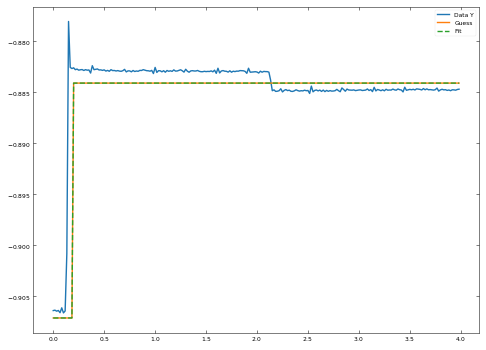

In [4]:
def steppedLinear(times, voffset, hoffset, slope, stepSize, stepDuration):
    timeSpan = max(times) - min(times)
    stepCount = int(timeSpan/stepDuration)
    line = np.linspace(hoffset + 1e-8, stepCount + hoffset, len(times))
    line = np.round(line) - 1
    line *= stepSize
    line += voffset
    return line

guesses = {}
optParams = {}

guesses['voffset'] = np.median(Vys)
guesses['hoffset'] = 0.45
guesses['slope'] = 1
guesses['stepSize'] = 0.023
guesses['stepDuration'] = (max(timestamps) - min(timestamps))

# optParamVals, optParamCov = scipy.optimize.curve_fit(steppedLinear, timestamps, Vys,
#     p0 = [guesses[parameterName] for parameterName in guesses.keys()])

optParamVals, optParamCov = scipy.optimize.curve_fit(steppedLinear, timestamps, Vys,
    p0 = [guesses[parameterName] for parameterName in guesses.keys()])

for parameterName, value in zip(guesses.keys(), optParamVals):
    optParams[parameterName] = value

plt.plot(timestamps, Vys, label='Data Y')
# plt.plot(timestamps, steppedLinear(timestamps, min(Vys), 0.45, 1, 0.02, (max(timestamps) - min(timestamps))))
plt.plot(timestamps, steppedLinear(timestamps, **guesses), label='Guess')
plt.plot(timestamps, steppedLinear(timestamps, **optParams), '--', label='Fit')
plt.legend()
plt.show()

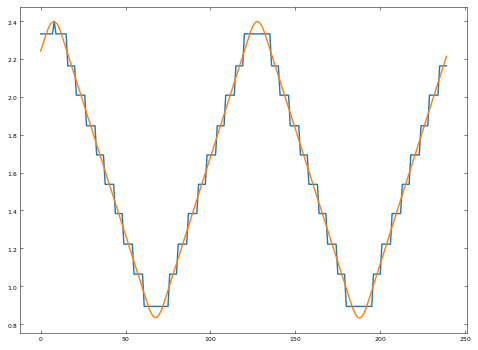

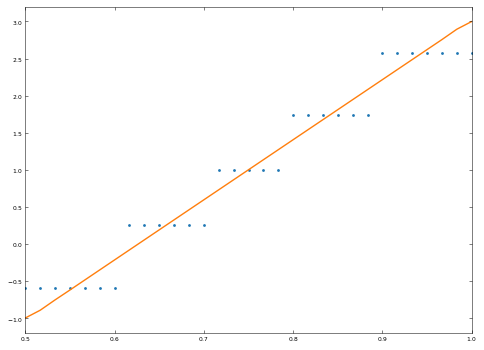

In [5]:
hist, bins = np.histogram(Vxs, 10)
inds = np.digitize(Vxs, bins) - 1
bin_means = [Vxs[inds == i].mean() for i in range(len(bins))]
bin_means = np.array(bin_means)

plt.plot(bin_means[inds])
plt.plot(Vxs)
plt.show()

data = triangleCosWave(timestamps, 2, 1, 0, 1)

hist, bins = np.histogram(data, 5)
inds = np.digitize(data, bins) - 1
bin_means = [data[inds == i].mean() for i in range(len(bins))]
bin_means = np.array(bin_means)

plt.plot(timestamps, bin_means[inds], '.')
plt.plot(timestamps, data)
plt.xlim(0.5, 1)
plt.show()

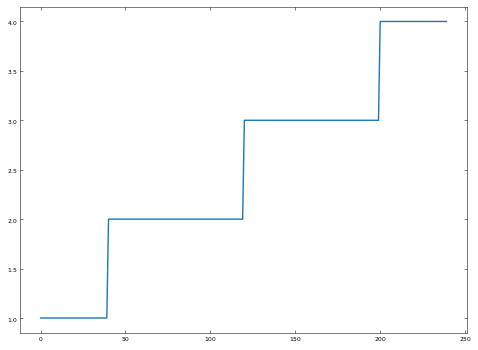

In [6]:
def steppedTriangleWave(times, voffset, hoffset, slope, stepSize, stepDuration, steps):
    timeSpan = max(times) - min(times)
    stepCount = int(timeSpan/stepDuration)
    line = np.linspace(hoffset + 1e-8, stepCount + hoffset, len(times))
    line = np.round(line) - 1
    line *= stepSize
    line += voffset
    return line

plt.plot(steppedTriangleWave(timestamps, 1, 1, 1, 1, 1, 10))
plt.show()

In [7]:
def discretize(data, levels):
    hist, bins = np.histogram(data, levels)
    # Digitize has an open right inequality, so discard the max data value from the bin edge descriptions
    bins = bins[0:-1]
    inds = np.digitize(data, bins) - 1
    binMeans = [data[inds == i].mean() for i in range(len(bins))]
    binMeans = np.array(binMeans)
    return binMeans[inds]

def discretizedTriangleCosWave(levels, *args):
    return discretize(triangleCosWave(*args), levels)


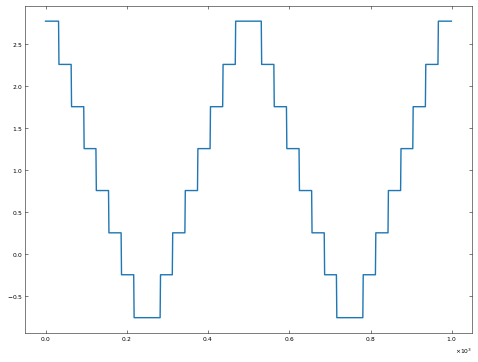

In [8]:
data = discretizedTriangleCosWave(8, np.linspace(0,2,1000), 2, 1, 0, 1)

plt.plot(data)
plt.show()

In [9]:
np.unique(data, return_counts=True)

(array([-0.76340507, -0.25229811,  0.24702335,  0.75035896,  1.24964792,
         1.74892152,  2.25227692,  2.76724593]),
 array([130, 122, 124, 124, 122, 124, 124, 130]))

In [10]:
timestamps = [1544645700.6113527, 1544645700.6280196, 1544645700.6446867, 1544645700.6613536, 1544645700.6780207, 1544645700.6946876, 1544645700.7113547, 1544645700.7280216, 1544645700.7446887, 1544645700.7613556, 1544645700.7780228, 1544645700.7946897, 1544645700.8113568, 1544645700.8280237, 1544645700.8446908, 1544645700.8613577, 1544645700.8780246, 1544645700.8946917, 1544645700.9113586, 1544645700.9280257, 1544645700.9446926, 1544645700.9613597, 1544645700.9780266, 1544645700.9946938, 1544645701.0113606, 1544645701.0280278, 1544645701.0446947, 1544645701.0613618, 1544645701.0780287, 1544645701.0946956, 1544645701.1113627, 1544645701.1280296, 1544645701.1446967, 1544645701.1613636, 1544645701.1780307, 1544645701.1946976, 1544645701.2113647, 1544645701.2280316, 1544645701.2446988, 1544645701.2613657, 1544645701.2780328, 1544645701.2946997, 1544645701.3113668, 1544645701.3280337, 1544645701.3447006, 1544645701.3613677, 1544645701.3780346, 1544645701.3947017, 1544645701.4113686, 1544645701.4280357, 1544645701.4447026, 1544645701.4613698, 1544645701.4780366, 1544645701.4947038, 1544645701.5113707, 1544645701.5280378, 1544645701.5447047, 1544645701.5613716, 1544645701.5780387, 1544645701.5947056, 1544645701.6113727, 1544645701.6280396, 1544645701.6447067, 1544645701.6613736, 1544645701.6780407, 1544645701.6947076, 1544645701.7113748, 1544645701.7280416, 1544645701.7447088, 1544645701.7613757, 1544645701.7780428, 1544645701.7947097, 1544645701.8113766, 1544645701.8280437, 1544645701.8447106, 1544645701.8613777, 1544645701.8780446, 1544645701.8947117, 1544645701.9113786, 1544645701.9280457, 1544645701.9447126, 1544645701.9613798, 1544645701.9780467, 1544645701.9947138, 1544645702.0113807, 1544645702.0280478, 1544645702.0447147, 1544645702.0613816, 1544645702.0780487, 1544645702.0947156, 1544645702.1113827, 1544645702.1280496, 1544645702.1447167, 1544645702.1613836, 1544645702.1780508, 1544645702.1947176, 1544645702.2113848, 1544645702.2280517, 1544645702.2447188, 1544645702.2613857, 1544645702.2780526, 1544645702.2947197, 1544645702.3113866, 1544645702.3280537, 1544645702.3447206, 1544645702.3613877, 1544645702.3780546, 1544645702.3947217, 1544645702.4113886, 1544645702.4280558, 1544645702.4447227, 1544645702.4613898, 1544645702.4780567, 1544645702.4947238, 1544645702.5113907, 1544645702.5280576, 1544645702.5447247, 1544645702.5613916, 1544645702.5780587, 1544645702.5947256, 1544645704.6091182, 1544645704.625785, 1544645704.6424522, 1544645704.6591191, 1544645704.6757863, 1544645704.6924531, 1544645704.7091203, 1544645704.7257872, 1544645704.7424543, 1544645704.7591212, 1544645704.7757883, 1544645704.7924552, 1544645704.8091223, 1544645704.8257892, 1544645704.8424563, 1544645704.8591232, 1544645704.87579, 1544645704.8924572, 1544645704.9091241, 1544645704.9257913, 1544645704.9424582, 1544645704.9591253, 1544645704.9757922, 1544645704.9924593, 1544645705.0091262, 1544645705.0257933, 1544645705.0424602, 1544645705.0591273, 1544645705.0757942, 1544645705.092461, 1544645705.1091282, 1544645705.1257951, 1544645705.1424623, 1544645705.1591291, 1544645705.1757963, 1544645705.1924632, 1544645705.2091303, 1544645705.2257972, 1544645705.2424643, 1544645705.2591312, 1544645705.2757983, 1544645705.2924652, 1544645705.3091323, 1544645705.3257992, 1544645705.342466, 1544645705.3591332, 1544645705.3758001, 1544645705.3924673, 1544645705.4091341, 1544645705.4258013, 1544645705.4424682, 1544645705.4591353, 1544645705.4758022, 1544645705.4924693, 1544645705.5091362, 1544645705.5258033, 1544645705.5424702, 1544645705.559137, 1544645705.5758042, 1544645705.5924711, 1544645705.6091383, 1544645705.6258051, 1544645705.6424723, 1544645705.6591392, 1544645705.6758063, 1544645705.6924732, 1544645705.7091403, 1544645705.7258072, 1544645705.7424743, 1544645705.7591412, 1544645705.7758083, 1544645705.7924752, 1544645705.809142, 1544645705.8258092, 1544645705.8424761, 1544645705.8591433, 1544645705.8758101, 1544645705.8924773, 1544645705.9091442, 1544645705.9258113, 1544645705.9424782, 1544645705.9591453, 1544645705.9758122, 1544645705.9924793, 1544645706.0091462, 1544645706.0258133, 1544645706.0424802, 1544645706.0591471, 1544645706.0758142, 1544645706.0924811, 1544645706.1091483, 1544645706.1258152, 1544645706.1424823, 1544645706.1591492, 1544645706.1758163, 1544645706.1924832, 1544645706.2091503, 1544645706.2258172, 1544645706.2424843, 1544645706.2591512, 1544645706.275818, 1544645706.2924852, 1544645706.3091521, 1544645706.3258193, 1544645706.3424861, 1544645706.3591533, 1544645706.3758202, 1544645706.3924873, 1544645706.4091542, 1544645706.4258213, 1544645706.4424882, 1544645706.4591553, 1544645706.4758222, 1544645706.4924893, 1544645706.5091562, 1544645706.525823, 1544645706.5424902, 1544645706.5591571, 1544645706.5758243, 1544645706.5924911, 1544645708.6124036, 1544645708.6290705, 1544645708.6457376, 1544645708.6624045, 1544645708.6790717, 1544645708.6957386, 1544645708.7124057, 1544645708.7290726, 1544645708.7457397, 1544645708.7624066, 1544645708.7790737, 1544645708.7957406, 1544645708.8124077, 1544645708.8290746, 1544645708.8457417, 1544645708.8624086, 1544645708.8790755, 1544645708.8957427, 1544645708.9124095, 1544645708.9290767, 1544645708.9457436, 1544645708.9624107, 1544645708.9790776, 1544645708.9957447, 1544645709.0124116, 1544645709.0290787, 1544645709.0457456, 1544645709.0624127, 1544645709.0790796, 1544645709.0957465, 1544645709.1124136, 1544645709.1290805, 1544645709.1457477, 1544645709.1624146, 1544645709.1790817, 1544645709.1957486, 1544645709.2124157, 1544645709.2290826, 1544645709.2457497, 1544645709.2624166, 1544645709.2790837, 1544645709.2957506, 1544645709.3124177, 1544645709.3290846, 1544645709.3457515, 1544645709.3624187, 1544645709.3790855, 1544645709.3957527, 1544645709.4124196, 1544645709.4290867, 1544645709.4457536, 1544645709.4624207, 1544645709.4790876, 1544645709.4957547, 1544645709.5124216, 1544645709.5290887, 1544645709.5457556, 1544645709.5624225, 1544645709.5790896, 1544645709.5957565, 1544645709.6124237, 1544645709.6290905, 1544645709.6457577, 1544645709.6624246, 1544645709.6790917, 1544645709.6957586, 1544645709.7124257, 1544645709.7290926, 1544645709.7457597, 1544645709.7624266, 1544645709.7790937, 1544645709.7957606, 1544645709.8124275, 1544645709.8290946, 1544645709.8457615, 1544645709.8624287, 1544645709.8790956, 1544645709.8957627, 1544645709.9124296, 1544645709.9290967, 1544645709.9457636, 1544645709.9624307, 1544645709.9790976, 1544645709.9957647, 1544645710.0124316, 1544645710.0290987, 1544645710.0457656, 1544645710.0624325, 1544645710.0790997, 1544645710.0957665, 1544645710.1124337, 1544645710.1291006, 1544645710.1457677, 1544645710.1624346, 1544645710.1791017, 1544645710.1957686, 1544645710.2124357, 1544645710.2291026, 1544645710.2457697, 1544645710.2624366, 1544645710.2791035, 1544645710.2957706, 1544645710.3124375, 1544645710.3291047, 1544645710.3457716, 1544645710.3624387, 1544645710.3791056, 1544645710.3957727, 1544645710.4124396, 1544645710.4291067, 1544645710.4457736, 1544645710.4624407, 1544645710.4791076, 1544645710.4957747, 1544645710.5124416, 1544645710.5291085, 1544645710.5457757, 1544645710.5624425, 1544645710.5791097, 1544645710.5957766, 1544645712.608663, 1544645712.62533, 1544645712.641997, 1544645712.658664, 1544645712.675331, 1544645712.691998, 1544645712.7086651, 1544645712.725332, 1544645712.7419991, 1544645712.758666, 1544645712.7753332, 1544645712.792, 1544645712.8086672, 1544645712.825334, 1544645712.8420012, 1544645712.858668, 1544645712.875335, 1544645712.892002, 1544645712.908669, 1544645712.9253361, 1544645712.942003, 1544645712.9586701, 1544645712.975337, 1544645712.9920042, 1544645713.008671, 1544645713.0253382, 1544645713.042005, 1544645713.0586722, 1544645713.075339, 1544645713.092006, 1544645713.108673, 1544645713.12534, 1544645713.142007, 1544645713.158674, 1544645713.1753411, 1544645713.192008, 1544645713.2086751, 1544645713.225342, 1544645713.2420092, 1544645713.258676, 1544645713.2753432, 1544645713.29201, 1544645713.3086772, 1544645713.325344, 1544645713.342011, 1544645713.358678, 1544645713.375345, 1544645713.3920121, 1544645713.408679, 1544645713.4253461, 1544645713.442013, 1544645713.4586802, 1544645713.475347, 1544645713.4920142, 1544645713.508681, 1544645713.5253482, 1544645713.542015, 1544645713.558682, 1544645713.575349, 1544645713.592016, 1544645713.608683, 1544645713.62535, 1544645713.6420171, 1544645713.658684, 1544645713.6753511, 1544645713.692018, 1544645713.7086852, 1544645713.725352, 1544645713.7420192, 1544645713.758686, 1544645713.7753532, 1544645713.79202, 1544645713.808687, 1544645713.825354, 1544645713.842021, 1544645713.858688, 1544645713.875355, 1544645713.8920221, 1544645713.908689, 1544645713.9253561, 1544645713.942023, 1544645713.9586902, 1544645713.975357, 1544645713.9920242, 1544645714.008691, 1544645714.0253582, 1544645714.042025, 1544645714.058692, 1544645714.075359, 1544645714.092026, 1544645714.1086931, 1544645714.12536, 1544645714.1420271, 1544645714.158694, 1544645714.1753612, 1544645714.192028, 1544645714.2086952, 1544645714.225362, 1544645714.2420292, 1544645714.258696, 1544645714.275363, 1544645714.29203, 1544645714.308697, 1544645714.325364, 1544645714.342031, 1544645714.3586981, 1544645714.375365, 1544645714.3920321, 1544645714.408699, 1544645714.4253662, 1544645714.442033, 1544645714.4587002, 1544645714.475367, 1544645714.4920342, 1544645714.508701, 1544645714.525368, 1544645714.542035, 1544645714.558702, 1544645714.5753691, 1544645714.592036, 1544645716.6044257, 1544645716.6210926, 1544645716.6377597, 1544645716.6544266, 1544645716.6710937, 1544645716.6877606, 1544645716.7044277, 1544645716.7210946, 1544645716.7377617, 1544645716.7544286, 1544645716.7710958, 1544645716.7877626, 1544645716.8044298, 1544645716.8210967, 1544645716.8377638, 1544645716.8544307, 1544645716.8710976, 1544645716.8877647, 1544645716.9044316, 1544645716.9210987, 1544645716.9377656, 1544645716.9544327, 1544645716.9710996, 1544645716.9877667, 1544645717.0044336, 1544645717.0211008, 1544645717.0377676, 1544645717.0544348, 1544645717.0711017, 1544645717.0877686, 1544645717.1044357, 1544645717.1211026, 1544645717.1377697, 1544645717.1544366, 1544645717.1711037, 1544645717.1877706, 1544645717.2044377, 1544645717.2211046, 1544645717.2377717, 1544645717.2544386, 1544645717.2711058, 1544645717.2877727, 1544645717.3044398, 1544645717.3211067, 1544645717.3377736, 1544645717.3544407, 1544645717.3711076, 1544645717.3877747, 1544645717.4044416, 1544645717.4211087, 1544645717.4377756, 1544645717.4544427, 1544645717.4711096, 1544645717.4877768, 1544645717.5044436, 1544645717.5211108, 1544645717.5377777, 1544645717.5544446, 1544645717.5711117, 1544645717.5877786, 1544645717.6044457, 1544645717.6211126, 1544645717.6377797, 1544645717.6544466, 1544645717.6711137, 1544645717.6877806, 1544645717.7044477, 1544645717.7211146, 1544645717.7377818, 1544645717.7544487, 1544645717.7711158, 1544645717.7877827, 1544645717.8044496, 1544645717.8211167, 1544645717.8377836, 1544645717.8544507, 1544645717.8711176, 1544645717.8877847, 1544645717.9044516, 1544645717.9211187, 1544645717.9377856, 1544645717.9544528, 1544645717.9711196, 1544645717.9877868, 1544645718.0044537, 1544645718.0211208, 1544645718.0377877, 1544645718.0544546, 1544645718.0711217, 1544645718.0877886, 1544645718.1044557, 1544645718.1211226, 1544645718.1377897, 1544645718.1544566, 1544645718.1711237, 1544645718.1877906, 1544645718.2044578, 1544645718.2211246, 1544645718.2377918, 1544645718.2544587, 1544645718.2711256, 1544645718.2877927, 1544645718.3044596, 1544645718.3211267, 1544645718.3377936, 1544645718.3544607, 1544645718.3711276, 1544645718.3877947, 1544645718.4044616, 1544645718.4211287, 1544645718.4377956, 1544645718.4544628, 1544645718.4711297, 1544645718.4877968, 1544645718.5044637, 1544645718.5211306, 1544645718.5377977, 1544645718.5544646, 1544645718.5711317, 1544645718.5877986, 1544645720.6921911, 1544645720.708858, 1544645720.7255251, 1544645720.742192, 1544645720.7588592, 1544645720.775526, 1544645720.7921932, 1544645720.80886, 1544645720.8255272, 1544645720.842194, 1544645720.8588612, 1544645720.875528, 1544645720.8921952, 1544645720.908862, 1544645720.9255292, 1544645720.9421961, 1544645720.958863, 1544645720.9755301, 1544645720.992197, 1544645721.0088642, 1544645721.025531, 1544645721.0421982, 1544645721.058865, 1544645721.0755322, 1544645721.092199, 1544645721.1088662, 1544645721.125533, 1544645721.1422002, 1544645721.1588671, 1544645721.175534, 1544645721.1922011, 1544645721.208868, 1544645721.2255352, 1544645721.242202, 1544645721.2588692, 1544645721.275536, 1544645721.2922032, 1544645721.30887, 1544645721.3255372, 1544645721.342204, 1544645721.3588712, 1544645721.375538, 1544645721.3922052, 1544645721.4088721, 1544645721.425539, 1544645721.4422061, 1544645721.458873, 1544645721.4755402, 1544645721.492207, 1544645721.5088742, 1544645721.525541, 1544645721.5422082, 1544645721.558875, 1544645721.5755422, 1544645721.592209, 1544645721.6088762, 1544645721.625543, 1544645721.64221, 1544645721.6588771, 1544645721.675544, 1544645721.6922112, 1544645721.708878, 1544645721.7255452, 1544645721.742212, 1544645721.7588792, 1544645721.775546, 1544645721.7922132, 1544645721.80888, 1544645721.8255472, 1544645721.842214, 1544645721.8588812, 1544645721.8755481, 1544645721.892215, 1544645721.9088821, 1544645721.925549, 1544645721.9422162, 1544645721.958883, 1544645721.9755502, 1544645721.992217, 1544645722.0088842, 1544645722.025551, 1544645722.0422182, 1544645722.058885, 1544645722.0755522, 1544645722.092219, 1544645722.1088862, 1544645722.1255531, 1544645722.14222, 1544645722.1588871, 1544645722.175554, 1544645722.1922212, 1544645722.208888, 1544645722.2255552, 1544645722.242222, 1544645722.2588892, 1544645722.275556, 1544645722.2922232, 1544645722.30889, 1544645722.3255572, 1544645722.3422241, 1544645722.358891, 1544645722.3755581, 1544645722.392225, 1544645722.4088922, 1544645722.425559, 1544645722.4422262, 1544645722.458893, 1544645722.4755602, 1544645722.492227, 1544645722.5088942, 1544645722.525561, 1544645722.5422282, 1544645722.558895, 1544645722.5755622, 1544645722.5922291, 1544645722.608896, 1544645722.6255631, 1544645722.64223, 1544645722.6588972, 1544645722.675564, 1544645724.6071177, 1544645724.6237845, 1544645724.6404517, 1544645724.6571186, 1544645724.6737857, 1544645724.6904526, 1544645724.7071197, 1544645724.7237866, 1544645724.7404537, 1544645724.7571206, 1544645724.7737877, 1544645724.7904546, 1544645724.8071218, 1544645724.8237886, 1544645724.8404558, 1544645724.8571227, 1544645724.8737895, 1544645724.8904567, 1544645724.9071236, 1544645724.9237907, 1544645724.9404576, 1544645724.9571247, 1544645724.9737916, 1544645724.9904587, 1544645725.0071256, 1544645725.0237927, 1544645725.0404596, 1544645725.0571268, 1544645725.0737936, 1544645725.0904605, 1544645725.1071277, 1544645725.1237946, 1544645725.1404617, 1544645725.1571286, 1544645725.1737957, 1544645725.1904626, 1544645725.2071297, 1544645725.2237966, 1544645725.2404637, 1544645725.2571306, 1544645725.2737978, 1544645725.2904646, 1544645725.3071318, 1544645725.3237987, 1544645725.3404655, 1544645725.3571327, 1544645725.3737996, 1544645725.3904667, 1544645725.4071336, 1544645725.4238007, 1544645725.4404676, 1544645725.4571347, 1544645725.4738016, 1544645725.4904687, 1544645725.5071356, 1544645725.5238028, 1544645725.5404696, 1544645725.5571365, 1544645725.5738037, 1544645725.5904706, 1544645725.6071377, 1544645725.6238046, 1544645725.6404717, 1544645725.6571386, 1544645725.6738057, 1544645725.6904726, 1544645725.7071397, 1544645725.7238066, 1544645725.7404737, 1544645725.7571406, 1544645725.7738078, 1544645725.7904747, 1544645725.8071415, 1544645725.8238087, 1544645725.8404756, 1544645725.8571427, 1544645725.8738096, 1544645725.8904767, 1544645725.9071436, 1544645725.9238107, 1544645725.9404776, 1544645725.9571447, 1544645725.9738116, 1544645725.9904788, 1544645726.0071456, 1544645726.0238128, 1544645726.0404797, 1544645726.0571465, 1544645726.0738137, 1544645726.0904806, 1544645726.1071477, 1544645726.1238146, 1544645726.1404817, 1544645726.1571486, 1544645726.1738157, 1544645726.1904826, 1544645726.2071497, 1544645726.2238166, 1544645726.2404838, 1544645726.2571507, 1544645726.2738175, 1544645726.2904847, 1544645726.3071516, 1544645726.3238187, 1544645726.3404856, 1544645726.3571527, 1544645726.3738196, 1544645726.3904867, 1544645726.4071536, 1544645726.4238207, 1544645726.4404876, 1544645726.4571548, 1544645726.4738216, 1544645726.4904888, 1544645726.5071557, 1544645726.5238225, 1544645726.5404897, 1544645726.5571566, 1544645726.5738237, 1544645726.5904906, 1544645728.6742258, 1544645728.6908927, 1544645728.7075598, 1544645728.7242267, 1544645728.7408938, 1544645728.7575607, 1544645728.7742279, 1544645728.7908947, 1544645728.8075619, 1544645728.8242288, 1544645728.840896, 1544645728.8575628, 1544645728.87423, 1544645728.8908968, 1544645728.907564, 1544645728.9242308, 1544645728.9408977, 1544645728.9575648, 1544645728.9742317, 1544645728.9908988, 1544645729.0075657, 1544645729.0242329, 1544645729.0408998, 1544645729.057567, 1544645729.0742338, 1544645729.090901, 1544645729.1075678, 1544645729.124235, 1544645729.1409018, 1544645729.1575687, 1544645729.1742358, 1544645729.1909027, 1544645729.2075698, 1544645729.2242367, 1544645729.2409039, 1544645729.2575707, 1544645729.2742379, 1544645729.2909048, 1544645729.307572, 1544645729.3242388, 1544645729.340906, 1544645729.3575728, 1544645729.37424, 1544645729.3909068, 1544645729.4075737, 1544645729.4242408, 1544645729.4409077, 1544645729.4575748, 1544645729.4742417, 1544645729.4909089, 1544645729.5075758, 1544645729.5242429, 1544645729.5409098, 1544645729.557577, 1544645729.5742438, 1544645729.590911, 1544645729.6075778, 1544645729.6242447, 1544645729.6409118, 1544645729.6575787, 1544645729.6742458, 1544645729.6909127, 1544645729.7075799, 1544645729.7242467, 1544645729.7409139, 1544645729.7575808, 1544645729.774248, 1544645729.7909148, 1544645729.807582, 1544645729.8242488, 1544645729.840916, 1544645729.8575828, 1544645729.8742497, 1544645729.8909168, 1544645729.9075837, 1544645729.9242508, 1544645729.9409177, 1544645729.9575849, 1544645729.9742517, 1544645729.9909189, 1544645730.0075858, 1544645730.024253, 1544645730.0409198, 1544645730.057587, 1544645730.0742538, 1544645730.090921, 1544645730.1075878, 1544645730.1242547, 1544645730.1409218, 1544645730.1575887, 1544645730.1742558, 1544645730.1909227, 1544645730.2075899, 1544645730.2242568, 1544645730.240924, 1544645730.2575908, 1544645730.274258, 1544645730.2909248, 1544645730.307592, 1544645730.3242588, 1544645730.3409257, 1544645730.3575928, 1544645730.3742597, 1544645730.3909268, 1544645730.4075937, 1544645730.4242609, 1544645730.4409277, 1544645730.4575949, 1544645730.4742618, 1544645730.490929, 1544645730.5075958, 1544645730.524263, 1544645730.5409298, 1544645730.557597, 1544645730.5742638, 1544645730.5909307, 1544645730.6075978, 1544645730.6242647, 1544645730.6409318, 1544645730.6575987, 1544645732.6565015, 1544645732.6731684, 1544645732.6898355, 1544645732.7065024, 1544645732.7231696, 1544645732.7398365, 1544645732.7565036, 1544645732.7731705, 1544645732.7898376, 1544645732.8065045, 1544645732.8231716, 1544645732.8398385, 1544645732.8565056, 1544645732.8731725, 1544645732.8898396, 1544645732.9065065, 1544645732.9231734, 1544645732.9398406, 1544645732.9565074, 1544645732.9731746, 1544645732.9898415, 1544645733.0065086, 1544645733.0231755, 1544645733.0398426, 1544645733.0565095, 1544645733.0731766, 1544645733.0898435, 1544645733.1065106, 1544645733.1231775, 1544645733.1398444, 1544645733.1565115, 1544645733.1731784, 1544645733.1898456, 1544645733.2065125, 1544645733.2231796, 1544645733.2398465, 1544645733.2565136, 1544645733.2731805, 1544645733.2898476, 1544645733.3065145, 1544645733.3231816, 1544645733.3398485, 1544645733.3565156, 1544645733.3731825, 1544645733.3898494, 1544645733.4065166, 1544645733.4231834, 1544645733.4398506, 1544645733.4565175, 1544645733.4731846, 1544645733.4898515, 1544645733.5065186, 1544645733.5231855, 1544645733.5398526, 1544645733.5565195, 1544645733.5731866, 1544645733.5898535, 1544645733.6065204, 1544645733.6231875, 1544645733.6398544, 1544645733.6565216, 1544645733.6731884, 1544645733.6898556, 1544645733.7065225, 1544645733.7231896, 1544645733.7398565, 1544645733.7565236, 1544645733.7731905, 1544645733.7898576, 1544645733.8065245, 1544645733.8231916, 1544645733.8398585, 1544645733.8565254, 1544645733.8731925, 1544645733.8898594, 1544645733.9065266, 1544645733.9231935, 1544645733.9398606, 1544645733.9565275, 1544645733.9731946, 1544645733.9898615, 1544645734.0065286, 1544645734.0231955, 1544645734.0398626, 1544645734.0565295, 1544645734.0731966, 1544645734.0898635, 1544645734.1065304, 1544645734.1231976, 1544645734.1398644, 1544645734.1565316, 1544645734.1731985, 1544645734.1898656, 1544645734.2065325, 1544645734.2231996, 1544645734.2398665, 1544645734.2565336, 1544645734.2732005, 1544645734.2898676, 1544645734.3065345, 1544645734.3232014, 1544645734.3398685, 1544645734.3565354, 1544645734.3732026, 1544645734.3898695, 1544645734.4065366, 1544645734.4232035, 1544645734.4398706, 1544645734.4565375, 1544645734.4732046, 1544645734.4898715, 1544645734.5065386, 1544645734.5232055, 1544645734.5398726, 1544645734.5565395, 1544645734.5732064, 1544645734.5898736, 1544645734.6065404, 1544645734.6232076, 1544645734.6398745, 1544645736.6108673, 1544645736.6275342, 1544645736.6442013, 1544645736.6608682, 1544645736.6775353, 1544645736.6942022, 1544645736.7108693, 1544645736.7275362, 1544645736.7442033, 1544645736.7608702, 1544645736.7775373, 1544645736.7942042, 1544645736.8108714, 1544645736.8275383, 1544645736.8442054, 1544645736.8608723, 1544645736.8775392, 1544645736.8942063, 1544645736.9108732, 1544645736.9275403, 1544645736.9442072, 1544645736.9608743, 1544645736.9775412, 1544645736.9942083, 1544645737.0108752, 1544645737.0275424, 1544645737.0442092, 1544645737.0608764, 1544645737.0775433, 1544645737.0942101, 1544645737.1108773, 1544645737.1275442, 1544645737.1442113, 1544645737.1608782, 1544645737.1775453, 1544645737.1942122, 1544645737.2108793, 1544645737.2275462, 1544645737.2442133, 1544645737.2608802, 1544645737.2775474, 1544645737.2942142, 1544645737.3108814, 1544645737.3275483, 1544645737.3442152, 1544645737.3608823, 1544645737.3775492, 1544645737.3942163, 1544645737.4108832, 1544645737.4275503, 1544645737.4442172, 1544645737.4608843, 1544645737.4775512, 1544645737.4942183, 1544645737.5108852, 1544645737.5275524, 1544645737.5442193, 1544645737.5608861, 1544645737.5775533, 1544645737.5942202, 1544645737.6108873, 1544645737.6275542, 1544645737.6442213, 1544645737.6608882, 1544645737.6775553, 1544645737.6942222, 1544645737.7108893, 1544645737.7275562, 1544645737.7442234, 1544645737.7608902, 1544645737.7775574, 1544645737.7942243, 1544645737.8108912, 1544645737.8275583, 1544645737.8442252, 1544645737.8608923, 1544645737.8775592, 1544645737.8942263, 1544645737.9108932, 1544645737.9275603, 1544645737.9442272, 1544645737.9608943, 1544645737.9775612, 1544645737.9942284, 1544645738.0108953, 1544645738.0275624, 1544645738.0442293, 1544645738.0608962, 1544645738.0775633, 1544645738.0942302, 1544645738.1108973, 1544645738.1275642, 1544645738.1442313, 1544645738.1608982, 1544645738.1775653, 1544645738.1942322, 1544645738.2108994, 1544645738.2275662, 1544645738.2442334, 1544645738.2609003, 1544645738.2775671, 1544645738.2942343, 1544645738.3109012, 1544645738.3275683, 1544645738.3442352, 1544645738.3609023, 1544645738.3775692, 1544645738.3942363, 1544645738.4109032, 1544645738.4275703, 1544645738.4442372, 1544645738.4609044, 1544645738.4775712, 1544645738.4942384, 1544645738.5109053, 1544645738.5275722, 1544645738.5442393, 1544645738.5609062, 1544645738.5775733, 1544645738.5942402, 1544645740.6031451, 1544645740.619812, 1544645740.6364791, 1544645740.653146, 1544645740.6698132, 1544645740.68648, 1544645740.7031472, 1544645740.719814, 1544645740.7364812, 1544645740.753148, 1544645740.7698152, 1544645740.786482, 1544645740.8031492, 1544645740.819816, 1544645740.8364832, 1544645740.8531501, 1544645740.869817, 1544645740.8864841, 1544645740.903151, 1544645740.9198182, 1544645740.936485, 1544645740.9531522, 1544645740.969819, 1544645740.9864862, 1544645741.003153, 1544645741.0198202, 1544645741.036487, 1544645741.0531542, 1544645741.0698211, 1544645741.086488, 1544645741.1031551, 1544645741.119822, 1544645741.1364892, 1544645741.153156, 1544645741.1698232, 1544645741.18649, 1544645741.2031572, 1544645741.219824, 1544645741.2364912, 1544645741.253158, 1544645741.2698252, 1544645741.286492, 1544645741.3031592, 1544645741.3198261, 1544645741.336493, 1544645741.3531601, 1544645741.369827, 1544645741.3864942, 1544645741.403161, 1544645741.4198282, 1544645741.436495, 1544645741.4531622, 1544645741.469829, 1544645741.4864962, 1544645741.503163, 1544645741.5198302, 1544645741.536497, 1544645741.553164, 1544645741.5698311, 1544645741.586498, 1544645741.6031651, 1544645741.619832, 1544645741.6364992, 1544645741.653166, 1544645741.6698332, 1544645741.6865, 1544645741.7031672, 1544645741.719834, 1544645741.7365012, 1544645741.753168, 1544645741.7698352, 1544645741.7865021, 1544645741.803169, 1544645741.8198361, 1544645741.836503, 1544645741.8531702, 1544645741.869837, 1544645741.8865042, 1544645741.903171, 1544645741.9198382, 1544645741.936505, 1544645741.9531722, 1544645741.969839, 1544645741.9865062, 1544645742.003173, 1544645742.0198402, 1544645742.0365071, 1544645742.053174, 1544645742.0698411, 1544645742.086508, 1544645742.1031752, 1544645742.119842, 1544645742.1365092, 1544645742.153176, 1544645742.1698432, 1544645742.18651, 1544645742.2031772, 1544645742.219844, 1544645742.2365112, 1544645742.2531781, 1544645742.269845, 1544645742.2865121, 1544645742.303179, 1544645742.3198462, 1544645742.336513, 1544645742.3531802, 1544645742.369847, 1544645742.3865142, 1544645742.403181, 1544645742.4198482, 1544645742.436515, 1544645742.4531822, 1544645742.469849, 1544645742.4865162, 1544645742.5031831, 1544645742.51985, 1544645742.5365171, 1544645742.553184, 1544645742.5698512, 1544645742.586518, 1544645744.618064, 1544645744.6347308, 1544645744.651398, 1544645744.6680648, 1544645744.684732, 1544645744.7013988, 1544645744.718066, 1544645744.7347329, 1544645744.7514, 1544645744.768067, 1544645744.784734, 1544645744.801401, 1544645744.818068, 1544645744.834735, 1544645744.851402, 1544645744.868069, 1544645744.8847358, 1544645744.901403, 1544645744.9180698, 1544645744.934737, 1544645744.9514039, 1544645744.968071, 1544645744.9847379, 1544645745.001405, 1544645745.018072, 1544645745.034739, 1544645745.051406, 1544645745.068073, 1544645745.08474, 1544645745.1014068, 1544645745.118074, 1544645745.1347408, 1544645745.151408, 1544645745.1680748, 1544645745.184742, 1544645745.2014089, 1544645745.218076, 1544645745.2347429, 1544645745.25141, 1544645745.268077, 1544645745.284744, 1544645745.301411, 1544645745.318078, 1544645745.334745, 1544645745.3514118, 1544645745.368079, 1544645745.3847458, 1544645745.401413, 1544645745.4180799, 1544645745.434747, 1544645745.4514139, 1544645745.468081, 1544645745.484748, 1544645745.501415, 1544645745.518082, 1544645745.534749, 1544645745.551416, 1544645745.5680828, 1544645745.58475, 1544645745.6014168, 1544645745.618084, 1544645745.6347508, 1544645745.651418, 1544645745.6680849, 1544645745.684752, 1544645745.7014189, 1544645745.718086, 1544645745.734753, 1544645745.75142, 1544645745.768087, 1544645745.784754, 1544645745.801421, 1544645745.8180878, 1544645745.834755, 1544645745.8514218, 1544645745.868089, 1544645745.8847558, 1544645745.901423, 1544645745.9180899, 1544645745.934757, 1544645745.951424, 1544645745.968091, 1544645745.984758, 1544645746.001425, 1544645746.018092, 1544645746.034759, 1544645746.051426, 1544645746.0680928, 1544645746.08476, 1544645746.1014268, 1544645746.118094, 1544645746.1347609, 1544645746.151428, 1544645746.1680949, 1544645746.184762, 1544645746.201429, 1544645746.218096, 1544645746.234763, 1544645746.25143, 1544645746.268097, 1544645746.2847638, 1544645746.301431, 1544645746.3180978, 1544645746.334765, 1544645746.3514318, 1544645746.368099, 1544645746.3847659, 1544645746.401433, 1544645746.4180999, 1544645746.434767, 1544645746.451434, 1544645746.468101, 1544645746.484768, 1544645746.501435, 1544645746.518102, 1544645746.5347688, 1544645746.551436, 1544645746.5681028, 1544645746.58477, 1544645746.6014369, 1544645748.6105156, 1544645748.6271825, 1544645748.6438496, 1544645748.6605165, 1544645748.6771836, 1544645748.6938505, 1544645748.7105176, 1544645748.7271845, 1544645748.7438517, 1544645748.7605186, 1544645748.7771857, 1544645748.7938526, 1544645748.8105197, 1544645748.8271866, 1544645748.8438537, 1544645748.8605206, 1544645748.8771875, 1544645748.8938546, 1544645748.9105215, 1544645748.9271886, 1544645748.9438555, 1544645748.9605227, 1544645748.9771895, 1544645748.9938567, 1544645749.0105236, 1544645749.0271907, 1544645749.0438576, 1544645749.0605247, 1544645749.0771916, 1544645749.0938585, 1544645749.1105256, 1544645749.1271925, 1544645749.1438596, 1544645749.1605265, 1544645749.1771936, 1544645749.1938605, 1544645749.2105277, 1544645749.2271945, 1544645749.2438617, 1544645749.2605286, 1544645749.2771957, 1544645749.2938626, 1544645749.3105297, 1544645749.3271966, 1544645749.3438635, 1544645749.3605306, 1544645749.3771975, 1544645749.3938646, 1544645749.4105315, 1544645749.4271986, 1544645749.4438655, 1544645749.4605327, 1544645749.4771996, 1544645749.4938667, 1544645749.5105336, 1544645749.5272007, 1544645749.5438676, 1544645749.5605345, 1544645749.5772016, 1544645749.5938685, 1544645749.6105356, 1544645749.6272025, 1544645749.6438696, 1544645749.6605365, 1544645749.6772037, 1544645749.6938705, 1544645749.7105377, 1544645749.7272046, 1544645749.7438717, 1544645749.7605386, 1544645749.7772057, 1544645749.7938726, 1544645749.8105395, 1544645749.8272066, 1544645749.8438735, 1544645749.8605406, 1544645749.8772075, 1544645749.8938746, 1544645749.9105415, 1544645749.9272087, 1544645749.9438756, 1544645749.9605427, 1544645749.9772096, 1544645749.9938767, 1544645750.0105436, 1544645750.0272107, 1544645750.0438776, 1544645750.0605445, 1544645750.0772116, 1544645750.0938785, 1544645750.1105456, 1544645750.1272125, 1544645750.1438797, 1544645750.1605465, 1544645750.1772137, 1544645750.1938806, 1544645750.2105477, 1544645750.2272146, 1544645750.2438817, 1544645750.2605486, 1544645750.2772155, 1544645750.2938826, 1544645750.3105495, 1544645750.3272166, 1544645750.3438835, 1544645750.3605506, 1544645750.3772175, 1544645750.3938847, 1544645750.4105515, 1544645750.4272187, 1544645750.4438856, 1544645750.4605527, 1544645750.4772196, 1544645750.4938867, 1544645750.5105536, 1544645750.5272205, 1544645750.5438876, 1544645750.5605545, 1544645750.5772216, 1544645750.5938885, 1544645752.6060944, 1544645752.6227612, 1544645752.6394284, 1544645752.6560953, 1544645752.6727624, 1544645752.6894293, 1544645752.7060964, 1544645752.7227633, 1544645752.7394304, 1544645752.7560973, 1544645752.7727644, 1544645752.7894313, 1544645752.8060985, 1544645752.8227654, 1544645752.8394325, 1544645752.8560994, 1544645752.8727663, 1544645752.8894334, 1544645752.9061003, 1544645752.9227674, 1544645752.9394343, 1544645752.9561014, 1544645752.9727683, 1544645752.9894354, 1544645753.0061023, 1544645753.0227695, 1544645753.0394363, 1544645753.0561035, 1544645753.0727704, 1544645753.0894372, 1544645753.1061044, 1544645753.1227713, 1544645753.1394384, 1544645753.1561053, 1544645753.1727724, 1544645753.1894393, 1544645753.2061064, 1544645753.2227733, 1544645753.2394404, 1544645753.2561073, 1544645753.2727745, 1544645753.2894413, 1544645753.3061085, 1544645753.3227754, 1544645753.3394423, 1544645753.3561094, 1544645753.3727763, 1544645753.3894434, 1544645753.4061103, 1544645753.4227774, 1544645753.4394443, 1544645753.4561114, 1544645753.4727783, 1544645753.4894454, 1544645753.5061123, 1544645753.5227795, 1544645753.5394464, 1544645753.5561132, 1544645753.5727804, 1544645753.5894473, 1544645753.6061144, 1544645753.6227813, 1544645753.6394484, 1544645753.6561153, 1544645753.6727824, 1544645753.6894493, 1544645753.7061164, 1544645753.7227833, 1544645753.7394505, 1544645753.7561173, 1544645753.7727845, 1544645753.7894514, 1544645753.8061182, 1544645753.8227854, 1544645753.8394523, 1544645753.8561194, 1544645753.8727863, 1544645753.8894534, 1544645753.9061203, 1544645753.9227874, 1544645753.9394543, 1544645753.9561214, 1544645753.9727883, 1544645753.9894555, 1544645754.0061224, 1544645754.0227895, 1544645754.0394564, 1544645754.0561233, 1544645754.0727904, 1544645754.0894573, 1544645754.1061244, 1544645754.1227913, 1544645754.1394584, 1544645754.1561253, 1544645754.1727924, 1544645754.1894593, 1544645754.2061265, 1544645754.2227933, 1544645754.2394605, 1544645754.2561274, 1544645754.2727942, 1544645754.2894614, 1544645754.3061283, 1544645754.3227954, 1544645754.3394623, 1544645754.3561294, 1544645754.3727963, 1544645754.3894634, 1544645754.4061303, 1544645754.4227974, 1544645754.4394643, 1544645754.4561315, 1544645754.4727983, 1544645754.4894655, 1544645754.5061324, 1544645754.5227993, 1544645754.5394664, 1544645754.5561333, 1544645754.5728004, 1544645754.5894673, 1544645756.6100242, 1544645756.626691, 1544645756.6433582, 1544645756.6600251, 1544645756.6766922, 1544645756.6933591, 1544645756.7100263, 1544645756.7266932, 1544645756.7433603, 1544645756.7600272, 1544645756.7766943, 1544645756.7933612, 1544645756.8100283, 1544645756.8266952, 1544645756.8433623, 1544645756.8600292, 1544645756.876696, 1544645756.8933632, 1544645756.9100301, 1544645756.9266973, 1544645756.9433641, 1544645756.9600313, 1544645756.9766982, 1544645756.9933653, 1544645757.0100322, 1544645757.0266993, 1544645757.0433662, 1544645757.0600333, 1544645757.0767002, 1544645757.093367, 1544645757.1100342, 1544645757.126701, 1544645757.1433682, 1544645757.1600351, 1544645757.1767023, 1544645757.1933692, 1544645757.2100363, 1544645757.2267032, 1544645757.2433703, 1544645757.2600372, 1544645757.2767043, 1544645757.2933712, 1544645757.3100383, 1544645757.3267052, 1544645757.343372, 1544645757.3600392, 1544645757.3767061, 1544645757.3933733, 1544645757.4100401, 1544645757.4267073, 1544645757.4433742, 1544645757.4600413, 1544645757.4767082, 1544645757.4933753, 1544645757.5100422, 1544645757.5267093, 1544645757.5433762, 1544645757.560043, 1544645757.5767102, 1544645757.593377, 1544645757.6100442, 1544645757.6267111, 1544645757.6433783, 1544645757.6600451, 1544645757.6767123, 1544645757.6933792, 1544645757.7100463, 1544645757.7267132, 1544645757.7433803, 1544645757.7600472, 1544645757.7767143, 1544645757.7933812, 1544645757.810048, 1544645757.8267152, 1544645757.8433821, 1544645757.8600492, 1544645757.8767161, 1544645757.8933833, 1544645757.9100502, 1544645757.9267173, 1544645757.9433842, 1544645757.9600513, 1544645757.9767182, 1544645757.9933853, 1544645758.0100522, 1544645758.0267193, 1544645758.0433862, 1544645758.060053, 1544645758.0767202, 1544645758.0933871, 1544645758.1100543, 1544645758.1267211, 1544645758.1433883, 1544645758.1600552, 1544645758.1767223, 1544645758.1933892, 1544645758.2100563, 1544645758.2267232, 1544645758.2433903, 1544645758.2600572, 1544645758.276724, 1544645758.2933912, 1544645758.310058, 1544645758.3267252, 1544645758.3433921, 1544645758.3600593, 1544645758.3767262, 1544645758.3933933, 1544645758.4100602, 1544645758.4267273, 1544645758.4433942, 1544645758.4600613, 1544645758.4767282, 1544645758.4933953, 1544645758.5100622, 1544645758.526729, 1544645758.5433962, 1544645758.5600631, 1544645758.5767303, 1544645758.5933971, 1544645760.608767, 1544645760.625434, 1544645760.642101, 1544645760.658768, 1544645760.675435, 1544645760.692102, 1544645760.708769, 1544645760.725436, 1544645760.742103, 1544645760.75877, 1544645760.775437, 1544645760.792104, 1544645760.8087711, 1544645760.825438, 1544645760.8421052, 1544645760.858772, 1544645760.875439, 1544645760.892106, 1544645760.908773, 1544645760.92544, 1544645760.942107, 1544645760.958774, 1544645760.975441, 1544645760.992108, 1544645761.008775, 1544645761.0254421, 1544645761.042109, 1544645761.0587761, 1544645761.075443, 1544645761.09211, 1544645761.108777, 1544645761.125444, 1544645761.142111, 1544645761.158778, 1544645761.175445, 1544645761.192112, 1544645761.208779, 1544645761.225446, 1544645761.242113, 1544645761.25878, 1544645761.2754471, 1544645761.292114, 1544645761.3087811, 1544645761.325448, 1544645761.342115, 1544645761.358782, 1544645761.375449, 1544645761.392116, 1544645761.408783, 1544645761.42545, 1544645761.442117, 1544645761.458784, 1544645761.475451, 1544645761.4921181, 1544645761.508785, 1544645761.5254521, 1544645761.542119, 1544645761.558786, 1544645761.575453, 1544645761.59212, 1544645761.608787, 1544645761.625454, 1544645761.642121, 1544645761.658788, 1544645761.675455, 1544645761.692122, 1544645761.708789, 1544645761.725456, 1544645761.7421231, 1544645761.75879, 1544645761.7754571, 1544645761.792124, 1544645761.808791, 1544645761.825458, 1544645761.842125, 1544645761.858792, 1544645761.875459, 1544645761.892126, 1544645761.908793, 1544645761.92546, 1544645761.942127, 1544645761.958794, 1544645761.975461, 1544645761.9921281, 1544645762.008795, 1544645762.0254622, 1544645762.042129, 1544645762.058796, 1544645762.075463, 1544645762.09213, 1544645762.108797, 1544645762.125464, 1544645762.142131, 1544645762.158798, 1544645762.175465, 1544645762.192132, 1544645762.2087991, 1544645762.225466, 1544645762.2421331, 1544645762.2588, 1544645762.275467, 1544645762.292134, 1544645762.308801, 1544645762.325468, 1544645762.342135, 1544645762.358802, 1544645762.375469, 1544645762.392136, 1544645762.408803, 1544645762.42547, 1544645762.442137, 1544645762.4588041, 1544645762.475471, 1544645762.4921381, 1544645762.508805, 1544645762.525472, 1544645762.542139, 1544645762.558806, 1544645762.575473, 1544645762.59214, 1544645764.6584797, 1544645764.6751466, 1544645764.6918137, 1544645764.7084806, 1544645764.7251477, 1544645764.7418146, 1544645764.7584817, 1544645764.7751486, 1544645764.7918158, 1544645764.8084826, 1544645764.8251498, 1544645764.8418167, 1544645764.8584838, 1544645764.8751507, 1544645764.8918178, 1544645764.9084847, 1544645764.9251516, 1544645764.9418187, 1544645764.9584856, 1544645764.9751527, 1544645764.9918196, 1544645765.0084867, 1544645765.0251536, 1544645765.0418208, 1544645765.0584877, 1544645765.0751548, 1544645765.0918217, 1544645765.1084888, 1544645765.1251557, 1544645765.1418226, 1544645765.1584897, 1544645765.1751566, 1544645765.1918237, 1544645765.2084906, 1544645765.2251577, 1544645765.2418246, 1544645765.2584918, 1544645765.2751586, 1544645765.2918258, 1544645765.3084927, 1544645765.3251598, 1544645765.3418267, 1544645765.3584938, 1544645765.3751607, 1544645765.3918276, 1544645765.4084947, 1544645765.4251616, 1544645765.4418287, 1544645765.4584956, 1544645765.4751627, 1544645765.4918296, 1544645765.5084968, 1544645765.5251637, 1544645765.5418308, 1544645765.5584977, 1544645765.5751648, 1544645765.5918317, 1544645765.6084986, 1544645765.6251657, 1544645765.6418326, 1544645765.6584997, 1544645765.6751666, 1544645765.6918337, 1544645765.7085006, 1544645765.7251678, 1544645765.7418346, 1544645765.7585018, 1544645765.7751687, 1544645765.7918358, 1544645765.8085027, 1544645765.8251698, 1544645765.8418367, 1544645765.8585036, 1544645765.8751707, 1544645765.8918376, 1544645765.9085047, 1544645765.9251716, 1544645765.9418387, 1544645765.9585056, 1544645765.9751728, 1544645765.9918396, 1544645766.0085068, 1544645766.0251737, 1544645766.0418408, 1544645766.0585077, 1544645766.0751748, 1544645766.0918417, 1544645766.1085086, 1544645766.1251757, 1544645766.1418426, 1544645766.1585097, 1544645766.1751766, 1544645766.1918437, 1544645766.2085106, 1544645766.2251778, 1544645766.2418447, 1544645766.2585118, 1544645766.2751787, 1544645766.2918458, 1544645766.3085127, 1544645766.3251796, 1544645766.3418467, 1544645766.3585136, 1544645766.3751807, 1544645766.3918476, 1544645766.4085147, 1544645766.4251816, 1544645766.4418488, 1544645766.4585156, 1544645766.4751828, 1544645766.4918497, 1544645766.5085168, 1544645766.5251837, 1544645766.5418508, 1544645766.5585177, 1544645766.5751846, 1544645766.5918517, 1544645766.6085186, 1544645766.6251857, 1544645766.6418526, 1544645768.6245556, 1544645768.6412225, 1544645768.6578896, 1544645768.6745565, 1544645768.6912236, 1544645768.7078905, 1544645768.7245576, 1544645768.7412245, 1544645768.7578917, 1544645768.7745585, 1544645768.7912257, 1544645768.8078926, 1544645768.8245597, 1544645768.8412266, 1544645768.8578937, 1544645768.8745606, 1544645768.8912275, 1544645768.9078946, 1544645768.9245615, 1544645768.9412286, 1544645768.9578955, 1544645768.9745626, 1544645768.9912295, 1544645769.0078967, 1544645769.0245636, 1544645769.0412307, 1544645769.0578976, 1544645769.0745647, 1544645769.0912316, 1544645769.1078985, 1544645769.1245656, 1544645769.1412325, 1544645769.1578996, 1544645769.1745665, 1544645769.1912336, 1544645769.2079005, 1544645769.2245677, 1544645769.2412345, 1544645769.2579017, 1544645769.2745686, 1544645769.2912357, 1544645769.3079026, 1544645769.3245697, 1544645769.3412366, 1544645769.3579035, 1544645769.3745706, 1544645769.3912375, 1544645769.4079046, 1544645769.4245715, 1544645769.4412386, 1544645769.4579055, 1544645769.4745727, 1544645769.4912395, 1544645769.5079067, 1544645769.5245736, 1544645769.5412407, 1544645769.5579076, 1544645769.5745745, 1544645769.5912416, 1544645769.6079085, 1544645769.6245756, 1544645769.6412425, 1544645769.6579096, 1544645769.6745765, 1544645769.6912436, 1544645769.7079105, 1544645769.7245777, 1544645769.7412446, 1544645769.7579117, 1544645769.7745786, 1544645769.7912457, 1544645769.8079126, 1544645769.8245795, 1544645769.8412466, 1544645769.8579135, 1544645769.8745806, 1544645769.8912475, 1544645769.9079146, 1544645769.9245815, 1544645769.9412487, 1544645769.9579155, 1544645769.9745827, 1544645769.9912496, 1544645770.0079167, 1544645770.0245836, 1544645770.0412507, 1544645770.0579176, 1544645770.0745845, 1544645770.0912516, 1544645770.1079185, 1544645770.1245856, 1544645770.1412525, 1544645770.1579196, 1544645770.1745865, 1544645770.1912537, 1544645770.2079206, 1544645770.2245877, 1544645770.2412546, 1544645770.2579217, 1544645770.2745886, 1544645770.2912555, 1544645770.3079226, 1544645770.3245895, 1544645770.3412566, 1544645770.3579235, 1544645770.3745906, 1544645770.3912575, 1544645770.4079247, 1544645770.4245915, 1544645770.4412587, 1544645770.4579256, 1544645770.4745927, 1544645770.4912596, 1544645770.5079267, 1544645770.5245936, 1544645770.5412605, 1544645770.5579276, 1544645770.5745945, 1544645770.5912616, 1544645770.6079285, 1544645772.6211762, 1544645772.6378431, 1544645772.6545103, 1544645772.6711771, 1544645772.6878443, 1544645772.7045112, 1544645772.7211783, 1544645772.7378452, 1544645772.7545123, 1544645772.7711792, 1544645772.7878463, 1544645772.8045132, 1544645772.8211803, 1544645772.8378472, 1544645772.8545144, 1544645772.8711812, 1544645772.8878481, 1544645772.9045153, 1544645772.9211822, 1544645772.9378493, 1544645772.9545162, 1544645772.9711833, 1544645772.9878502, 1544645773.0045173, 1544645773.0211842, 1544645773.0378513, 1544645773.0545182, 1544645773.0711854, 1544645773.0878522, 1544645773.1045191, 1544645773.1211863, 1544645773.1378531, 1544645773.1545203, 1544645773.1711872, 1544645773.1878543, 1544645773.2045212, 1544645773.2211883, 1544645773.2378552, 1544645773.2545223, 1544645773.2711892, 1544645773.2878563, 1544645773.3045232, 1544645773.3211904, 1544645773.3378572, 1544645773.3545241, 1544645773.3711913, 1544645773.3878582, 1544645773.4045253, 1544645773.4211922, 1544645773.4378593, 1544645773.4545262, 1544645773.4711933, 1544645773.4878602, 1544645773.5045273, 1544645773.5211942, 1544645773.5378613, 1544645773.5545282, 1544645773.5711951, 1544645773.5878623, 1544645773.6045291, 1544645773.6211963, 1544645773.6378632, 1544645773.6545303, 1544645773.6711972, 1544645773.6878643, 1544645773.7045312, 1544645773.7211983, 1544645773.7378652, 1544645773.7545323, 1544645773.7711992, 1544645773.7878664, 1544645773.8045332, 1544645773.8212001, 1544645773.8378673, 1544645773.8545341, 1544645773.8712013, 1544645773.8878682, 1544645773.9045353, 1544645773.9212022, 1544645773.9378693, 1544645773.9545362, 1544645773.9712033, 1544645773.9878702, 1544645774.0045373, 1544645774.0212042, 1544645774.0378714, 1544645774.0545382, 1544645774.0712051, 1544645774.0878723, 1544645774.1045392, 1544645774.1212063, 1544645774.1378732, 1544645774.1545403, 1544645774.1712072, 1544645774.1878743, 1544645774.2045412, 1544645774.2212083, 1544645774.2378752, 1544645774.2545424, 1544645774.2712092, 1544645774.2878761, 1544645774.3045433, 1544645774.3212101, 1544645774.3378773, 1544645774.3545442, 1544645774.3712113, 1544645774.3878782, 1544645774.4045453, 1544645774.4212122, 1544645774.4378793, 1544645774.4545462, 1544645774.4712133, 1544645774.4878802, 1544645774.5045474, 1544645774.5212142, 1544645774.5378811, 1544645774.5545483, 1544645774.5712152, 1544645774.5878823, 1544645774.6045492, 1544645776.6141548, 1544645776.6308217, 1544645776.6474888, 1544645776.6641557, 1544645776.6808228, 1544645776.6974897, 1544645776.7141569, 1544645776.7308238, 1544645776.747491, 1544645776.7641578, 1544645776.780825, 1544645776.7974918, 1544645776.814159, 1544645776.8308258, 1544645776.847493, 1544645776.8641598, 1544645776.8808267, 1544645776.8974938, 1544645776.9141607, 1544645776.9308279, 1544645776.9474947, 1544645776.9641619, 1544645776.9808288, 1544645776.997496, 1544645777.0141628, 1544645777.03083, 1544645777.0474968, 1544645777.064164, 1544645777.0808308, 1544645777.0974977, 1544645777.1141648, 1544645777.1308317, 1544645777.1474988, 1544645777.1641657, 1544645777.1808329, 1544645777.1974998, 1544645777.2141669, 1544645777.2308338, 1544645777.247501, 1544645777.2641678, 1544645777.280835, 1544645777.2975018, 1544645777.314169, 1544645777.3308358, 1544645777.3475027, 1544645777.3641698, 1544645777.3808367, 1544645777.3975039, 1544645777.4141707, 1544645777.4308379, 1544645777.4475048, 1544645777.464172, 1544645777.4808388, 1544645777.497506, 1544645777.5141728, 1544645777.53084, 1544645777.5475068, 1544645777.5641737, 1544645777.5808408, 1544645777.5975077, 1544645777.6141748, 1544645777.6308417, 1544645777.6475089, 1544645777.6641757, 1544645777.6808429, 1544645777.6975098, 1544645777.714177, 1544645777.7308438, 1544645777.747511, 1544645777.7641778, 1544645777.780845, 1544645777.7975118, 1544645777.8141787, 1544645777.8308458, 1544645777.8475127, 1544645777.8641798, 1544645777.8808467, 1544645777.8975139, 1544645777.9141808, 1544645777.930848, 1544645777.9475148, 1544645777.964182, 1544645777.9808488, 1544645777.997516, 1544645778.0141828, 1544645778.03085, 1544645778.0475168, 1544645778.0641837, 1544645778.0808508, 1544645778.0975177, 1544645778.1141849, 1544645778.1308517, 1544645778.1475189, 1544645778.1641858, 1544645778.180853, 1544645778.1975198, 1544645778.214187, 1544645778.2308538, 1544645778.247521, 1544645778.2641878, 1544645778.2808547, 1544645778.2975218, 1544645778.3141887, 1544645778.3308558, 1544645778.3475227, 1544645778.3641899, 1544645778.3808568, 1544645778.3975239, 1544645778.4141908, 1544645778.430858, 1544645778.4475248, 1544645778.464192, 1544645778.4808588, 1544645778.497526, 1544645778.5141928, 1544645778.5308597, 1544645778.5475268, 1544645778.5641937, 1544645778.5808609, 1544645778.5975277, 1544645780.6089234, 1544645780.6255903, 1544645780.6422575, 1544645780.6589243, 1544645780.6755915, 1544645780.6922584, 1544645780.7089255, 1544645780.7255924, 1544645780.7422595, 1544645780.7589264, 1544645780.7755935, 1544645780.7922604, 1544645780.8089275, 1544645780.8255944, 1544645780.8422616, 1544645780.8589284, 1544645780.8755953, 1544645780.8922625, 1544645780.9089293, 1544645780.9255965, 1544645780.9422634, 1544645780.9589305, 1544645780.9755974, 1544645780.9922645, 1544645781.0089314, 1544645781.0255985, 1544645781.0422654, 1544645781.0589325, 1544645781.0755994, 1544645781.0922663, 1544645781.1089334, 1544645781.1256003, 1544645781.1422675, 1544645781.1589344, 1544645781.1756015, 1544645781.1922684, 1544645781.2089355, 1544645781.2256024, 1544645781.2422695, 1544645781.2589364, 1544645781.2756035, 1544645781.2922704, 1544645781.3089375, 1544645781.3256044, 1544645781.3422713, 1544645781.3589385, 1544645781.3756053, 1544645781.3922725, 1544645781.4089394, 1544645781.4256065, 1544645781.4422734, 1544645781.4589405, 1544645781.4756074, 1544645781.4922745, 1544645781.5089414, 1544645781.5256085, 1544645781.5422754, 1544645781.5589423, 1544645781.5756094, 1544645781.5922763, 1544645781.6089435, 1544645781.6256104, 1544645781.6422775, 1544645781.6589444, 1544645781.6756115, 1544645781.6922784, 1544645781.7089455, 1544645781.7256124, 1544645781.7422795, 1544645781.7589464, 1544645781.7756135, 1544645781.7922804, 1544645781.8089473, 1544645781.8256145, 1544645781.8422813, 1544645781.8589485, 1544645781.8756154, 1544645781.8922825, 1544645781.9089494, 1544645781.9256165, 1544645781.9422834, 1544645781.9589505, 1544645781.9756174, 1544645781.9922845, 1544645782.0089514, 1544645782.0256186, 1544645782.0422854, 1544645782.0589523, 1544645782.0756195, 1544645782.0922863, 1544645782.1089535, 1544645782.1256204, 1544645782.1422875, 1544645782.1589544, 1544645782.1756215, 1544645782.1922884, 1544645782.2089555, 1544645782.2256224, 1544645782.2422895, 1544645782.2589564, 1544645782.2756233, 1544645782.2922904, 1544645782.3089573, 1544645782.3256245, 1544645782.3422914, 1544645782.3589585, 1544645782.3756254, 1544645782.3922925, 1544645782.4089594, 1544645782.4256265, 1544645782.4422934, 1544645782.4589605, 1544645782.4756274, 1544645782.4922945, 1544645782.5089614, 1544645782.5256283, 1544645782.5422955, 1544645782.5589623, 1544645782.5756295, 1544645782.5922964, 1544645784.7240226, 1544645784.7406895, 1544645784.7573566, 1544645784.7740235, 1544645784.7906907, 1544645784.8073575, 1544645784.8240247, 1544645784.8406916, 1544645784.8573587, 1544645784.8740256, 1544645784.8906927, 1544645784.9073596, 1544645784.9240267, 1544645784.9406936, 1544645784.9573607, 1544645784.9740276, 1544645784.9906945, 1544645785.0073617, 1544645785.0240285, 1544645785.0406957, 1544645785.0573626, 1544645785.0740297, 1544645785.0906966, 1544645785.1073637, 1544645785.1240306, 1544645785.1406977, 1544645785.1573646, 1544645785.1740317, 1544645785.1906986, 1544645785.2073655, 1544645785.2240326, 1544645785.2406995, 1544645785.2573667, 1544645785.2740335, 1544645785.2907007, 1544645785.3073676, 1544645785.3240347, 1544645785.3407016, 1544645785.3573687, 1544645785.3740356, 1544645785.3907027, 1544645785.4073696, 1544645785.4240367, 1544645785.4407036, 1544645785.4573705, 1544645785.4740376, 1544645785.4907045, 1544645785.5073717, 1544645785.5240386, 1544645785.5407057, 1544645785.5573726, 1544645785.5740397, 1544645785.5907066, 1544645785.6073737, 1544645785.6240406, 1544645785.6407077, 1544645785.6573746, 1544645785.6740415, 1544645785.6907086, 1544645785.7073755, 1544645785.7240427, 1544645785.7407095, 1544645785.7573767, 1544645785.7740436, 1544645785.7907107, 1544645785.8073776, 1544645785.8240447, 1544645785.8407116, 1544645785.8573787, 1544645785.8740456, 1544645785.8907127, 1544645785.9073796, 1544645785.9240465, 1544645785.9407136, 1544645785.9573805, 1544645785.9740477, 1544645785.9907146, 1544645786.0073817, 1544645786.0240486, 1544645786.0407157, 1544645786.0573826, 1544645786.0740497, 1544645786.0907166, 1544645786.1073837, 1544645786.1240506, 1544645786.1407177, 1544645786.1573846, 1544645786.1740515, 1544645786.1907187, 1544645786.2073855, 1544645786.2240527, 1544645786.2407196, 1544645786.2573867, 1544645786.2740536, 1544645786.2907207, 1544645786.3073876, 1544645786.3240547, 1544645786.3407216, 1544645786.3573887, 1544645786.3740556, 1544645786.3907225, 1544645786.4073896, 1544645786.4240565, 1544645786.4407237, 1544645786.4573905, 1544645786.4740577, 1544645786.4907246, 1544645786.5073917, 1544645786.5240586, 1544645786.5407257, 1544645786.5573926, 1544645786.5740597, 1544645786.5907266, 1544645786.6073937, 1544645786.6240606, 1544645786.6407275, 1544645786.6573946, 1544645786.6740615, 1544645786.6907287, 1544645786.7073956, 1544645788.6205637, 1544645788.6372306, 1544645788.6538978, 1544645788.6705647, 1544645788.6872318, 1544645788.7038987, 1544645788.7205658, 1544645788.7372327, 1544645788.7538998, 1544645788.7705667, 1544645788.7872338, 1544645788.8039007, 1544645788.8205678, 1544645788.8372347, 1544645788.8539019, 1544645788.8705688, 1544645788.8872356, 1544645788.9039028, 1544645788.9205697, 1544645788.9372368, 1544645788.9539037, 1544645788.9705708, 1544645788.9872377, 1544645789.0039048, 1544645789.0205717, 1544645789.0372388, 1544645789.0539057, 1544645789.0705729, 1544645789.0872397, 1544645789.1039066, 1544645789.1205738, 1544645789.1372406, 1544645789.1539078, 1544645789.1705747, 1544645789.1872418, 1544645789.2039087, 1544645789.2205758, 1544645789.2372427, 1544645789.2539098, 1544645789.2705767, 1544645789.2872438, 1544645789.3039107, 1544645789.3205779, 1544645789.3372447, 1544645789.3539116, 1544645789.3705788, 1544645789.3872457, 1544645789.4039128, 1544645789.4205797, 1544645789.4372468, 1544645789.4539137, 1544645789.4705808, 1544645789.4872477, 1544645789.5039148, 1544645789.5205817, 1544645789.5372488, 1544645789.5539157, 1544645789.5705826, 1544645789.5872498, 1544645789.6039166, 1544645789.6205838, 1544645789.6372507, 1544645789.6539178, 1544645789.6705847, 1544645789.6872518, 1544645789.7039187, 1544645789.7205858, 1544645789.7372527, 1544645789.7539198, 1544645789.7705867, 1544645789.7872539, 1544645789.8039207, 1544645789.8205876, 1544645789.8372548, 1544645789.8539217, 1544645789.8705888, 1544645789.8872557, 1544645789.9039228, 1544645789.9205897, 1544645789.9372568, 1544645789.9539237, 1544645789.9705908, 1544645789.9872577, 1544645790.0039248, 1544645790.0205917, 1544645790.0372589, 1544645790.0539258, 1544645790.0705926, 1544645790.0872598, 1544645790.1039267, 1544645790.1205938, 1544645790.1372607, 1544645790.1539278, 1544645790.1705947, 1544645790.1872618, 1544645790.2039287, 1544645790.2205958, 1544645790.2372627, 1544645790.2539299, 1544645790.2705967, 1544645790.2872636, 1544645790.3039308, 1544645790.3205976, 1544645790.3372648, 1544645790.3539317, 1544645790.3705988, 1544645790.3872657, 1544645790.4039328, 1544645790.4205997, 1544645790.4372668, 1544645790.4539337, 1544645790.4706008, 1544645790.4872677, 1544645790.5039349, 1544645790.5206017, 1544645790.5372686, 1544645790.5539358, 1544645790.5706027, 1544645790.5872698, 1544645790.6039367, 1544645792.6151164, 1544645792.6317832, 1544645792.6484504, 1544645792.6651173, 1544645792.6817844, 1544645792.6984513, 1544645792.7151184, 1544645792.7317853, 1544645792.7484524, 1544645792.7651193, 1544645792.7817864, 1544645792.7984533, 1544645792.8151205, 1544645792.8317873, 1544645792.8484545, 1544645792.8651214, 1544645792.8817883, 1544645792.8984554, 1544645792.9151223, 1544645792.9317894, 1544645792.9484563, 1544645792.9651234, 1544645792.9817903, 1544645792.9984574, 1544645793.0151243, 1544645793.0317914, 1544645793.0484583, 1544645793.0651255, 1544645793.0817924, 1544645793.0984592, 1544645793.1151264, 1544645793.1317933, 1544645793.1484604, 1544645793.1651273, 1544645793.1817944, 1544645793.1984613, 1544645793.2151284, 1544645793.2317953, 1544645793.2484624, 1544645793.2651293, 1544645793.2817965, 1544645793.2984633, 1544645793.3151305, 1544645793.3317974, 1544645793.3484643, 1544645793.3651314, 1544645793.3817983, 1544645793.3984654, 1544645793.4151323, 1544645793.4317994, 1544645793.4484663, 1544645793.4651334, 1544645793.4818003, 1544645793.4984674, 1544645793.5151343, 1544645793.5318015, 1544645793.5484684, 1544645793.5651352, 1544645793.5818024, 1544645793.5984693, 1544645793.6151364, 1544645793.6318033, 1544645793.6484704, 1544645793.6651373, 1544645793.6818044, 1544645793.6984713, 1544645793.7151384, 1544645793.7318053, 1544645793.7484725, 1544645793.7651393, 1544645793.7818065, 1544645793.7984734, 1544645793.8151402, 1544645793.8318074, 1544645793.8484743, 1544645793.8651414, 1544645793.8818083, 1544645793.8984754, 1544645793.9151423, 1544645793.9318094, 1544645793.9484763, 1544645793.9651434, 1544645793.9818103, 1544645793.9984775, 1544645794.0151443, 1544645794.0318115, 1544645794.0484784, 1544645794.0651453, 1544645794.0818124, 1544645794.0984793, 1544645794.1151464, 1544645794.1318133, 1544645794.1484804, 1544645794.1651473, 1544645794.1818144, 1544645794.1984813, 1544645794.2151484, 1544645794.2318153, 1544645794.2484825, 1544645794.2651494, 1544645794.2818162, 1544645794.2984834, 1544645794.3151503, 1544645794.3318174, 1544645794.3484843, 1544645794.3651514, 1544645794.3818183, 1544645794.3984854, 1544645794.4151523, 1544645794.4318194, 1544645794.4484863, 1544645794.4651535, 1544645794.4818203, 1544645794.4984875, 1544645794.5151544, 1544645794.5318213, 1544645794.5484884, 1544645794.5651553, 1544645794.5818224, 1544645794.5984893, 1544645796.613375, 1544645796.6300418, 1544645796.646709, 1544645796.6633759, 1544645796.680043, 1544645796.6967099, 1544645796.713377, 1544645796.730044, 1544645796.746711, 1544645796.763378, 1544645796.780045, 1544645796.796712, 1544645796.813379, 1544645796.830046, 1544645796.846713, 1544645796.86338, 1544645796.8800468, 1544645796.896714, 1544645796.9133809, 1544645796.930048, 1544645796.9467149, 1544645796.963382, 1544645796.980049, 1544645796.996716, 1544645797.013383, 1544645797.03005, 1544645797.046717, 1544645797.063384, 1544645797.080051, 1544645797.0967178, 1544645797.113385, 1544645797.1300519, 1544645797.146719, 1544645797.1633859, 1544645797.180053, 1544645797.19672, 1544645797.213387, 1544645797.230054, 1544645797.246721, 1544645797.263388, 1544645797.280055, 1544645797.296722, 1544645797.313389, 1544645797.330056, 1544645797.3467228, 1544645797.36339, 1544645797.3800569, 1544645797.396724, 1544645797.4133909, 1544645797.430058, 1544645797.446725, 1544645797.463392, 1544645797.480059, 1544645797.496726, 1544645797.513393, 1544645797.53006, 1544645797.546727, 1544645797.5633938, 1544645797.580061, 1544645797.5967278, 1544645797.613395, 1544645797.6300619, 1544645797.646729, 1544645797.663396, 1544645797.680063, 1544645797.69673, 1544645797.713397, 1544645797.730064, 1544645797.746731, 1544645797.763398, 1544645797.780065, 1544645797.796732, 1544645797.8133988, 1544645797.830066, 1544645797.8467329, 1544645797.8634, 1544645797.8800669, 1544645797.896734, 1544645797.913401, 1544645797.930068, 1544645797.946735, 1544645797.963402, 1544645797.980069, 1544645797.996736, 1544645798.013403, 1544645798.03007, 1544645798.046737, 1544645798.0634038, 1544645798.080071, 1544645798.0967379, 1544645798.113405, 1544645798.1300719, 1544645798.146739, 1544645798.163406, 1544645798.180073, 1544645798.19674, 1544645798.213407, 1544645798.230074, 1544645798.246741, 1544645798.263408, 1544645798.2800748, 1544645798.296742, 1544645798.3134089, 1544645798.330076, 1544645798.3467429, 1544645798.36341, 1544645798.380077, 1544645798.396744, 1544645798.413411, 1544645798.430078, 1544645798.446745, 1544645798.463412, 1544645798.480079, 1544645798.496746, 1544645798.513413, 1544645798.5300798, 1544645798.546747, 1544645798.5634139, 1544645798.580081, 1544645798.5967479, 1544645800.605485, 1544645800.6221519, 1544645800.638819, 1544645800.6554859, 1544645800.672153, 1544645800.68882, 1544645800.705487, 1544645800.722154, 1544645800.738821, 1544645800.755488, 1544645800.772155, 1544645800.788822, 1544645800.805489, 1544645800.822156, 1544645800.838823, 1544645800.85549, 1544645800.8721569, 1544645800.888824, 1544645800.9054909, 1544645800.922158, 1544645800.938825, 1544645800.955492, 1544645800.972159, 1544645800.988826, 1544645801.005493, 1544645801.02216, 1544645801.038827, 1544645801.055494, 1544645801.072161, 1544645801.0888278, 1544645801.105495, 1544645801.1221619, 1544645801.138829, 1544645801.155496, 1544645801.172163, 1544645801.18883, 1544645801.205497, 1544645801.222164, 1544645801.238831, 1544645801.255498, 1544645801.272165, 1544645801.288832, 1544645801.305499, 1544645801.322166, 1544645801.3388329, 1544645801.3555, 1544645801.3721669, 1544645801.388834, 1544645801.405501, 1544645801.422168, 1544645801.438835, 1544645801.455502, 1544645801.472169, 1544645801.488836, 1544645801.505503, 1544645801.52217, 1544645801.538837, 1544645801.5555038, 1544645801.572171, 1544645801.5888379, 1544645801.605505, 1544645801.6221719, 1544645801.638839, 1544645801.655506, 1544645801.672173, 1544645801.68884, 1544645801.705507, 1544645801.722174, 1544645801.738841, 1544645801.755508, 1544645801.772175, 1544645801.788842, 1544645801.8055089, 1544645801.822176, 1544645801.8388429, 1544645801.85551, 1544645801.872177, 1544645801.888844, 1544645801.905511, 1544645801.922178, 1544645801.938845, 1544645801.955512, 1544645801.972179, 1544645801.988846, 1544645802.005513, 1544645802.02218, 1544645802.038847, 1544645802.0555139, 1544645802.072181, 1544645802.0888479, 1544645802.105515, 1544645802.122182, 1544645802.138849, 1544645802.155516, 1544645802.172183, 1544645802.18885, 1544645802.205517, 1544645802.222184, 1544645802.238851, 1544645802.255518, 1544645802.2721848, 1544645802.288852, 1544645802.3055189, 1544645802.322186, 1544645802.338853, 1544645802.35552, 1544645802.372187, 1544645802.388854, 1544645802.405521, 1544645802.422188, 1544645802.438855, 1544645802.455522, 1544645802.472189, 1544645802.488856, 1544645802.505523, 1544645802.5221899, 1544645802.538857, 1544645802.5555239, 1544645802.572191, 1544645802.588858, 1544645804.6025784, 1544645804.6192453, 1544645804.6359124, 1544645804.6525793, 1544645804.6692464, 1544645804.6859133, 1544645804.7025805, 1544645804.7192473, 1544645804.7359145, 1544645804.7525814, 1544645804.7692485, 1544645804.7859154, 1544645804.8025825, 1544645804.8192494, 1544645804.8359165, 1544645804.8525834, 1544645804.8692503, 1544645804.8859174, 1544645804.9025843, 1544645804.9192514, 1544645804.9359183, 1544645804.9525855, 1544645804.9692523, 1544645804.9859195, 1544645805.0025864, 1544645805.0192535, 1544645805.0359204, 1544645805.0525875, 1544645805.0692544, 1544645805.0859213, 1544645805.1025884, 1544645805.1192553, 1544645805.1359224, 1544645805.1525893, 1544645805.1692564, 1544645805.1859233, 1544645805.2025905, 1544645805.2192574, 1544645805.2359245, 1544645805.2525914, 1544645805.2692585, 1544645805.2859254, 1544645805.3025925, 1544645805.3192594, 1544645805.3359263, 1544645805.3525934, 1544645805.3692603, 1544645805.3859274, 1544645805.4025943, 1544645805.4192615, 1544645805.4359283, 1544645805.4525955, 1544645805.4692624, 1544645805.4859295, 1544645805.5025964, 1544645805.5192635, 1544645805.5359304, 1544645805.5525973, 1544645805.5692644, 1544645805.5859313, 1544645805.6025984, 1544645805.6192653, 1544645805.6359324, 1544645805.6525993, 1544645805.6692665, 1544645805.6859334, 1544645805.7026005, 1544645805.7192674, 1544645805.7359345, 1544645805.7526014, 1544645805.7692685, 1544645805.7859354, 1544645805.8026023, 1544645805.8192694, 1544645805.8359363, 1544645805.8526034, 1544645805.8692703, 1544645805.8859375, 1544645805.9026043, 1544645805.9192715, 1544645805.9359384, 1544645805.9526055, 1544645805.9692724, 1544645805.9859395, 1544645806.0026064, 1544645806.0192735, 1544645806.0359404, 1544645806.0526073, 1544645806.0692744, 1544645806.0859413, 1544645806.1026084, 1544645806.1192753, 1544645806.1359425, 1544645806.1526093, 1544645806.1692765, 1544645806.1859434, 1544645806.2026105, 1544645806.2192774, 1544645806.2359445, 1544645806.2526114, 1544645806.2692783, 1544645806.2859454, 1544645806.3026123, 1544645806.3192794, 1544645806.3359463, 1544645806.3526134, 1544645806.3692803, 1544645806.3859475, 1544645806.4026144, 1544645806.4192815, 1544645806.4359484, 1544645806.4526155, 1544645806.4692824, 1544645806.4859495, 1544645806.5026164, 1544645806.5192833, 1544645806.5359504, 1544645806.5526173, 1544645806.5692844, 1544645806.5859513, 1544645808.617301, 1544645808.6339679, 1544645808.650635, 1544645808.667302, 1544645808.683969, 1544645808.700636, 1544645808.717303, 1544645808.73397, 1544645808.750637, 1544645808.767304, 1544645808.783971, 1544645808.800638, 1544645808.817305, 1544645808.833972, 1544645808.850639, 1544645808.867306, 1544645808.883973, 1544645808.90064, 1544645808.917307, 1544645808.933974, 1544645808.950641, 1544645808.967308, 1544645808.983975, 1544645809.000642, 1544645809.017309, 1544645809.033976, 1544645809.050643, 1544645809.06731, 1544645809.083977, 1544645809.1006439, 1544645809.117311, 1544645809.133978, 1544645809.150645, 1544645809.167312, 1544645809.183979, 1544645809.200646, 1544645809.217313, 1544645809.23398, 1544645809.250647, 1544645809.267314, 1544645809.283981, 1544645809.300648, 1544645809.317315, 1544645809.333982, 1544645809.3506489, 1544645809.367316, 1544645809.383983, 1544645809.40065, 1544645809.417317, 1544645809.433984, 1544645809.450651, 1544645809.467318, 1544645809.483985, 1544645809.500652, 1544645809.517319, 1544645809.533986, 1544645809.550653, 1544645809.5673199, 1544645809.583987, 1544645809.600654, 1544645809.617321, 1544645809.633988, 1544645809.650655, 1544645809.667322, 1544645809.683989, 1544645809.700656, 1544645809.717323, 1544645809.73399, 1544645809.750657, 1544645809.767324, 1544645809.783991, 1544645809.800658, 1544645809.8173249, 1544645809.833992, 1544645809.850659, 1544645809.867326, 1544645809.883993, 1544645809.90066, 1544645809.917327, 1544645809.933994, 1544645809.950661, 1544645809.967328, 1544645809.983995, 1544645810.000662, 1544645810.017329, 1544645810.033996, 1544645810.050663, 1544645810.06733, 1544645810.083997, 1544645810.100664, 1544645810.117331, 1544645810.133998, 1544645810.150665, 1544645810.167332, 1544645810.183999, 1544645810.200666, 1544645810.217333, 1544645810.234, 1544645810.250667, 1544645810.267334, 1544645810.2840009, 1544645810.300668, 1544645810.317335, 1544645810.334002, 1544645810.350669, 1544645810.367336, 1544645810.384003, 1544645810.40067, 1544645810.417337, 1544645810.434004, 1544645810.450671, 1544645810.467338, 1544645810.484005, 1544645810.500672, 1544645810.517339, 1544645810.5340059, 1544645810.550673, 1544645810.56734, 1544645810.584007, 1544645810.600674, 1544645812.6036892, 1544645812.620356, 1544645812.6370232, 1544645812.65369, 1544645812.6703572, 1544645812.687024, 1544645812.7036912, 1544645812.7203581, 1544645812.7370253, 1544645812.7536922, 1544645812.7703593, 1544645812.7870262, 1544645812.8036933, 1544645812.8203602, 1544645812.8370273, 1544645812.8536942, 1544645812.870361, 1544645812.8870282, 1544645812.903695, 1544645812.9203622, 1544645812.9370291, 1544645812.9536963, 1544645812.9703631, 1544645812.9870303, 1544645813.0036972, 1544645813.0203643, 1544645813.0370312, 1544645813.0536983, 1544645813.0703652, 1544645813.087032, 1544645813.1036992, 1544645813.120366, 1544645813.1370332, 1544645813.1537, 1544645813.1703672, 1544645813.1870341, 1544645813.2037013, 1544645813.2203681, 1544645813.2370353, 1544645813.2537022, 1544645813.2703693, 1544645813.2870362, 1544645813.3037033, 1544645813.3203702, 1544645813.337037, 1544645813.3537042, 1544645813.370371, 1544645813.3870382, 1544645813.4037051, 1544645813.4203722, 1544645813.4370391, 1544645813.4537063, 1544645813.4703732, 1544645813.4870403, 1544645813.5037072, 1544645813.5203743, 1544645813.5370412, 1544645813.553708, 1544645813.5703752, 1544645813.587042, 1544645813.6037092, 1544645813.620376, 1544645813.6370432, 1544645813.6537101, 1544645813.6703773, 1544645813.6870441, 1544645813.7037113, 1544645813.7203782, 1544645813.7370453, 1544645813.7537122, 1544645813.7703793, 1544645813.7870462, 1544645813.803713, 1544645813.8203802, 1544645813.837047, 1544645813.8537142, 1544645813.870381, 1544645813.8870482, 1544645813.9037151, 1544645813.9203823, 1544645813.9370492, 1544645813.9537163, 1544645813.9703832, 1544645813.9870503, 1544645814.0037172, 1544645814.0203843, 1544645814.0370512, 1544645814.053718, 1544645814.0703852, 1544645814.087052, 1544645814.1037192, 1544645814.1203861, 1544645814.1370533, 1544645814.1537201, 1544645814.1703873, 1544645814.1870542, 1544645814.2037213, 1544645814.2203882, 1544645814.2370553, 1544645814.2537222, 1544645814.270389, 1544645814.2870562, 1544645814.303723, 1544645814.3203902, 1544645814.337057, 1544645814.3537242, 1544645814.3703911, 1544645814.3870583, 1544645814.4037251, 1544645814.4203923, 1544645814.4370592, 1544645814.4537263, 1544645814.4703932, 1544645814.4870603, 1544645814.5037272, 1544645814.520394, 1544645814.5370612, 1544645814.553728, 1544645814.5703952, 1544645814.5870621, 1544645816.6361635, 1544645816.6528304, 1544645816.6694975, 1544645816.6861644, 1544645816.7028315, 1544645816.7194984, 1544645816.7361655, 1544645816.7528324, 1544645816.7694995, 1544645816.7861664, 1544645816.8028336, 1544645816.8195004, 1544645816.8361676, 1544645816.8528345, 1544645816.8695016, 1544645816.8861685, 1544645816.9028354, 1544645816.9195025, 1544645816.9361694, 1544645816.9528365, 1544645816.9695034, 1544645816.9861705, 1544645817.0028374, 1544645817.0195045, 1544645817.0361714, 1544645817.0528386, 1544645817.0695055, 1544645817.0861726, 1544645817.1028395, 1544645817.1195064, 1544645817.1361735, 1544645817.1528404, 1544645817.1695075, 1544645817.1861744, 1544645817.2028415, 1544645817.2195084, 1544645817.2361755, 1544645817.2528424, 1544645817.2695096, 1544645817.2861764, 1544645817.3028436, 1544645817.3195105, 1544645817.3361776, 1544645817.3528445, 1544645817.3695114, 1544645817.3861785, 1544645817.4028454, 1544645817.4195125, 1544645817.4361794, 1544645817.4528465, 1544645817.4695134, 1544645817.4861805, 1544645817.5028474, 1544645817.5195146, 1544645817.5361814, 1544645817.5528486, 1544645817.5695155, 1544645817.5861824, 1544645817.6028495, 1544645817.6195164, 1544645817.6361835, 1544645817.6528504, 1544645817.6695175, 1544645817.6861844, 1544645817.7028515, 1544645817.7195184, 1544645817.7361856, 1544645817.7528524, 1544645817.7695196, 1544645817.7861865, 1544645817.8028536, 1544645817.8195205, 1544645817.8361874, 1544645817.8528545, 1544645817.8695214, 1544645817.8861885, 1544645817.9028554, 1544645817.9195225, 1544645817.9361894, 1544645817.9528565, 1544645817.9695234, 1544645817.9861906, 1544645818.0028574, 1544645818.0195246, 1544645818.0361915, 1544645818.0528586, 1544645818.0695255, 1544645818.0861924, 1544645818.1028595, 1544645818.1195264, 1544645818.1361935, 1544645818.1528604, 1544645818.1695275, 1544645818.1861944, 1544645818.2028615, 1544645818.2195284, 1544645818.2361956, 1544645818.2528625, 1544645818.2695296, 1544645818.2861965, 1544645818.3028634, 1544645818.3195305, 1544645818.3361974, 1544645818.3528645, 1544645818.3695314, 1544645818.3861985, 1544645818.4028654, 1544645818.4195325, 1544645818.4361994, 1544645818.4528666, 1544645818.4695334, 1544645818.4862006, 1544645818.5028675, 1544645818.5195346, 1544645818.5362015, 1544645818.5528684, 1544645818.5695355, 1544645818.5862024, 1544645818.6028695, 1544645818.6195364, 1544645820.604368, 1544645820.6210349, 1544645820.637702, 1544645820.6543689, 1544645820.671036, 1544645820.687703, 1544645820.70437, 1544645820.721037, 1544645820.737704, 1544645820.754371, 1544645820.771038, 1544645820.787705, 1544645820.804372, 1544645820.821039, 1544645820.837706, 1544645820.854373, 1544645820.8710399, 1544645820.887707, 1544645820.904374, 1544645820.921041, 1544645820.937708, 1544645820.954375, 1544645820.971042, 1544645820.987709, 1544645821.004376, 1544645821.021043, 1544645821.03771, 1544645821.054377, 1544645821.071044, 1544645821.0877109, 1544645821.104378, 1544645821.1210449, 1544645821.137712, 1544645821.154379, 1544645821.171046, 1544645821.187713, 1544645821.20438, 1544645821.221047, 1544645821.237714, 1544645821.254381, 1544645821.271048, 1544645821.287715, 1544645821.304382, 1544645821.321049, 1544645821.3377159, 1544645821.354383, 1544645821.37105, 1544645821.387717, 1544645821.404384, 1544645821.421051, 1544645821.437718, 1544645821.454385, 1544645821.471052, 1544645821.487719, 1544645821.504386, 1544645821.521053, 1544645821.53772, 1544645821.5543869, 1544645821.571054, 1544645821.5877209, 1544645821.604388, 1544645821.621055, 1544645821.637722, 1544645821.654389, 1544645821.671056, 1544645821.687723, 1544645821.70439, 1544645821.721057, 1544645821.737724, 1544645821.754391, 1544645821.771058, 1544645821.787725, 1544645821.8043919, 1544645821.821059, 1544645821.8377259, 1544645821.854393, 1544645821.87106, 1544645821.887727, 1544645821.904394, 1544645821.921061, 1544645821.937728, 1544645821.954395, 1544645821.971062, 1544645821.987729, 1544645822.004396, 1544645822.021063, 1544645822.03773, 1544645822.0543969, 1544645822.071064, 1544645822.087731, 1544645822.104398, 1544645822.121065, 1544645822.137732, 1544645822.154399, 1544645822.171066, 1544645822.187733, 1544645822.2044, 1544645822.221067, 1544645822.237734, 1544645822.254401, 1544645822.2710679, 1544645822.287735, 1544645822.3044019, 1544645822.321069, 1544645822.337736, 1544645822.354403, 1544645822.37107, 1544645822.387737, 1544645822.404404, 1544645822.421071, 1544645822.437738, 1544645822.454405, 1544645822.471072, 1544645822.487739, 1544645822.504406, 1544645822.5210729, 1544645822.53774, 1544645822.554407, 1544645822.571074, 1544645822.587741, 1544645824.6040692, 1544645824.6207361, 1544645824.6374032, 1544645824.6540701, 1544645824.6707373, 1544645824.6874042, 1544645824.7040713, 1544645824.7207382, 1544645824.7374053, 1544645824.7540722, 1544645824.7707393, 1544645824.7874062, 1544645824.8040733, 1544645824.8207402, 1544645824.8374074, 1544645824.8540742, 1544645824.8707411, 1544645824.8874083, 1544645824.9040751, 1544645824.9207423, 1544645824.9374092, 1544645824.9540763, 1544645824.9707432, 1544645824.9874103, 1544645825.0040772, 1544645825.0207443, 1544645825.0374112, 1544645825.0540783, 1544645825.0707452, 1544645825.087412, 1544645825.1040792, 1544645825.1207461, 1544645825.1374133, 1544645825.1540802, 1544645825.1707473, 1544645825.1874142, 1544645825.2040813, 1544645825.2207482, 1544645825.2374153, 1544645825.2540822, 1544645825.2707493, 1544645825.2874162, 1544645825.3040833, 1544645825.3207502, 1544645825.3374171, 1544645825.3540843, 1544645825.3707511, 1544645825.3874183, 1544645825.4040852, 1544645825.4207523, 1544645825.4374192, 1544645825.4540863, 1544645825.4707532, 1544645825.4874203, 1544645825.5040872, 1544645825.5207543, 1544645825.5374212, 1544645825.554088, 1544645825.5707552, 1544645825.5874221, 1544645825.6040893, 1544645825.6207561, 1544645825.6374233, 1544645825.6540902, 1544645825.6707573, 1544645825.6874242, 1544645825.7040913, 1544645825.7207582, 1544645825.7374253, 1544645825.7540922, 1544645825.7707593, 1544645825.7874262, 1544645825.8040931, 1544645825.8207603, 1544645825.8374271, 1544645825.8540943, 1544645825.8707612, 1544645825.8874283, 1544645825.9040952, 1544645825.9207623, 1544645825.9374292, 1544645825.9540963, 1544645825.9707632, 1544645825.9874303, 1544645826.0040972, 1544645826.0207644, 1544645826.0374312, 1544645826.0540981, 1544645826.0707653, 1544645826.0874321, 1544645826.1040993, 1544645826.1207662, 1544645826.1374333, 1544645826.1541002, 1544645826.1707673, 1544645826.1874342, 1544645826.2041013, 1544645826.2207682, 1544645826.2374353, 1544645826.2541022, 1544645826.2707691, 1544645826.2874362, 1544645826.3041031, 1544645826.3207703, 1544645826.3374372, 1544645826.3541043, 1544645826.3707712, 1544645826.3874383, 1544645826.4041052, 1544645826.4207723, 1544645826.4374392, 1544645826.4541063, 1544645826.4707732, 1544645826.4874403, 1544645826.5041072, 1544645826.5207741, 1544645826.5374413, 1544645826.5541081, 1544645826.5707753, 1544645826.5874422]
ys = [1.23338, 1.23344, 1.23339, 1.23347, 1.23323, 1.23374, 1.23321, 1.23334, 1.23338, 1.23326, 1.23336, 1.23326, 1.23339, 1.23324, 1.23334, 1.23328, 1.23337, 1.23332, 1.23333, 1.23333, 1.23334, 1.23334, 1.23333, 1.23333, 1.23354, 1.23321, 1.23338, 1.23342, 1.23334, 1.23336, 1.23332, 1.23335, 1.2333, 1.23337, 1.23328, 1.23341, 1.2333, 1.23335, 1.23335, 1.23339, 1.23333, 1.23321, 1.23355, 1.23346, 1.23331, 1.23337, 1.23346, 1.23338, 1.23338, 1.23336, 1.2334, 1.23336, 1.23344, 1.23336, 1.2334, 1.23339, 1.2334, 1.23344, 1.23338, 1.23338, 1.23317, 1.2337, 1.23334, 1.2333, 1.23339, 1.24164, 1.26078, 1.25485, 1.25525, 1.2552, 1.25511, 1.25525, 1.25517, 1.25514, 1.25514, 1.25514, 1.25521, 1.25514, 1.25519, 1.25492, 1.25562, 1.25507, 1.25524, 1.25523, 1.25521, 1.25524, 1.25517, 1.25522, 1.25517, 1.25521, 1.25516, 1.25528, 1.25523, 1.25526, 1.25509, 1.25524, 1.25516, 1.25521, 1.25492, 1.25557, 1.25498, 1.25519, 1.2552, 1.2551, 1.25521, 1.25511, 1.25525, 1.25514, 1.2552, 1.25512, 1.25522, 1.25516, 1.25522, 1.25515, 1.25525, 1.25514, 1.25513, 1.25506, 1.25548, 1.25495, 1.27722, 1.27719, 1.27724, 1.27714, 1.27726, 1.27716, 1.27718, 1.2771, 1.27707, 1.2771, 1.27735, 1.27693, 1.27709, 1.27714, 1.27702, 1.27713, 1.27705, 1.27715, 1.27701, 1.27714, 1.27707, 1.27713, 1.27707, 1.27707, 1.27705, 1.2771, 1.27706, 1.27692, 1.27717, 1.27724, 1.27697, 1.27703, 1.27708, 1.27702, 1.27705, 1.27702, 1.27705, 1.277, 1.27708, 1.27702, 1.27711, 1.27703, 1.27708, 1.27711, 1.27711, 1.27712, 1.27688, 1.27732, 1.2771, 1.27699, 1.27707, 1.27708, 1.27698, 1.27702, 1.27703, 1.27708, 1.277, 1.27708, 1.27704, 1.27702, 1.27702, 1.27704, 1.27704, 1.27705, 1.27711, 1.29659, 1.30174, 1.29838, 1.29897, 1.29887, 1.29888, 1.29882, 1.29884, 1.29885, 1.29878, 1.29886, 1.29885, 1.29882, 1.29884, 1.29885, 1.2988, 1.29888, 1.29881, 1.29887, 1.29856, 1.29924, 1.29868, 1.29878, 1.29879, 1.29877, 1.29885, 1.29873, 1.29883, 1.2988, 1.29881, 1.29874, 1.2988, 1.29877, 1.29877, 1.29877, 1.29884, 1.29878, 1.2988, 1.29857, 1.29926, 1.29866, 1.29882, 1.29883, 1.29878, 1.29885, 1.29878, 1.29887, 1.29875, 1.29886, 1.29881, 1.29886, 1.29878, 1.29881, 1.29882, 1.29888, 1.32055, 1.32059, 1.32062, 1.32062, 1.32056, 1.32058, 1.32061, 1.32054, 1.32057, 1.32056, 1.32052, 1.32051, 1.32052, 1.32062, 1.32029, 1.32091, 1.32042, 1.32057, 1.32055, 1.32056, 1.32051, 1.32052, 1.32057, 1.32053, 1.32056, 1.32053, 1.3206, 1.32055, 1.32058, 1.32052, 1.32061, 1.32053, 1.32058, 1.32029, 1.32093, 1.32038, 1.32054, 1.32063, 1.32055, 1.32058, 1.32051, 1.32063, 1.32049, 1.32062, 1.32053, 1.32056, 1.32054, 1.32054, 1.32056, 1.32062, 1.3205, 1.32062, 1.32029, 1.32091, 1.32036, 1.32057, 1.32054, 1.32051, 1.32057, 1.32046, 1.32055, 1.32043, 1.3206, 1.3205, 1.32447, 1.34777, 1.34269, 1.34233, 1.34263, 1.34244, 1.3425, 1.3423, 1.34277, 1.3423, 1.34245, 1.34244, 1.34241, 1.34246, 1.34236, 1.34249, 1.34236, 1.34249, 1.3424, 1.34247, 1.34241, 1.34243, 1.3424, 1.3425, 1.3424, 1.34243, 1.34233, 1.34272, 1.34226, 1.34248, 1.34242, 1.34235, 1.34248, 1.34235, 1.34251, 1.34238, 1.34251, 1.34243, 1.3425, 1.34242, 1.34247, 1.34244, 1.34252, 1.34245, 1.34243, 1.34246, 1.34263, 1.3423, 1.34253, 1.34248, 1.34237, 1.3425, 1.3424, 1.34248, 1.34241, 1.34248, 1.36425, 1.36411, 1.36442, 1.36428, 1.36411, 1.36416, 1.36418, 1.36415, 1.36419, 1.36412, 1.36418, 1.36416, 1.36422, 1.36415, 1.36421, 1.36419, 1.36417, 1.36422, 1.36419, 1.36417, 1.36392, 1.36442, 1.36414, 1.36407, 1.36417, 1.3642, 1.36413, 1.36416, 1.36415, 1.36412, 1.36409, 1.3642, 1.36413, 1.36423, 1.36412, 1.36413, 1.36416, 1.36414, 1.36415, 1.36396, 1.36444, 1.36413, 1.36413, 1.36421, 1.36423, 1.36412, 1.36416, 1.36417, 1.36416, 1.36415, 1.36422, 1.3642, 1.36421, 1.36423, 1.36421, 1.36425, 1.36421, 1.36424, 1.36397, 1.36451, 1.36411, 1.36409, 1.36415, 1.36414, 1.37183, 1.3915, 1.38563, 1.38599, 1.38599, 1.38601, 1.38591, 1.38596, 1.38593, 1.38592, 1.38597, 1.3859, 1.38596, 1.38565, 1.38629, 1.38583, 1.38591, 1.38592, 1.38593, 1.38595, 1.38592, 1.38593, 1.3859, 1.38593, 1.38594, 1.38594, 1.38591, 1.38588, 1.38586, 1.3859, 1.38586, 1.38586, 1.38566, 1.38628, 1.38576, 1.38593, 1.38594, 1.38591, 1.38595, 1.3859, 1.38593, 1.3859, 1.38591, 1.38591, 1.38598, 1.38594, 1.38595, 1.38593, 1.38597, 1.38588, 1.38596, 1.38566, 1.38627, 1.38577, 1.38593, 1.38593, 1.40774, 1.40771, 1.4077, 1.40775, 1.40774, 1.40769, 1.40772, 1.40772, 1.4074, 1.40795, 1.40762, 1.40758, 1.40764, 1.40768, 1.40756, 1.40758, 1.40757, 1.4076, 1.40763, 1.40761, 1.40764, 1.40767, 1.40765, 1.40765, 1.40768, 1.40764, 1.40767, 1.40742, 1.40801, 1.40758, 1.40753, 1.40763, 1.40765, 1.40758, 1.40757, 1.4076, 1.4076, 1.40762, 1.40774, 1.40766, 1.40766, 1.40767, 1.40764, 1.40771, 1.40767, 1.40773, 1.40744, 1.40802, 1.40763, 1.40766, 1.4077, 1.40768, 1.40769, 1.40766, 1.40769, 1.40758, 1.40762, 1.40768, 1.40764, 1.40767, 1.40766, 1.40762, 1.4077, 1.40771, 1.40772, 1.40747, 1.40804, 1.40762, 1.40772, 1.40764, 1.40778, 1.40774, 1.40772, 1.40773, 1.40763, 1.40774, 1.40777, 1.4077, 1.40768, 1.40765, 1.40765, 1.40773, 1.40768, 1.4078, 1.40747, 1.40803, 1.40757, 1.40764, 1.40768, 1.40769, 1.40772, 1.40768, 1.40768, 1.40767, 1.40763, 1.40766, 1.40771, 1.40766, 1.4077, 1.40771, 1.40773, 1.40769, 1.40775, 1.40751, 1.40809, 1.40757, 1.40774, 1.40778, 1.40777, 1.40772, 1.40771, 1.40774, 1.40768, 1.40772, 1.40769, 1.4077, 1.40772, 1.40769, 1.40773, 1.40777, 1.38605, 1.38599, 1.38597, 1.38589, 1.38597, 1.38592, 1.38596, 1.38591, 1.38589, 1.38593, 1.38593, 1.3859, 1.38573, 1.3861, 1.38596, 1.38582, 1.38585, 1.3859, 1.38588, 1.38587, 1.38587, 1.38591, 1.38585, 1.38593, 1.38583, 1.38592, 1.38586, 1.3859, 1.38589, 1.38588, 1.38587, 1.38573, 1.38607, 1.38595, 1.38578, 1.38593, 1.38592, 1.38591, 1.38584, 1.38591, 1.3859, 1.38585, 1.38596, 1.38592, 1.38593, 1.38588, 1.38594, 1.38591, 1.38593, 1.3859, 1.38581, 1.38606, 1.38599, 1.3858, 1.38587, 1.3859, 1.38584, 1.38591, 1.38585, 1.38591, 1.38588, 1.36863, 1.36099, 1.36462, 1.36407, 1.36422, 1.36417, 1.36423, 1.36419, 1.36407, 1.36434, 1.36436, 1.36404, 1.36418, 1.36419, 1.36417, 1.36422, 1.36416, 1.36425, 1.3641, 1.36426, 1.36415, 1.36425, 1.3642, 1.36423, 1.36423, 1.36425, 1.36426, 1.36409, 1.36431, 1.36433, 1.36409, 1.36418, 1.3642, 1.36412, 1.36421, 1.36414, 1.36421, 1.36411, 1.36423, 1.36413, 1.36422, 1.36415, 1.3642, 1.36418, 1.36423, 1.36413, 1.36411, 1.36417, 1.36436, 1.36407, 1.36417, 1.36422, 1.36408, 1.36419, 1.36417, 1.36422, 1.3641, 1.36424, 1.36417, 1.34248, 1.34251, 1.34246, 1.34254, 1.34231, 1.34271, 1.34224, 1.34237, 1.34234, 1.34234, 1.34237, 1.34231, 1.34241, 1.34226, 1.34245, 1.34236, 1.34244, 1.34233, 1.3424, 1.34239, 1.34246, 1.34235, 1.34241, 1.34222, 1.34271, 1.34224, 1.3424, 1.34237, 1.34244, 1.34247, 1.34232, 1.34243, 1.34229, 1.34239, 1.34235, 1.34242, 1.34232, 1.34242, 1.34236, 1.34245, 1.34236, 1.34242, 1.34219, 1.34272, 1.34223, 1.34242, 1.34241, 1.34233, 1.34243, 1.34234, 1.34242, 1.34235, 1.34243, 1.34238, 1.34244, 1.34234, 1.34242, 1.34239, 1.34243, 1.34237, 1.34246, 1.34218, 1.34278, 1.33566, 1.31518, 1.32086, 1.32049, 1.32058, 1.32053, 1.32064, 1.32052, 1.32062, 1.32058, 1.32061, 1.3206, 1.32059, 1.32059, 1.32059, 1.32062, 1.32066, 1.3203, 1.32099, 1.32041, 1.32055, 1.32057, 1.32057, 1.32056, 1.32052, 1.32058, 1.32052, 1.32058, 1.3205, 1.32055, 1.32052, 1.32051, 1.32049, 1.3206, 1.32053, 1.32061, 1.32028, 1.32096, 1.32046, 1.32049, 1.32052, 1.32052, 1.32054, 1.32049, 1.32059, 1.3205, 1.32053, 1.32059, 1.32055, 1.32057, 1.32058, 1.3205, 1.32064, 1.32056, 1.32058, 1.32029, 1.32091, 1.29881, 1.29886, 1.29875, 1.29879, 1.2988, 1.29881, 1.29878, 1.29871, 1.29881, 1.29894, 1.29868, 1.29887, 1.29883, 1.29875, 1.29886, 1.29872, 1.29883, 1.29872, 1.29881, 1.29875, 1.29882, 1.29873, 1.29882, 1.29873, 1.29883, 1.29874, 1.29878, 1.29872, 1.29903, 1.29866, 1.29878, 1.29883, 1.29875, 1.29886, 1.29869, 1.29886, 1.29873, 1.29884, 1.29875, 1.29886, 1.29878, 1.29884, 1.29881, 1.29885, 1.2988, 1.29883, 1.29866, 1.29911, 1.29862, 1.29881, 1.29883, 1.29877, 1.29885, 1.29876, 1.2989, 1.29875, 1.29889, 1.29881, 1.29888, 1.27965, 1.27458, 1.27745, 1.27703, 1.27699, 1.2771, 1.27687, 1.27746, 1.27695, 1.27711, 1.27709, 1.27707, 1.27719, 1.2771, 1.27718, 1.27706, 1.27713, 1.27707, 1.27719, 1.27709, 1.27713, 1.27705, 1.27718, 1.27709, 1.27718, 1.27683, 1.27743, 1.27697, 1.27715, 1.2771, 1.27706, 1.27712, 1.27704, 1.27721, 1.27706, 1.27713, 1.27709, 1.27713, 1.27711, 1.27712, 1.2771, 1.27718, 1.27708, 1.27719, 1.27686, 1.27754, 1.277, 1.27711, 1.27716, 1.27711, 1.27712, 1.27703, 1.27716, 1.27708, 1.27711, 1.2771, 1.27712, 1.27708, 1.27713, 1.27713, 1.27715, 1.25497, 1.25517, 1.25519, 1.25511, 1.25521, 1.25514, 1.25518, 1.25509, 1.25516, 1.25512, 1.2552, 1.25512, 1.25516, 1.2551, 1.25524, 1.25513, 1.25521, 1.25492, 1.25552, 1.25501, 1.25517, 1.25518, 1.25507, 1.25522, 1.25515, 1.25524, 1.25511, 1.25522, 1.25512, 1.25518, 1.25514, 1.25512, 1.2551, 1.25518, 1.25511, 1.25524, 1.25489, 1.25554, 1.25497, 1.2552, 1.25518, 1.25516, 1.25519, 1.25514, 1.25524, 1.25514, 1.25523, 1.25514, 1.25526, 1.25522, 1.25518, 1.25519, 1.25527, 1.2552, 1.25521, 1.25494, 1.25555, 1.25505, 1.25519, 1.25392, 1.22971, 1.23273, 1.23349, 1.2334, 1.23347, 1.23349, 1.23349, 1.23349, 1.23345, 1.23349, 1.23348, 1.23356, 1.23346, 1.23349, 1.23325, 1.23379, 1.23334, 1.23341, 1.23347, 1.23341, 1.23345, 1.23345, 1.23342, 1.23341, 1.23342, 1.23348, 1.23346, 1.23344, 1.23341, 1.23339, 1.23341, 1.23339, 1.23341, 1.23317, 1.23371, 1.23342, 1.23336, 1.23344, 1.23343, 1.23343, 1.23344, 1.23339, 1.23345, 1.23336, 1.23342, 1.23341, 1.23342, 1.23335, 1.23343, 1.23343, 1.23343, 1.2334, 1.23325, 1.23364, 1.23346, 1.23334, 1.23343, 1.23344, 1.23336, 1.23347, 1.21171, 1.21164, 1.2117, 1.21158, 1.21168, 1.21162, 1.2117, 1.2116, 1.21167, 1.21145, 1.212, 1.2115, 1.21162, 1.21163, 1.21159, 1.21167, 1.21155, 1.21168, 1.21155, 1.21171, 1.21159, 1.21165, 1.21162, 1.21162, 1.21164, 1.21169, 1.21155, 1.21169, 1.21133, 1.21202, 1.2114, 1.21163, 1.21163, 1.21159, 1.21162, 1.21159, 1.21163, 1.21153, 1.21164, 1.21159, 1.21162, 1.21157, 1.2116, 1.21159, 1.21168, 1.21158, 1.21165, 1.21132, 1.21197, 1.2115, 1.21161, 1.21159, 1.21164, 1.21162, 1.21159, 1.21163, 1.21156, 1.21162, 1.21161, 1.21163, 1.21162, 1.2116, 1.19363, 1.1872, 1.19026, 1.18984, 1.18969, 1.19026, 1.18988, 1.18985, 1.18989, 1.18993, 1.18993, 1.18993, 1.18991, 1.18993, 1.18989, 1.18995, 1.1899, 1.18991, 1.18991, 1.18989, 1.18992, 1.18991, 1.18996, 1.18972, 1.19021, 1.1899, 1.1899, 1.19, 1.18997, 1.1899, 1.18995, 1.18986, 1.1899, 1.18993, 1.18997, 1.18991, 1.18996, 1.18987, 1.18995, 1.18993, 1.18994, 1.18995, 1.18981, 1.19012, 1.19003, 1.18984, 1.18996, 1.18997, 1.18993, 1.18999, 1.18988, 1.18992, 1.18988, 1.18998, 1.18987, 1.18996, 1.1899, 1.18993, 1.16838, 1.1679, 1.16797, 1.16798, 1.1679, 1.16796, 1.16788, 1.16801, 1.16782, 1.16797, 1.1679, 1.16796, 1.16792, 1.16794, 1.16787, 1.168, 1.1679, 1.168, 1.16769, 1.16836, 1.16777, 1.16798, 1.16797, 1.16798, 1.16801, 1.16794, 1.16805, 1.16794, 1.16801, 1.16796, 1.16801, 1.16793, 1.16795, 1.16793, 1.168, 1.16796, 1.16808, 1.16776, 1.1684, 1.16777, 1.16799, 1.16799, 1.16797, 1.168, 1.16794, 1.168, 1.16788, 1.16805, 1.16799, 1.16801, 1.16792, 1.16795, 1.16798, 1.16801, 1.16795, 1.16801, 1.16773, 1.16835, 1.1679, 1.16794, 1.168, 1.16798, 1.15365, 1.14256, 1.14658, 1.14612, 1.14622, 1.14628, 1.14623, 1.14626, 1.14622, 1.14623, 1.14628, 1.14625, 1.14623, 1.14603, 1.14657, 1.14624, 1.14618, 1.14623, 1.14628, 1.1462, 1.14627, 1.14626, 1.14627, 1.14623, 1.14633, 1.1463, 1.14633, 1.14625, 1.14631, 1.14626, 1.14627, 1.14626, 1.14613, 1.14648, 1.14635, 1.1462, 1.14628, 1.14631, 1.14621, 1.14632, 1.14628, 1.14628, 1.14619, 1.14633, 1.14622, 1.14628, 1.14625, 1.14626, 1.14625, 1.14634, 1.14625, 1.14622, 1.14633, 1.14646, 1.14612, 1.14631, 1.14631, 1.14622, 1.12464, 1.12456, 1.12456, 1.12451, 1.12461, 1.12452, 1.12459, 1.12424, 1.12491, 1.12439, 1.12456, 1.12449, 1.12455, 1.12461, 1.12448, 1.12455, 1.12447, 1.12458, 1.12452, 1.12464, 1.12452, 1.1245, 1.12454, 1.12464, 1.12456, 1.12465, 1.1243, 1.12495, 1.12442, 1.12456, 1.12455, 1.12459, 1.12452, 1.12451, 1.12456, 1.12452, 1.12453, 1.12457, 1.12461, 1.12456, 1.12454, 1.12457, 1.12462, 1.12459, 1.1246, 1.12429, 1.1249, 1.12447, 1.12449, 1.12456, 1.12453, 1.1245, 1.12454, 1.12453, 1.12456, 1.12454, 1.12458, 1.12456, 1.12456, 1.12457, 1.12458, 1.11271, 1.09815, 1.10324, 1.10256, 1.10303, 1.10287, 1.1028, 1.10284, 1.10286, 1.10281, 1.10283, 1.10279, 1.10283, 1.10276, 1.10288, 1.10278, 1.1029, 1.1028, 1.1028, 1.10283, 1.10284, 1.10279, 1.10267, 1.10293, 1.10293, 1.10271, 1.1028, 1.10287, 1.10277, 1.1028, 1.10271, 1.10283, 1.1027, 1.10282, 1.10279, 1.10283, 1.10274, 1.10278, 1.10277, 1.10282, 1.10278, 1.10274, 1.10275, 1.10306, 1.1027, 1.10284, 1.10284, 1.10275, 1.10285, 1.10274, 1.10288, 1.10267, 1.10288, 1.1028, 1.10285, 1.10277, 1.10283, 1.10276, 1.10283, 1.08093, 1.08085, 1.08071, 1.08083, 1.08075, 1.08081, 1.0807, 1.08086, 1.08072, 1.08081, 1.08072, 1.08078, 1.08075, 1.08083, 1.08076, 1.08079, 1.08059, 1.0811, 1.08056, 1.08076, 1.08076, 1.08069, 1.08082, 1.08072, 1.08077, 1.08069, 1.0808, 1.0807, 1.0808, 1.08074, 1.08075, 1.08071, 1.0808, 1.0807, 1.08082, 1.08055, 1.08117, 1.08067, 1.08078, 1.08079, 1.08075, 1.08083, 1.08075, 1.08082, 1.08073, 1.08079, 1.08079, 1.0808, 1.08081, 1.08074, 1.08075, 1.08081, 1.08072, 1.08078, 1.08047, 1.08107, 1.08057, 1.08078, 1.08073, 1.08073, 1.08079, 1.06081, 1.05692, 1.05928, 1.05893, 1.05907, 1.05905, 1.0591, 1.05905, 1.05907, 1.05907, 1.05905, 1.05908, 1.05882, 1.0594, 1.05893, 1.05903, 1.05904, 1.05904, 1.05907, 1.05907, 1.059, 1.05905, 1.05901, 1.05906, 1.05904, 1.05906, 1.05906, 1.05904, 1.05903, 1.05905, 1.05894, 1.05882, 1.05923, 1.05905, 1.05893, 1.05895, 1.05904, 1.05892, 1.05903, 1.05891, 1.05907, 1.05894, 1.05905, 1.05896, 1.05901, 1.05893, 1.05903, 1.05898, 1.05903, 1.05896, 1.05891, 1.05908, 1.05918, 1.0589, 1.05907, 1.05908, 1.059, 1.05912, 1.05899, 1.03733, 1.03734, 1.0373, 1.03737, 1.03731, 1.03738, 1.03706, 1.03757, 1.03709, 1.03727, 1.0373, 1.03724, 1.03723, 1.03723, 1.03731, 1.03714, 1.03728, 1.03724, 1.03729, 1.03723, 1.03728, 1.03718, 1.03729, 1.03718, 1.03728, 1.03694, 1.0376, 1.03708, 1.03726, 1.03723, 1.03721, 1.0372, 1.03712, 1.03719, 1.03716, 1.03722, 1.03721, 1.03718, 1.03722, 1.03725, 1.03717, 1.03723, 1.03719, 1.03726, 1.03696, 1.03767, 1.03709, 1.03726, 1.03723, 1.03726, 1.03731, 1.03722, 1.03726, 1.03723, 1.03721, 1.03725, 1.03722, 1.03725, 1.03723, 1.03724, 1.03723, 1.015, 1.01376, 1.01534, 1.01558, 1.01542, 1.01541, 1.01546, 1.01547, 1.01539, 1.01546, 1.01542, 1.01544, 1.01538, 1.01546, 1.01544, 1.01545, 1.01538, 1.01544, 1.01539, 1.01546, 1.01543, 1.01528, 1.01557, 1.01549, 1.01537, 1.01545, 1.01547, 1.01539, 1.0155, 1.01538, 1.01544, 1.01535, 1.01547, 1.0154, 1.01554, 1.01543, 1.01549, 1.01546, 1.01547, 1.01543, 1.01539, 1.01544, 1.01564, 1.01528, 1.0154, 1.01545, 1.01536, 1.0155, 1.01536, 1.01544, 1.01534, 1.01548, 1.01537, 1.01552, 1.01543, 1.01546, 1.01544, 1.01552, 1.01541, 0.99378, 0.99368, 0.99364, 0.99364, 0.99367, 0.99361, 0.99371, 0.99368, 0.99368, 0.99362, 0.99367, 0.99364, 0.99368, 0.99363, 0.99351, 0.99388, 0.99374, 0.99356, 0.99367, 0.99365, 0.99361, 0.99365, 0.99362, 0.99373, 0.99354, 0.99372, 0.99366, 0.99373, 0.9936, 0.99365, 0.99361, 0.99363, 0.99361, 0.99353, 0.99371, 0.99381, 0.99348, 0.99368, 0.99369, 0.99359, 0.99368, 0.99358, 0.99367, 0.99359, 0.99371, 0.99356, 0.99367, 0.99363, 0.9937, 0.99357, 0.99366, 0.99363, 0.9936, 0.99351, 0.99388, 0.99348, 0.99359, 0.99364, 0.99359, 0.9936, 0.98179, 0.96772, 0.97221, 0.97183, 0.97182, 0.97192, 0.97182, 0.9719, 0.97186, 0.97192, 0.97183, 0.97191, 0.97174, 0.97225, 0.97177, 0.97191, 0.972, 0.97192, 0.97191, 0.97184, 0.97195, 0.97184, 0.97195, 0.97188, 0.97195, 0.97191, 0.97193, 0.9719, 0.97198, 0.97183, 0.97195, 0.97163, 0.97233, 0.97177, 0.97196, 0.97195, 0.9719, 0.97193, 0.97191, 0.972, 0.97186, 0.97198, 0.97197, 0.97196, 0.97194, 0.97197, 0.97193, 0.97203, 0.97197, 0.97203, 0.97167, 0.97238, 0.97181, 0.97201, 0.97197, 0.97196, 0.97195, 0.97195, 0.97195, 0.97195, 0.95023, 0.95025, 0.95022, 0.95026, 0.94994, 0.95058, 0.95003, 0.95015, 0.95014, 0.95016, 0.95016, 0.95014, 0.95013, 0.95014, 0.95014, 0.95016, 0.95013, 0.95019, 0.95016, 0.95015, 0.95021, 0.95012, 0.95016, 0.94994, 0.9505, 0.95014, 0.95011, 0.95017, 0.95016, 0.95014, 0.95017, 0.95013, 0.95015, 0.95011, 0.95023, 0.95013, 0.95019, 0.95011, 0.9502, 0.95024, 0.9502, 0.95014, 0.95005, 0.95032, 0.95024, 0.95017, 0.95019, 0.95022, 0.95016, 0.95021, 0.95018, 0.95019, 0.95009, 0.95023, 0.95016, 0.95023, 0.95009, 0.95019, 0.95018, 0.95025, 0.93209, 0.92534, 0.92836, 0.9282, 0.92808, 0.92818, 0.92815, 0.92808, 0.92817, 0.92807, 0.92821, 0.92803, 0.92813, 0.92806, 0.92814, 0.92811, 0.92811, 0.92807, 0.92817, 0.92806, 0.92811, 0.928, 0.92835, 0.92796, 0.92813, 0.92812, 0.92808, 0.92812, 0.92801, 0.92816, 0.928, 0.92811, 0.92805, 0.92814, 0.92806, 0.92814, 0.92807, 0.92813, 0.92806, 0.9281, 0.92795, 0.92843, 0.92789, 0.92811, 0.92812, 0.92808, 0.92812, 0.92802, 0.92816, 0.92798, 0.92812, 0.92803, 0.92812, 0.92803, 0.92809, 0.92803, 0.9281, 0.92802, 0.92815, 0.92782, 0.90631, 0.90632, 0.90638, 0.90635, 0.90632, 0.90633, 0.9063, 0.90638, 0.90631, 0.90639, 0.90606, 0.90667, 0.90628, 0.9063, 0.90635, 0.90634, 0.90632, 0.90631, 0.90628, 0.90636, 0.90629, 0.90638, 0.90634, 0.90643, 0.90639, 0.90636, 0.90637, 0.90638, 0.90635, 0.9062, 0.90662, 0.90633, 0.90634, 0.90638, 0.90644, 0.90635, 0.90637, 0.90635, 0.90639, 0.90627, 0.90643, 0.90636, 0.90645, 0.90631, 0.90639, 0.90633, 0.90642, 0.90628, 0.90628, 0.9065, 0.90645, 0.90621, 0.90632, 0.90636, 0.90627, 0.90639, 0.90612, 0.88348, 0.88323, 0.8848, 0.88449, 0.88465, 0.88455, 0.88463, 0.88459, 0.88467, 0.88461, 0.8846, 0.8846, 0.88484, 0.8845, 0.88466, 0.88462, 0.88461, 0.88469, 0.88458, 0.88467, 0.88455, 0.88468, 0.88455, 0.88467, 0.88456, 0.88458, 0.88455, 0.88465, 0.88459, 0.88463, 0.8845, 0.885, 0.88448, 0.8847, 0.88473, 0.88467, 0.88471, 0.88459, 0.88469, 0.88453, 0.88463, 0.8846, 0.88471, 0.88458, 0.88461, 0.88457, 0.88469, 0.88457, 0.8847, 0.88442, 0.88502, 0.88452, 0.88469, 0.8847, 0.88462, 0.88466, 0.88459, 0.88466, 0.8846, 0.88468, 0.88463, 0.88464, 0.88459, 0.86276, 0.86285, 0.86252, 0.86314, 0.86257, 0.86281, 0.86279, 0.86274, 0.86281, 0.86277, 0.86279, 0.86266, 0.86277, 0.86277, 0.8628, 0.86274, 0.86277, 0.86273, 0.86281, 0.86276, 0.86281, 0.86246, 0.86315, 0.86263, 0.8628, 0.86277, 0.8628, 0.86278, 0.86272, 0.86275, 0.86276, 0.86274, 0.8628, 0.8628, 0.86281, 0.86278, 0.86277, 0.86284, 0.86284, 0.86282, 0.86257, 0.86312, 0.86278, 0.86272, 0.86282, 0.86281, 0.86271, 0.8628, 0.86272, 0.8628, 0.86272, 0.86278, 0.86274, 0.86275, 0.86273, 0.86277, 0.86274, 0.86277, 0.85237, 0.83631, 0.84146, 0.84094, 0.84082, 0.84107, 0.84104, 0.84096, 0.84105, 0.84098, 0.84105, 0.84098, 0.8411, 0.84096, 0.84108, 0.84099, 0.84103, 0.84104, 0.84106, 0.84102, 0.84097, 0.84101, 0.84126, 0.84087, 0.84104, 0.84102, 0.84098, 0.84102, 0.84094, 0.84104, 0.84092, 0.84111, 0.84097, 0.84108, 0.84101, 0.84105, 0.84096, 0.84114, 0.841, 0.84105, 0.84088, 0.84136, 0.84093, 0.84101, 0.84101, 0.84099, 0.84105, 0.84097, 0.84106, 0.84096, 0.84105, 0.84099, 0.84107, 0.84101, 0.84099, 0.84094, 0.84108, 0.84096, 0.84107, 0.84075, 0.84144, 0.84085, 0.81925, 0.81931, 0.81921, 0.81931, 0.81922, 0.81931, 0.8192, 0.8193, 0.81926, 0.8193, 0.81923, 0.81913, 0.81941, 0.81935, 0.81912, 0.81923, 0.81927, 0.81923, 0.81929, 0.81921, 0.81933, 0.81917, 0.81928, 0.8192, 0.81931, 0.81916, 0.81929, 0.81925, 0.81925, 0.81922, 0.81927, 0.81917, 0.81958, 0.81913, 0.81927, 0.8193, 0.81928, 0.81931, 0.81926, 0.81931, 0.8192, 0.81937, 0.81928, 0.81938, 0.81926, 0.8193, 0.81925, 0.81937, 0.81923, 0.81932, 0.819, 0.81966, 0.8191, 0.81926, 0.81927, 0.81923, 0.81934, 0.81923, 0.80177, 0.79478, 0.79777, 0.79741, 0.79751, 0.79751, 0.79748, 0.79748, 0.79758, 0.7975, 0.79761, 0.79726, 0.79791, 0.79747, 0.79753, 0.79754, 0.79754, 0.79752, 0.79749, 0.79759, 0.7975, 0.79749, 0.79754, 0.79753, 0.79754, 0.79751, 0.79756, 0.79755, 0.79753, 0.79749, 0.79736, 0.79783, 0.79747, 0.79746, 0.79751, 0.79756, 0.79749, 0.79759, 0.79754, 0.79763, 0.79749, 0.79761, 0.79753, 0.79753, 0.79753, 0.79758, 0.7975, 0.79755, 0.79751, 0.7974, 0.79761, 0.79769, 0.7974, 0.79757, 0.79762, 0.79752, 0.79764, 0.79751, 0.79761, 0.79753, 0.79762, 0.7975, 0.77558, 0.77547, 0.77555, 0.77525, 0.77584, 0.77532, 0.77548, 0.77547, 0.77545, 0.7755, 0.77543, 0.77554, 0.77543, 0.77551, 0.77539, 0.7755, 0.7755, 0.77543, 0.7754, 0.77551, 0.77542, 0.77547, 0.77524, 0.77583, 0.77532, 0.77547, 0.77543, 0.77545, 0.77544, 0.77537, 0.77545, 0.77543, 0.77544, 0.77544, 0.77547, 0.77547, 0.77542, 0.77543, 0.77549, 0.77544, 0.77545, 0.77525, 0.77576, 0.77539, 0.77541, 0.77553, 0.7755, 0.77551, 0.77555, 0.77544, 0.77549, 0.77543, 0.77553, 0.77547, 0.77551, 0.77544, 0.77547, 0.77551, 0.77132, 0.74857, 0.7537, 0.75369, 0.75391, 0.75365, 0.75377, 0.75375, 0.7537, 0.75381, 0.75368, 0.7538, 0.75365, 0.75375, 0.75367, 0.75379, 0.75368, 0.75374, 0.7537, 0.7538, 0.75373, 0.75374, 0.75364, 0.75407, 0.75355, 0.75382, 0.7538, 0.7537, 0.7538, 0.75367, 0.7538, 0.75371, 0.75372, 0.75373, 0.75382, 0.75372, 0.75375, 0.75376, 0.7538, 0.7537, 0.75382, 0.7535, 0.75412, 0.7536, 0.75369, 0.7537, 0.75372, 0.75375, 0.7537, 0.75376, 0.75372, 0.75375, 0.75377, 0.75379, 0.7537, 0.75373, 0.75374, 0.75382, 0.7537, 0.75384, 0.7535, 0.75402, 0.73201, 0.73193, 0.73202, 0.73186, 0.7321, 0.732, 0.73202, 0.73194, 0.73199, 0.73196, 0.73203, 0.73196, 0.73194, 0.73193, 0.73229, 0.73173, 0.73203, 0.73202, 0.73192, 0.73204, 0.73191, 0.73204, 0.7319, 0.73198, 0.73198, 0.73198, 0.73192, 0.73195, 0.73185, 0.73194, 0.73189, 0.73199, 0.73162, 0.73234, 0.73175, 0.73195, 0.73196, 0.73192, 0.73193, 0.73194, 0.73198, 0.73194, 0.73195, 0.73194, 0.73195, 0.73197, 0.73198, 0.73189, 0.73197, 0.73191, 0.73192, 0.7317, 0.73233, 0.7319, 0.73189, 0.73199, 0.732, 0.73197, 0.71528, 0.70721, 0.7105, 0.71003, 0.71035, 0.71022, 0.71028, 0.71028, 0.71028, 0.7103, 0.71034, 0.71025, 0.71014, 0.71038, 0.71032, 0.71011, 0.71021, 0.71022, 0.71017, 0.71022, 0.7101, 0.71018, 0.71014, 0.71031, 0.71017, 0.71023, 0.71017, 0.71021, 0.71018, 0.71025, 0.71013, 0.7102, 0.71018, 0.71051, 0.71017, 0.7103, 0.71027, 0.71024, 0.71028, 0.71019, 0.71031, 0.71019, 0.71033, 0.7103, 0.71032, 0.71027, 0.71028, 0.71019, 0.71038, 0.71025, 0.7103, 0.70997, 0.71065, 0.71008, 0.71019, 0.71024, 0.7102, 0.71029, 0.71018, 0.71028, 0.71021, 0.71021, 0.68817, 0.68837, 0.68836, 0.68829, 0.68841, 0.68831, 0.6884, 0.68829, 0.68837, 0.68827, 0.68843, 0.68827, 0.68838, 0.68835, 0.68841, 0.68832, 0.68834, 0.68822, 0.68865, 0.68816, 0.68836, 0.68832, 0.68829, 0.68832, 0.6883, 0.68838, 0.68825, 0.6884, 0.68832, 0.6884, 0.68834, 0.68836, 0.68833, 0.6884, 0.68832, 0.68845, 0.68809, 0.6887, 0.68825, 0.6884, 0.68833, 0.68831, 0.68838, 0.68833, 0.68843, 0.68839, 0.68833, 0.68838, 0.68836, 0.68838, 0.68833, 0.68301, 0.66149, 0.66676, 0.66654, 0.6664, 0.66694, 0.66662, 0.66659, 0.66665, 0.66667, 0.66662, 0.66658, 0.66662, 0.66667, 0.66656, 0.66668, 0.66657, 0.66667, 0.66661, 0.66668, 0.66664, 0.66664, 0.66659, 0.66652, 0.6667, 0.66682, 0.66652, 0.66669, 0.66668, 0.66662, 0.66664, 0.66655, 0.66668, 0.66657, 0.66671, 0.66664, 0.6667, 0.66652, 0.66668, 0.66667, 0.66671, 0.66663, 0.6667, 0.66643, 0.66699, 0.66654, 0.66669, 0.66671, 0.66667, 0.66673, 0.66661, 0.66669, 0.66658, 0.66668, 0.66666, 0.6667, 0.66665, 0.66667, 0.66668, 0.66676, 0.66665, 0.66671, 0.66625, 0.66699, 0.66648, 0.66657, 0.66658, 0.66656, 0.66661, 0.64488, 0.64491, 0.64487, 0.64489, 0.64484, 0.64492, 0.64484, 0.64492, 0.64487, 0.64487, 0.64488, 0.64488, 0.64485, 0.64472, 0.64506, 0.64492, 0.64476, 0.64489, 0.6449, 0.64485, 0.64492, 0.64477, 0.64489, 0.64477, 0.64494, 0.6448, 0.64493, 0.64479, 0.64485, 0.64484, 0.64492, 0.64482, 0.64483, 0.64478, 0.64515, 0.64466, 0.64488, 0.64489, 0.64479, 0.64489, 0.64479, 0.6449, 0.64478, 0.64491, 0.64484, 0.64493, 0.64484, 0.64487, 0.64488, 0.64496, 0.64487, 0.64495, 0.6446, 0.64525, 0.64474, 0.64492, 0.64243, 0.61843, 0.62297, 0.623, 0.62304, 0.62309, 0.62314, 0.62316, 0.62315, 0.62317, 0.62316, 0.62314, 0.6232, 0.6231, 0.62319, 0.62288, 0.62348, 0.62304, 0.62306, 0.6231, 0.62313, 0.62309, 0.62307, 0.62305, 0.62311, 0.62307, 0.62314, 0.62304, 0.62317, 0.6231, 0.62311, 0.62311, 0.62314, 0.6231, 0.62301, 0.62326, 0.62329, 0.62305, 0.62317, 0.6232, 0.62312, 0.6232, 0.62314, 0.62319, 0.62309, 0.62323, 0.62311, 0.62325, 0.62312, 0.62321, 0.62314, 0.62325, 0.62308, 0.62319, 0.62304, 0.62347, 0.62298, 0.62317, 0.6232, 0.62311, 0.62325, 0.62308, 0.62316, 0.62306, 0.60128, 0.60124, 0.60131, 0.60125, 0.60134, 0.60107, 0.60166, 0.60112, 0.60136, 0.60135, 0.60128, 0.60137, 0.60131, 0.60141, 0.60126, 0.60138, 0.60131, 0.60138, 0.60133, 0.60134, 0.60134, 0.60133, 0.6013, 0.60142, 0.60103, 0.60168, 0.60119, 0.60133, 0.60126, 0.60133, 0.60132, 0.6013, 0.60133, 0.60133, 0.60137, 0.60137, 0.60132, 0.60138, 0.60134, 0.60138, 0.60139, 0.60138, 0.60139, 0.60112, 0.6016, 0.60138, 0.60124, 0.60129, 0.60138, 0.6013, 0.60133, 0.60128, 0.60138, 0.60127, 0.6014, 0.60135, 0.59189, 0.57492, 0.57996, 0.57945, 0.57969, 0.57963, 0.57966, 0.57957, 0.57995, 0.57954, 0.57971, 0.57969, 0.57962, 0.57972, 0.57962, 0.57972, 0.57953, 0.5797, 0.57967, 0.57972, 0.57959, 0.57963, 0.57961, 0.57968, 0.57961, 0.57972, 0.57936, 0.58007, 0.57945, 0.57966, 0.57968, 0.57961, 0.57965, 0.5796, 0.57968, 0.57962, 0.57963, 0.57962, 0.57962, 0.57963, 0.5796, 0.57966, 0.57964, 0.57968, 0.57972, 0.57938, 0.57997, 0.57961, 0.57957, 0.57963, 0.57969, 0.5796, 0.57965, 0.57959, 0.57962, 0.5796, 0.57969, 0.57961, 0.57967, 0.57961, 0.57966, 0.57963, 0.57963, 0.57956, 0.55782, 0.55786, 0.55785, 0.55777, 0.55783, 0.55784, 0.5578, 0.55788, 0.55787, 0.55786, 0.5579, 0.55786, 0.55782, 0.55793, 0.5579, 0.55786, 0.55766, 0.55816, 0.55783, 0.55781, 0.5579, 0.55788, 0.55785, 0.55792, 0.55783, 0.55792, 0.55781, 0.55793, 0.55783, 0.55788, 0.5578, 0.55788, 0.55783, 0.5579, 0.55782, 0.55785, 0.55783, 0.55805, 0.55769, 0.55798, 0.55791, 0.55783, 0.55792, 0.55781, 0.55791, 0.55778, 0.55791, 0.5578, 0.55788, 0.55781, 0.55786, 0.55778, 0.5579, 0.5578, 0.55789, 0.5576, 0.55692, 0.53204, 0.5356, 0.53598, 0.53594, 0.53597, 0.53594, 0.53594, 0.53597, 0.53601, 0.53595, 0.53598, 0.53599, 0.536, 0.53598, 0.53606, 0.53594, 0.53605, 0.53578, 0.53631, 0.53594, 0.53598, 0.53604, 0.53607, 0.53598, 0.53602, 0.53595, 0.53598, 0.53592, 0.53601, 0.53593, 0.53601, 0.53591, 0.53597, 0.536, 0.53603, 0.53594, 0.53591, 0.5361, 0.53613, 0.53589, 0.53602, 0.536, 0.53598, 0.53605, 0.53596, 0.5361, 0.5359, 0.53605, 0.53596, 0.53605, 0.53597, 0.536, 0.53596, 0.53605, 0.53597, 0.53605, 0.53586, 0.53634, 0.53587, 0.53606, 0.53601, 0.53593, 0.53604, 0.51422, 0.51437, 0.51422, 0.5143, 0.51427, 0.51433, 0.51423, 0.51437, 0.51403, 0.51466, 0.51413, 0.51431, 0.51432, 0.5143, 0.51432, 0.51423, 0.51432, 0.51423, 0.51426, 0.51424, 0.51431, 0.51428, 0.51422, 0.51425, 0.51434, 0.51422, 0.51432, 0.51393, 0.51466, 0.51423, 0.51426, 0.51425, 0.51426, 0.51424, 0.51425, 0.5143, 0.51423, 0.5142, 0.51432, 0.51424, 0.51429, 0.51423, 0.51425, 0.51427, 0.5143, 0.51427, 0.51407, 0.51442, 0.51435, 0.51418, 0.5143, 0.51433, 0.51422, 0.51427, 0.51423, 0.51432, 0.5048, 0.48799, 0.49281, 0.49242, 0.49238, 0.49255, 0.49248, 0.49257, 0.49246, 0.49259, 0.49244, 0.49291, 0.49243, 0.4926, 0.49261, 0.49252, 0.49258, 0.49248, 0.49261, 0.49251, 0.49258, 0.49258, 0.49256, 0.49252, 0.4926, 0.49254, 0.4926, 0.49254, 0.49259, 0.49224, 0.49295, 0.4924, 0.49253, 0.49257, 0.49251, 0.49254, 0.49251, 0.49256, 0.49256, 0.49255, 0.49256, 0.49255, 0.49256, 0.49254, 0.49251, 0.49258, 0.49255, 0.49253, 0.49232, 0.49284, 0.49258, 0.49248, 0.49254, 0.49261, 0.4925, 0.49255, 0.49251, 0.49259, 0.49251, 0.49263, 0.49252, 0.49257, 0.4925, 0.49255, 0.47039, 0.47074, 0.47038, 0.47057, 0.47056, 0.47049, 0.47055, 0.47049, 0.47056, 0.4704, 0.47054, 0.47046, 0.47053, 0.47046, 0.47048, 0.47047, 0.47057, 0.47043, 0.47056, 0.47026, 0.47089, 0.47032, 0.4705, 0.47048, 0.47044, 0.4705, 0.47046, 0.47043, 0.47041, 0.47043, 0.47047, 0.47048, 0.47051, 0.47048, 0.47049, 0.47054, 0.47047, 0.47051, 0.47026, 0.47075, 0.4705, 0.47045, 0.47055, 0.47047, 0.47048, 0.47054, 0.47046, 0.47053, 0.47048, 0.47056, 0.47043, 0.47056, 0.47046, 0.47049, 0.47049, 0.47056, 0.45793, 0.44475, 0.449, 0.44884, 0.44863, 0.44884, 0.44881, 0.44875, 0.44886, 0.44875, 0.44889, 0.44873, 0.44879, 0.4487, 0.44885, 0.44873, 0.44877, 0.44873, 0.44884, 0.4487, 0.44889, 0.44854, 0.44915, 0.44868, 0.44879, 0.44879, 0.44874, 0.44875, 0.44874, 0.44877, 0.44869, 0.44878, 0.44872, 0.4488, 0.44879, 0.44878, 0.44873, 0.44884, 0.44874, 0.44883, 0.44853, 0.44916, 0.44864, 0.44873, 0.44876, 0.44879, 0.44877, 0.44876, 0.44877, 0.44876, 0.44869, 0.44879, 0.44875, 0.44878, 0.44876, 0.44877, 0.44875, 0.4488, 0.44874, 0.44861, 0.44889, 0.44882, 0.4486, 0.44868, 0.42693, 0.42701, 0.42697, 0.427, 0.42696, 0.42697, 0.42698, 0.42701, 0.42701, 0.42677, 0.42728, 0.42706, 0.42696, 0.42702, 0.4271, 0.42691, 0.42699, 0.42693, 0.42699, 0.42695, 0.42703, 0.42693, 0.427, 0.42695, 0.42699, 0.42696, 0.42702, 0.42694, 0.42693, 0.42702, 0.42729, 0.42681, 0.42703, 0.42706, 0.42698, 0.42701, 0.42695, 0.42706, 0.42687, 0.42703, 0.42695, 0.42699, 0.42691, 0.42698, 0.42691, 0.42703, 0.42688, 0.42701, 0.42667, 0.42737, 0.42678, 0.42697, 0.42695, 0.42696, 0.42443, 0.40055, 0.40511, 0.40505, 0.40522, 0.40525, 0.40528, 0.40524, 0.40525, 0.40521, 0.40531, 0.40531, 0.4053, 0.405, 0.40565, 0.40522, 0.40524, 0.40524, 0.40526, 0.40521, 0.40521, 0.40521, 0.40525, 0.40517, 0.40531, 0.40519, 0.40527, 0.4052, 0.40522, 0.40517, 0.4053, 0.40522, 0.40513, 0.40539, 0.40543, 0.40514, 0.40532, 0.40535, 0.40522, 0.4053, 0.40521, 0.40535, 0.40522, 0.40534, 0.40522, 0.40532, 0.40525, 0.40533, 0.40525, 0.40531, 0.40521, 0.40532, 0.40503, 0.40565, 0.40503, 0.40533, 0.40529, 0.40523, 0.4053, 0.40524, 0.40534, 0.40515, 0.40527, 0.40522, 0.40523, 0.40523, 0.38335, 0.38343, 0.38308, 0.38378, 0.38314, 0.38341, 0.38334, 0.3833, 0.38338, 0.38332, 0.38339, 0.38331, 0.38333, 0.38339, 0.38336, 0.38341, 0.38332, 0.38337, 0.3834, 0.38333, 0.3834, 0.38312, 0.38365, 0.38332, 0.38331, 0.38332, 0.38331, 0.38328, 0.38336, 0.38328, 0.38339, 0.38332, 0.38337, 0.38331, 0.38337, 0.38335, 0.38338, 0.38334, 0.38341, 0.3833, 0.38331, 0.38338, 0.38361, 0.38314, 0.38333, 0.38336, 0.38329, 0.3834, 0.38322, 0.38343, 0.38326, 0.38339, 0.3833, 0.38339, 0.38332, 0.37125, 0.35765, 0.36198, 0.36141, 0.3617, 0.36137, 0.36203, 0.36143, 0.36167, 0.36167, 0.36165, 0.36173, 0.36164, 0.3617, 0.36161, 0.36162, 0.36164, 0.36168, 0.36165, 0.36161, 0.36166, 0.36167, 0.36158, 0.36165, 0.36136, 0.36191, 0.3616, 0.36163, 0.3616, 0.36164, 0.3616, 0.36164, 0.36161, 0.36163, 0.36161, 0.36168, 0.3616, 0.36166, 0.36157, 0.36165, 0.36165, 0.36168, 0.36164, 0.36157, 0.36163, 0.36185, 0.3616, 0.36171, 0.36168, 0.36163, 0.36169, 0.36161, 0.36178, 0.36154, 0.36168, 0.36159, 0.36165, 0.3616, 0.36166, 0.36161, 0.36171, 0.3616, 0.36168, 0.36138, 0.36196, 0.33989, 0.33992, 0.33986, 0.33996, 0.33993, 0.33992, 0.33994, 0.33991, 0.33992, 0.33995, 0.33993, 0.33966, 0.3401, 0.33995, 0.33977, 0.33989, 0.33993, 0.33981, 0.33989, 0.33984, 0.33991, 0.33981, 0.33991, 0.33981, 0.33986, 0.33981, 0.33985, 0.33985, 0.33993, 0.33984, 0.33987, 0.33969, 0.34015, 0.33973, 0.33991, 0.33991, 0.33978, 0.3399, 0.33981, 0.33995, 0.33977, 0.33988, 0.33984, 0.33986, 0.33986, 0.33988, 0.33981, 0.33995, 0.33982, 0.33991, 0.33952, 0.3402, 0.33969, 0.32935, 0.31339, 0.31831, 0.31773, 0.31782, 0.3179, 0.31789, 0.31786, 0.31793, 0.31786, 0.31792, 0.31786, 0.31791, 0.31789, 0.31791, 0.31787, 0.31774, 0.31818, 0.31805, 0.31779, 0.31792, 0.31793, 0.3179, 0.3179, 0.31781, 0.31796, 0.31784, 0.31797, 0.31785, 0.31795, 0.31785, 0.31788, 0.31788, 0.31793, 0.31789, 0.31787, 0.31792, 0.31835, 0.31776, 0.31796, 0.31795, 0.31789, 0.31796, 0.3179, 0.31796, 0.31787, 0.31798, 0.31794, 0.31801, 0.31791, 0.31791, 0.31788, 0.31797, 0.31788, 0.31794, 0.31769, 0.3183, 0.31784, 0.31795, 0.31798, 0.31793, 0.31789, 0.31792, 0.31792, 0.3179, 0.3179, 0.31792, 0.29609, 0.29602, 0.29616, 0.29601, 0.29614, 0.29584, 0.29645, 0.29592, 0.29608, 0.29607, 0.29604, 0.29608, 0.296, 0.29608, 0.29603, 0.29606, 0.29604, 0.29607, 0.29603, 0.29603, 0.29604, 0.2961, 0.29602, 0.29609, 0.29577, 0.29642, 0.29599, 0.29607, 0.29607, 0.29609, 0.29612, 0.2961, 0.29607, 0.29611, 0.29603, 0.2961, 0.29608, 0.29611, 0.29604, 0.2961, 0.2961, 0.29611, 0.29606, 0.29593, 0.29617, 0.29623, 0.29596, 0.29607, 0.29612, 0.29606, 0.29608, 0.29601, 0.29612, 0.29595, 0.29378, 0.26981, 0.27426, 0.27423, 0.27429, 0.27431, 0.2744, 0.27431, 0.27442, 0.27412, 0.27468, 0.27422, 0.27442, 0.27444, 0.27435, 0.27443, 0.27435, 0.27443, 0.2743, 0.27439, 0.27438, 0.2744, 0.27437, 0.27438, 0.27435, 0.27443, 0.27436, 0.27445, 0.27405, 0.27469, 0.27425, 0.27434, 0.27434, 0.27442, 0.27439, 0.27434, 0.27437, 0.27436, 0.27432, 0.2744, 0.27433, 0.27439, 0.27431, 0.27436, 0.27436, 0.27439, 0.27434, 0.27422, 0.27452, 0.27442, 0.27427, 0.27432, 0.27442, 0.27438, 0.27442, 0.27431, 0.27441, 0.27433, 0.27442, 0.27438, 0.27445, 0.27432, 0.27438, 0.27435, 0.27442, 0.27431, 0.25255, 0.2526, 0.25247, 0.25259, 0.25251, 0.25263, 0.25255, 0.25265, 0.25254, 0.25263, 0.25255, 0.25261, 0.25255, 0.25263, 0.25255, 0.25261, 0.25238, 0.25295, 0.25234, 0.25259, 0.25258, 0.2525, 0.25257, 0.25244, 0.25257, 0.25243, 0.25258, 0.25253, 0.25259, 0.25257, 0.25256, 0.25253, 0.25258, 0.25251, 0.25258, 0.25232, 0.25295, 0.25245, 0.25257, 0.25259, 0.25253, 0.25258, 0.25254, 0.25256, 0.25251, 0.25258, 0.25266, 0.25255, 0.25259, 0.25257, 0.25256, 0.2526, 0.25266, 0.25255, 0.23893, 0.22724, 0.23106, 0.23059, 0.23084, 0.23085, 0.23076, 0.23084, 0.23073, 0.23085, 0.23066, 0.23077, 0.2307, 0.23082, 0.23072, 0.23073, 0.23071, 0.23083, 0.23067, 0.23072, 0.23061, 0.23103, 0.23053, 0.2308, 0.2308, 0.23069, 0.23079, 0.23067, 0.23081, 0.23067, 0.23074, 0.23069, 0.23072, 0.23072, 0.23072, 0.2307, 0.23081, 0.23069, 0.23082, 0.23043, 0.23114, 0.23054, 0.23074, 0.23079, 0.2307, 0.23075, 0.23069, 0.23073, 0.23069, 0.23074, 0.23071, 0.23071, 0.23073, 0.23069, 0.23074, 0.23075, 0.23073, 0.23071, 0.2305, 0.23102, 0.23071, 0.23063, 0.23069, 0.23072, 0.23062, 0.23072]
timestamps = np.array(timestamps)
ys = np.array(ys)

{'amplitude': 0.59042499999999998, 'period': 173.09672176763834, 'offset': 0.88936492708333337, 'phase': 23.807022232368919}
{'amplitude': 0.59042499999999998, 'period': 173.09672176763834, 'offset': 0.88936492708333337, 'phase': 23.807022232368919}
125.976089478


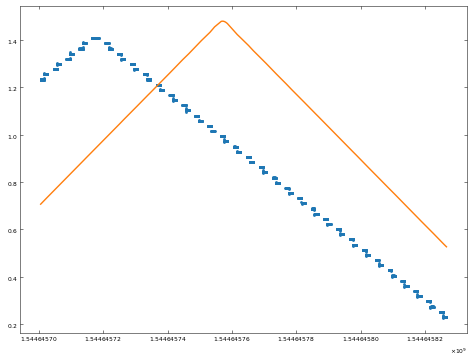

In [11]:
import scipy.optimize

def fitTriangleWave(times, values):
    parameterNames = ['amplitude', 'period', 'phase', 'offset']
    
    values = np.array(values)
    minTime = np.min(times)
    times = np.array(times) - minTime
    
    slopes = np.abs(values[1:]-values[0:-1])/((max(times)-min(times))/len(times))
    slope = np.mean(slopes)
    
    guesses = {}
    optParams = {}
    
    guesses['amplitude'] = (np.max(values) - np.min(values))/2
    guesses['period'] = np.max(times)/2
    guesses['period'] = 4*guesses['amplitude']/slope
    guesses['offset'] = np.mean(values)
    guesses['phase'] = (1-(values[0] - np.min(values))/(guesses['amplitude']*2))/(guesses['period']/2)
    
    if values[1] < values[0]:
        # guesses['phase'] = guesses['period'] - guesses['phase'] # Use this for always positive phase
        guesses['phase'] *= -1 # Use this for smallest phase, positive or negative
    
    fun = lambda times, phase: triangleCosWave(times, guesses['amplitude'], guesses['period'], phase, guesses['offset'])
    optParamVals, optParamCov = scipy.optimize.curve_fit(fun, times, values, p0 = [guesses['phase']])
    guesses['phase'] = optParamVals[0]
    
    fun = lambda times, period: triangleCosWave(times, guesses['amplitude'], period, guesses['phase'], guesses['offset'])
    optParamVals, optParamCov = scipy.optimize.curve_fit(fun, times, values, p0 = [guesses['period']])
    guesses['period'] = optParamVals[0]
    
    fun = lambda times, phase: triangleCosWave(times, guesses['amplitude'], guesses['period'], phase, guesses['offset'])
    optParamVals, optParamCov = scipy.optimize.curve_fit(fun, times, values, p0 = [guesses['phase']])
    guesses['phase'] = optParamVals[0]
    
#     maxfev=
    
#     optParamVals, optParamCov = scipy.optimize.curve_fit(triangleCosWave, times, values,
#         p0 = [guesses[parameterName] for parameterName in parameterNames])
    
#     optParamVals, optParamCov = scipy.optimize.curve_fit((lambda times, period: triangleCosWave(times, guesses['amplitude'], period, guesses['phase'], guesses['offset'])), times, values, p0 = [guesses['period']])
    
    for parameterName, value in zip(parameterNames, optParamVals):
        optParams[parameterName] = value
    print(guesses)
#     return [guesses['amplitude'], optParamVals[0], guesses['phase'], guesses['offset']]
#     return [guesses['amplitude'], guesses['period'], optParamVals[0], guesses['offset']]
    return guesses

fit = fitTriangleWave(timestamps, ys)
print(fit)
print(max(timestamps) - min(timestamps))

plt.plot(timestamps, ys, '.')
plt.plot(timestamps, triangleCosWave(timestamps, **fit))
plt.show()

## Fitting attempt with LM-Fit

[[Model]]
    Model(triangleCosWave)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 81
    # data points      = 3840
    # variables        = 4
    chi-square         = 0.14751849
    reduced chi-square = 3.8456e-05
    Akaike info crit   = -39033.3928
    Bayesian info crit = -39008.3799
[[Variables]]
    amplitude:  0.67178764 +/- 0.00381366 (0.57%) (init = 0.590425)
    period:     249.560140 +/- 1.42359114 (0.57%) (init = 146.3277)
    phase:      17.0673208 +/- 0.01530933 (0.09%) (init = 0.002022211)
    offset:     0.73755549 +/- 0.00386850 (0.52%) (init = 0.8893649)
[[Correlations]] (unreported correlations are < 0.100)
    C(period, offset)    = -0.999
    C(amplitude, offset) = -0.999
    C(amplitude, period) =  0.998



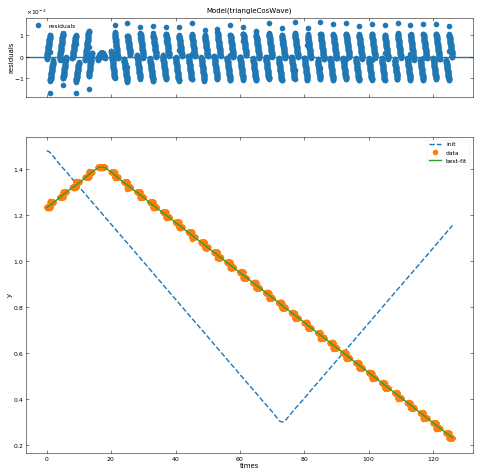

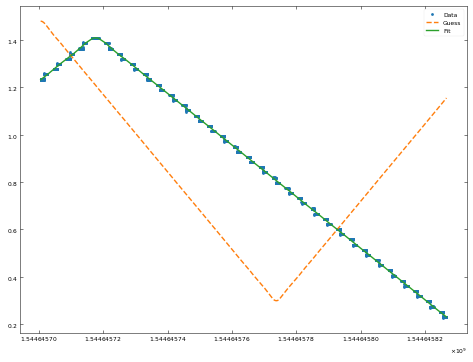

In [12]:
import lmfit

# triangleCosWave(times, amplitude, period, phase, offset):

def fitTriangleWave(times, values):
    model = lmfit.Model(triangleCosWave)
    
    values = np.array(values)
    minTime = np.min(times)
    times = np.array(times) - minTime
    
    slopes = np.abs(values[1:]-values[0:-1])/((max(times)-min(times))/len(times))
    slope = np.mean(slopes)
    
    params = model.make_params()
    
    params['amplitude'].value = (np.max(values) - np.min(values))/2
    params['period'].value = 4*params['amplitude'].value/slope
    params['offset'].value = np.mean(values)
    params['phase'].value = (1-(values[0] - np.min(values))/(params['amplitude'].value*2))/(params['period'].value/2)
    
#     params['phase'].min = 0
    
    if False: # Fit only phase first
        for param in params:
            params[param].vary = False
        params['phase'].vary = True

        result = model.fit(values, params, times=times)
        params['phase'].value = result.best_values['phase']

        for param in params:
            params[param].vary = True
    
    result = model.fit(values, params, times=times)
    
    return result

fit = fitTriangleWave(timestamps, ys)
print(fit.fit_report())
fit.plot(show_init=True)
plt.show()

plt.plot(timestamps, ys, '.', label='Data')
plt.plot(timestamps, fit.init_fit, '--', label='Guess')
plt.plot(timestamps, fit.best_fit, label='Fit')
plt.legend()
plt.show()

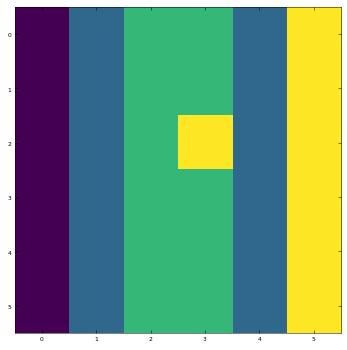

In [13]:
testData = np.array([[1,2,3,3,2,4],[1,2,3,3,2,4],[1,2,3,np.nan,2,4],[1,2,3,3,2,4],[1,2,3,3,2,4],[1,2,3,3,2,4]])
testData2 = np.array([[1,2,3,3,2,4],[1,2,3,3,2,4],[1,2,3,4,2,4],[1,2,3,3,2,4],[1,2,3,3,2,4],[1,2,3,3,2,4]])

plt.imshow(testData2)
plt.imshow(testData)
plt.show()

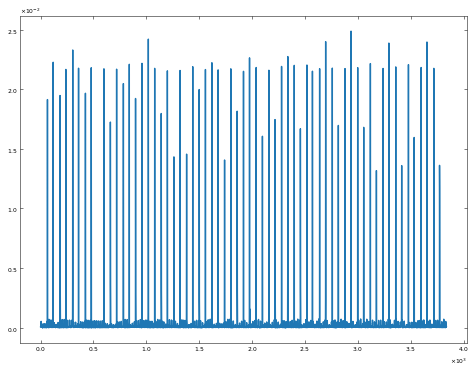

In [14]:
plt.plot(np.abs(ys[1:]-ys[0:-1]))
plt.show()

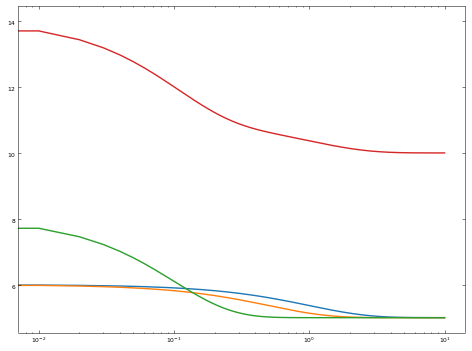

In [15]:
testx = np.linspace(0,10,1000)
testy = np.exp(-testx) + 5
testy2 = np.exp(-testx/0.5) + 5
testy3 = 3*np.exp(-testx/0.1) + 5
plt.plot(testx, testy)
plt.plot(testx, testy2)
plt.plot(testx, testy3)
plt.plot(testx, testy3+testy)
plt.xscale('log')
plt.show()

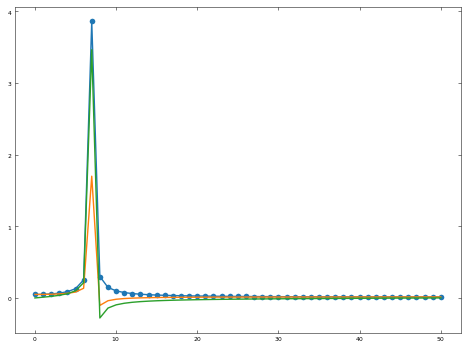

1.11484876966


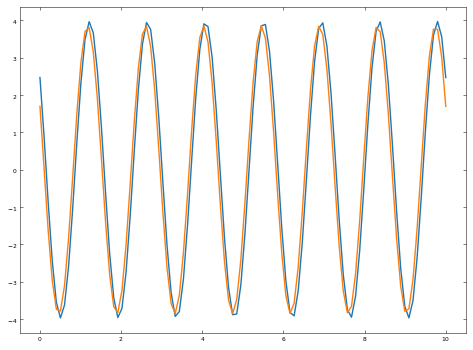

In [136]:
testxs = np.linspace(0,10,100)
testys = 3.97*np.cos(0.7*2*np.pi*testxs + 0.9)

testfft = np.fft.rfft(testys)
testfft /= len(testfft)
plt.plot(np.abs(testfft), 'o-')
plt.plot(np.real(testfft))
plt.plot(np.imag(testfft))
plt.show()

maxFpos = np.argsort(np.abs(testfft))[-1]
Fs = np.fft.rfftfreq(len(testys), d=(max(testxs) - min(testxs))/len(testxs))
maxF = Fs[maxFpos]
phaseAngle = np.angle(testfft[maxFpos])
amplitude = np.abs(testfft[maxFpos])

print(phaseAngle)

plt.plot(testxs, testys)
plt.plot(testxs, amplitude*np.cos(2*np.pi*maxF*testxs + phaseAngle))
plt.show()

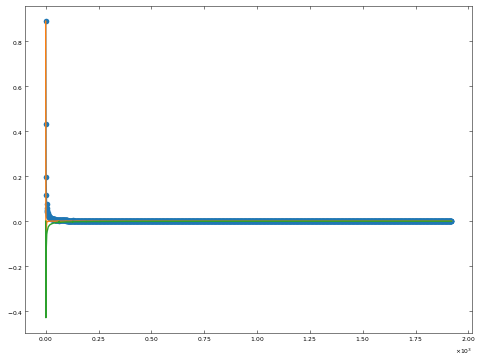

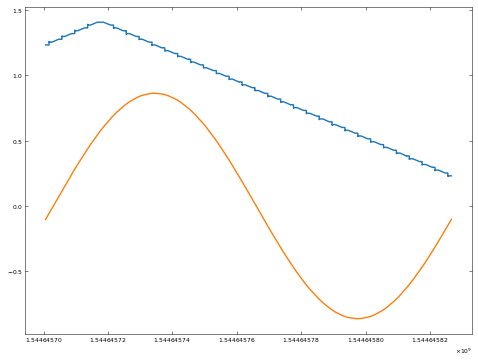

In [116]:

testfft = np.fft.rfft(ys)
testfft /= len(testfft)
testfft[0] /= 2
plt.plot(np.abs(testfft), 'o-')
plt.plot(np.real(testfft))
plt.plot(np.imag(testfft))
plt.show()

maxFpos = np.argsort(np.abs(testfft))[-2]
maxFpos2 = np.argsort(np.abs(testfft))[-2]
Fs = np.fft.rfftfreq(len(ys), d=(max(timestamps) - min(timestamps))/len(timestamps))
maxF = Fs[maxFpos]
maxF2 = Fs[maxFpos]
phaseAngle = np.angle(testfft[maxFpos])
phaseAngle2 = np.angle(testfft[maxFpos2])
amplitude = np.abs(testfft[maxFpos])
amplitude2 = np.abs(testfft[maxFpos2])

plt.plot(timestamps, ys)
plt.plot(timestamps, amplitude*np.cos(2*np.pi*maxF*(timestamps - min(timestamps)) + phaseAngle) + amplitude2*np.cos(2*np.pi*maxF2*(timestamps - min(timestamps)) + phaseAngle2))
plt.show()

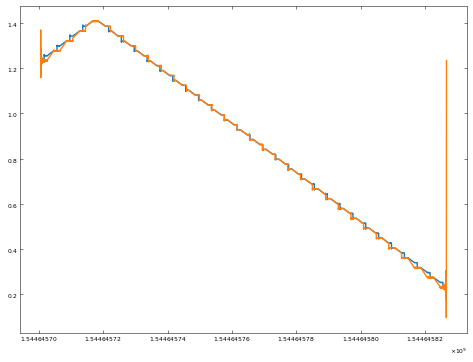

In [128]:
testfft = np.fft.fft(ys)
testfft /= len(testfft)

Fs = np.fft.fftfreq(len(ys), d=(max(timestamps) - min(timestamps))/len(timestamps))
revals = np.zeros(len(ys), dtype=np.complex_)

for i in range(len(testfft)):
    reval = testfft[i]*np.exp(2.0j*np.pi*Fs[i]*(timestamps - min(timestamps)))
    revals += reval

plt.plot(timestamps, ys)
plt.plot(timestamps, np.real(revals))
plt.show()

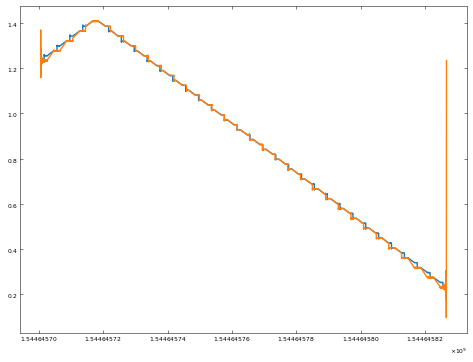

In [127]:
testfft = np.fft.fft(ys)
testfft /= len(testfft)

Fs = np.fft.fftfreq(len(ys), d=(max(timestamps) - min(timestamps))/len(timestamps))
revals = np.zeros(len(ys), dtype=np.complex_)

for i in range(len(testfft)):
    phaseAngle = np.angle(testfft[i])
    amplitude = np.abs(testfft[i])
    reval = amplitude*np.cos(2*np.pi*Fs[i]*(timestamps - min(timestamps)) + phaseAngle)
    revals += reval

plt.plot(timestamps, ys)
plt.plot(timestamps, np.real(revals))
plt.show()

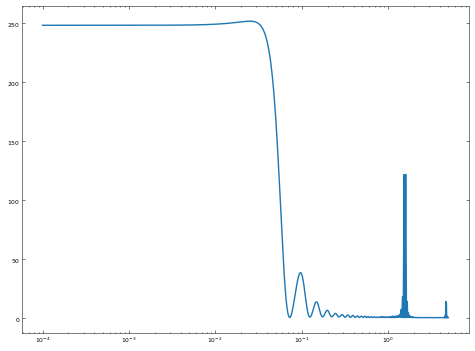

In [187]:
import scipy.signal

Fs = np.linspace(0.0001, 5, 10000)

pgram = scipy.signal.lombscargle(timestamps, ys - np.mean(ys), Fs)

plt.semilogx(Fs, pgram)
plt.show()

1.0


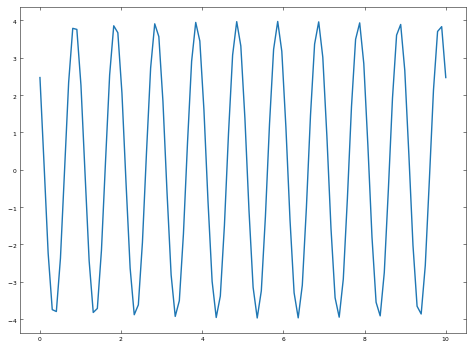

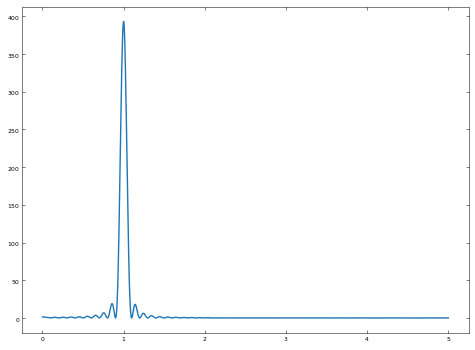

In [185]:
import scipy.signal

testxs = np.linspace(0,10,100)
testys = 3.97*np.cos(1*2*np.pi*testxs + 0.9)

SampleRate = len(testxs)/(max(testxs) - min(testxs))
FSampling = SampleRate
FNyquist = FSampling/2
Fs = np.linspace(0.001, FNyquist, 10000)

pgram = scipy.signal.lombscargle(testxs, testys, 2*np.pi*Fs)

FMax = Fs[np.argmax(pgram)]
print(np.round(FMax, 3))

plt.plot(testxs, testys)
plt.show()

plt.plot(Fs, pgram)
plt.show()